In [3]:
import os
import soundfile as sf
import textgrid
import numpy as np

from prosody_tools.energy_processing import extract_energy  # use your module path

# Path to your folder with .wav and .TextGrid files
data_dir = r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\converted_wav\84\121123"
# Sampling rate used in your audio
target_rate = 16000  # update if your wav files are a different rate

results = []

for file in os.listdir(data_dir):
    if file.endswith(".TextGrid"):
        file_id = file.replace(".TextGrid", "")
        tg_path = os.path.join(data_dir, file)
        wav_path = os.path.join(data_dir, f"{file_id}.wav")

        if not os.path.exists(wav_path):
            print(f"Missing wav: {wav_path}")
            continue

        # Load audio
        waveform, sr = sf.read(wav_path)
        if len(waveform.shape) > 1:  # stereo to mono
            waveform = waveform.mean(axis=1)

        # Parse TextGrid
        tg = textgrid.TextGrid.fromFile(tg_path)
        word_tier = tg.getFirst("words")  # assumes tier is named "words"

        for interval in word_tier:
            word = interval.mark.strip()
            if not word:  # skip silence or empty
                continue

            start_sec = float(interval.minTime)
            end_sec = float(interval.maxTime)

            # Slice waveform by time
            start_idx = int(start_sec * sr)
            end_idx = int(end_sec * sr)
            word_audio = waveform[start_idx:end_idx]

            if len(word_audio) == 0:
                continue

            # Extract energy
            energy = extract_energy(word_audio, fs=sr, target_rate=200)
            energy_mean = float(np.mean(energy))

            results.append({
                "file_id": file_id,
                "word": word,
                "start": start_sec,
                "end": end_sec,
                "mean_energy": energy_mean
            })

# ✅ Print sample
for r in results[:10]:
    print(r)


{'file_id': '84-121123-0000', 'word': 'go', 'start': 0.52, 'end': 0.86, 'mean_energy': 0.07334185220917248}
{'file_id': '84-121123-0000', 'word': 'do', 'start': 1.3, 'end': 1.38, 'mean_energy': 0.043559661778653155}
{'file_id': '84-121123-0000', 'word': 'you', 'start': 1.38, 'end': 1.49, 'mean_energy': 0.13233363913670304}
{'file_id': '84-121123-0000', 'word': 'hear', 'start': 1.49, 'end': 1.91, 'mean_energy': 0.07596438160030115}
{'file_id': '84-121123-0001', 'word': 'but', 'start': 0.3, 'end': 0.42, 'mean_energy': 0.089789403184249}
{'file_id': '84-121123-0001', 'word': 'in', 'start': 0.42, 'end': 0.53, 'mean_energy': 0.14485594982743477}
{'file_id': '84-121123-0001', 'word': 'less', 'start': 0.53, 'end': 0.75, 'mean_energy': 0.07032747831793149}
{'file_id': '84-121123-0001', 'word': 'than', 'start': 0.75, 'end': 0.86, 'mean_energy': 0.07698933514462812}
{'file_id': '84-121123-0001', 'word': 'five', 'start': 0.86, 'end': 1.1, 'mean_energy': 0.04451741396190323}
{'file_id': '84-121123

In [1]:
from feature_extractors import ProsodyFeatureExtractor

extractor = ProsodyFeatureExtractor(
    lab_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\lab_words",  # should be *.lab files (converted TextGrid or .lab)
    wav_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\converted_wav",
    phoneme_lab_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\lab_phonemes",  # can also be from MFA alignment
    celex_path= r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\celex\celex2\english\epw\epw.cd", #"path/to/celex/dictionary",  # required if f0_stress_localizer is "celex" None
    f0_stress_localizer= "celex",  # "celex" or "full_curve"
    extract_f0=True,
    extract_energy=True,
    extract_word_duration=True,
    extract_duration=True,
    extract_pause_before=True,
    extract_pause_after=True,
    extract_prominence=True,
    f0_mode="dct",
    f0_n_coeffs=4,
    energy_mode="mean",
    word_duration_mode="syllable_norm",
    prominence_mode="mean"
)


Extracted features ----: ['f0', 'energy', 'word_duration', 'duration', 'pause_before', 'pause_after', 'prominence']


Extracting Features from Readers:   0%|          | 0/40 [00:00<?, ?it/s]

'similes' not in cmudict. Using g2p fallback.
'idylls' not in cmudict. Using g2p fallback.
'jingo' not in cmudict. Using g2p fallback.
'birket' not in cmudict. Using g2p fallback.
'carker' not in cmudict. Using g2p fallback.
'shampooer' not in cmudict. Using g2p fallback.
'upholsterer' not in cmudict. Using g2p fallback.
'recognising' not in cmudict. Using g2p fallback.
'ruggedo' not in cmudict. Using g2p fallback.
'dominions' not in cmudict. Using g2p fallback.
'nomes' not in cmudict. Using g2p fallback.
'kaliko' not in cmudict. Using g2p fallback.
'overstrained' not in cmudict. Using g2p fallback.
'trivialities' not in cmudict. Using g2p fallback.
'whirr' not in cmudict. Using g2p fallback.
'brandd' not in cmudict. Using g2p fallback.
'irolg' not in cmudict. Using g2p fallback.


Extracting Features from Readers:   2%|▎         | 1/40 [02:32<1:39:00, 152.31s/it]

'dowson' not in cmudict. Using g2p fallback.
'inexpressible' not in cmudict. Using g2p fallback.
'mainhall' not in cmudict. Using g2p fallback.
'burgoynes' not in cmudict. Using g2p fallback.
'gossoons' not in cmudict. Using g2p fallback.
'westmere' not in cmudict. Using g2p fallback.
'dowle' not in cmudict. Using g2p fallback.
'felicitations' not in cmudict. Using g2p fallback.
'euston' not in cmudict. Using g2p fallback.
'joyously' not in cmudict. Using g2p fallback.
'quivered' not in cmudict. Using g2p fallback.


Extracting Features from Readers:   5%|▌         | 2/40 [04:45<1:29:29, 141.31s/it]

'proselyte' not in cmudict. Using g2p fallback.
'ebionites' not in cmudict. Using g2p fallback.
'nazarenes' not in cmudict. Using g2p fallback.
'moulded' not in cmudict. Using g2p fallback.
'sectaries' not in cmudict. Using g2p fallback.
'aeons' not in cmudict. Using g2p fallback.
'pravity' not in cmudict. Using g2p fallback.
'proselytes' not in cmudict. Using g2p fallback.
'abjured' not in cmudict. Using g2p fallback.
'rashness' not in cmudict. Using g2p fallback.
'docetes' not in cmudict. Using g2p fallback.
'impassible' not in cmudict. Using g2p fallback.
'incorruptible' not in cmudict. Using g2p fallback.
'foetus' not in cmudict. Using g2p fallback.
'pleroma' not in cmudict. Using g2p fallback.
'cerinthus' not in cmudict. Using g2p fallback.
'athanasius' not in cmudict. Using g2p fallback.
'arians' not in cmudict. Using g2p fallback.
'polytheists' not in cmudict. Using g2p fallback.
'apollinaris' not in cmudict. Using g2p fallback.
'indissoluble' not in cmudict. Using g2p fallback.

Extracting Features from Readers:   8%|▊         | 3/40 [07:53<1:40:14, 162.56s/it]

'blemmyes' not in cmudict. Using g2p fallback.
'nubians' not in cmudict. Using g2p fallback.
'valjean' not in cmudict. Using g2p fallback.
'undressing' not in cmudict. Using g2p fallback.
'quaffed' not in cmudict. Using g2p fallback.
'lassitude' not in cmudict. Using g2p fallback.
'wheedles' not in cmudict. Using g2p fallback.
'shallop' not in cmudict. Using g2p fallback.
'roundel' not in cmudict. Using g2p fallback.
'neath' not in cmudict. Using g2p fallback.
'unlocks' not in cmudict. Using g2p fallback.
'recuperations' not in cmudict. Using g2p fallback.
'cruder' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  10%|█         | 4/40 [11:08<1:45:15, 175.42s/it]

'unconsidered' not in cmudict. Using g2p fallback.
'subjugation' not in cmudict. Using g2p fallback.
'longum' not in cmudict. Using g2p fallback.
'chaba' not in cmudict. Using g2p fallback.
'moluccas' not in cmudict. Using g2p fallback.
'tolerably' not in cmudict. Using g2p fallback.
'curdle' not in cmudict. Using g2p fallback.
'zingiber' not in cmudict. Using g2p fallback.
'officinale' not in cmudict. Using g2p fallback.
'tureen' not in cmudict. Using g2p fallback.
'cookery' not in cmudict. Using g2p fallback.
'forcemeat' not in cmudict. Using g2p fallback.
'savoury' not in cmudict. Using g2p fallback.
'flavour' not in cmudict. Using g2p fallback.
'perfumery' not in cmudict. Using g2p fallback.
'quenelles' not in cmudict. Using g2p fallback.
'panada' not in cmudict. Using g2p fallback.
'udder' not in cmudict. Using g2p fallback.
'stewpan' not in cmudict. Using g2p fallback.
'pestle' not in cmudict. Using g2p fallback.
'sippet' not in cmudict. Using g2p fallback.
'sippets' not in cmudi

Extracting Features from Readers:  12%|█▎        | 5/40 [14:26<1:47:03, 183.53s/it]

'ejaculated' not in cmudict. Using g2p fallback.
'shimerda' not in cmudict. Using g2p fallback.
'corncakes' not in cmudict. Using g2p fallback.
'ambrosch' not in cmudict. Using g2p fallback.
'bushed' not in cmudict. Using g2p fallback.
'searchingly' not in cmudict. Using g2p fallback.
'gayety' not in cmudict. Using g2p fallback.
'aristocracies' not in cmudict. Using g2p fallback.
'unceasingly' not in cmudict. Using g2p fallback.
'captious' not in cmudict. Using g2p fallback.
'vaunting' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  15%|█▌        | 6/40 [17:44<1:46:46, 188.43s/it]

'bankrupts' not in cmudict. Using g2p fallback.
'baulked' not in cmudict. Using g2p fallback.
'claypole' not in cmudict. Using g2p fallback.
'buckinghamshire' not in cmudict. Using g2p fallback.
'wilsons' not in cmudict. Using g2p fallback.
'settee' not in cmudict. Using g2p fallback.
'wakening' not in cmudict. Using g2p fallback.
'afore' not in cmudict. Using g2p fallback.
'wi' not in cmudict. Using g2p fallback.
'bewitchingly' not in cmudict. Using g2p fallback.
'unworldly' not in cmudict. Using g2p fallback.
'yulka' not in cmudict. Using g2p fallback.
'lamplight' not in cmudict. Using g2p fallback.
'boisterously' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  18%|█▊        | 7/40 [21:06<1:46:03, 192.82s/it]

'shimerdas' not in cmudict. Using g2p fallback.
'comfortingly' not in cmudict. Using g2p fallback.
'hindmost' not in cmudict. Using g2p fallback.
'sledges' not in cmudict. Using g2p fallback.
'congal' not in cmudict. Using g2p fallback.
'surnamed' not in cmudict. Using g2p fallback.
'bards' not in cmudict. Using g2p fallback.
'labours' not in cmudict. Using g2p fallback.
'oblations' not in cmudict. Using g2p fallback.
'signalizes' not in cmudict. Using g2p fallback.
'pictish' not in cmudict. Using g2p fallback.
'finnacta' not in cmudict. Using g2p fallback.
'northumbria' not in cmudict. Using g2p fallback.
'recognise' not in cmudict. Using g2p fallback.
'edifices' not in cmudict. Using g2p fallback.
'impost' not in cmudict. Using g2p fallback.
'moling' not in cmudict. Using g2p fallback.
'adamnan' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  20%|██        | 8/40 [24:25<1:43:52, 194.76s/it]

'kirkleatham' not in cmudict. Using g2p fallback.
'tablespoonful' not in cmudict. Using g2p fallback.
'nubia' not in cmudict. Using g2p fallback.
'dhourra' not in cmudict. Using g2p fallback.
'fowls' not in cmudict. Using g2p fallback.
'wheats' not in cmudict. Using g2p fallback.
'partaken' not in cmudict. Using g2p fallback.
'tartaric' not in cmudict. Using g2p fallback.
'soyer' not in cmudict. Using g2p fallback.
'crumpets' not in cmudict. Using g2p fallback.
'currants' not in cmudict. Using g2p fallback.
'rusks' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  22%|██▎       | 9/40 [27:40<1:40:42, 194.93s/it]

'unpardonably' not in cmudict. Using g2p fallback.
'outbuildings' not in cmudict. Using g2p fallback.
'currant' not in cmudict. Using g2p fallback.
'squashes' not in cmudict. Using g2p fallback.
'evincing' not in cmudict. Using g2p fallback.
'mossy' not in cmudict. Using g2p fallback.
'chanticleer' not in cmudict. Using g2p fallback.
'watchfulness' not in cmudict. Using g2p fallback.
'lamentably' not in cmudict. Using g2p fallback.
'hepzibah' not in cmudict. Using g2p fallback.
'bipeds' not in cmudict. Using g2p fallback.
'sidelong' not in cmudict. Using g2p fallback.
'croaked' not in cmudict. Using g2p fallback.
'pyncheon' not in cmudict. Using g2p fallback.
'daguerreotypist' not in cmudict. Using g2p fallback.
'daguerreotype' not in cmudict. Using g2p fallback.
'unamiable' not in cmudict. Using g2p fallback.
'withal' not in cmudict. Using g2p fallback.
'holgrave' not in cmudict. Using g2p fallback.
'indistinctly' not in cmudict. Using g2p fallback.
'blanched' not in cmudict. Using g2

Extracting Features from Readers:  25%|██▌       | 10/40 [30:54<1:37:12, 194.43s/it]

'labourers' not in cmudict. Using g2p fallback.
'instalments' not in cmudict. Using g2p fallback.
'discordantly' not in cmudict. Using g2p fallback.
'drouet' not in cmudict. Using g2p fallback.
'prefigured' not in cmudict. Using g2p fallback.
'hurstwood' not in cmudict. Using g2p fallback.
'materialised' not in cmudict. Using g2p fallback.
'drearily' not in cmudict. Using g2p fallback.
'wretch' not in cmudict. Using g2p fallback.
'insistency' not in cmudict. Using g2p fallback.
'realise' not in cmudict. Using g2p fallback.
'perfunctorily' not in cmudict. Using g2p fallback.
'quitted' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  28%|██▊       | 11/40 [34:07<1:33:50, 194.16s/it]

'deceivers' not in cmudict. Using g2p fallback.
'rangitata' not in cmudict. Using g2p fallback.
'trubner' not in cmudict. Using g2p fallback.
'unlooked' not in cmudict. Using g2p fallback.
'favourable' not in cmudict. Using g2p fallback.
'erewhon' not in cmudict. Using g2p fallback.
'bleating' not in cmudict. Using g2p fallback.
'chapels' not in cmudict. Using g2p fallback.
'unpaved' not in cmudict. Using g2p fallback.
'shoplets' not in cmudict. Using g2p fallback.
'vegetated' not in cmudict. Using g2p fallback.
'reverenced' not in cmudict. Using g2p fallback.
'marvellously' not in cmudict. Using g2p fallback.
'inmost' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  30%|███       | 12/40 [37:26<1:31:16, 195.58s/it]

'stationmaster' not in cmudict. Using g2p fallback.
'dene' not in cmudict. Using g2p fallback.
'blunderbuss' not in cmudict. Using g2p fallback.
'adventuring' not in cmudict. Using g2p fallback.
'knocker' not in cmudict. Using g2p fallback.
'expostulating' not in cmudict. Using g2p fallback.
'unfastening' not in cmudict. Using g2p fallback.
'behaviour' not in cmudict. Using g2p fallback.
'pigstye' not in cmudict. Using g2p fallback.
'sniggered' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  32%|███▎      | 13/40 [39:33<1:18:41, 174.88s/it]

'cleverest' not in cmudict. Using g2p fallback.
'poisoners' not in cmudict. Using g2p fallback.
'arabesque' not in cmudict. Using g2p fallback.
'vendhya' not in cmudict. Using g2p fallback.
'khosala' not in cmudict. Using g2p fallback.
'bhunda' not in cmudict. Using g2p fallback.
'paroxysms' not in cmudict. Using g2p fallback.
'taloned' not in cmudict. Using g2p fallback.
'asura' not in cmudict. Using g2p fallback.
'doma' not in cmudict. Using g2p fallback.
'syrtis' not in cmudict. Using g2p fallback.
'piglike' not in cmudict. Using g2p fallback.
'darfhulva' not in cmudict. Using g2p fallback.
'radiophone' not in cmudict. Using g2p fallback.
'terran' not in cmudict. Using g2p fallback.
'discoverer' not in cmudict. Using g2p fallback.
'ingratiation' not in cmudict. Using g2p fallback.
'telemetering' not in cmudict. Using g2p fallback.
'guiltily' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  35%|███▌      | 14/40 [41:43<1:09:50, 161.18s/it]

'glenarvan' not in cmudict. Using g2p fallback.
'wahiti' not in cmudict. Using g2p fallback.
'olbinett' not in cmudict. Using g2p fallback.
'mulrady' not in cmudict. Using g2p fallback.
'poniard' not in cmudict. Using g2p fallback.
'protruded' not in cmudict. Using g2p fallback.
'aslant' not in cmudict. Using g2p fallback.
'strewed' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  38%|███▊      | 15/40 [44:24<1:07:08, 161.13s/it]

'glycerin' not in cmudict. Using g2p fallback.
'lighteth' not in cmudict. Using g2p fallback.
'pathless' not in cmudict. Using g2p fallback.
'heresies' not in cmudict. Using g2p fallback.
'theosophies' not in cmudict. Using g2p fallback.
'satisfier' not in cmudict. Using g2p fallback.
'ecclesiastics' not in cmudict. Using g2p fallback.
'sanum' not in cmudict. Using g2p fallback.
'huns' not in cmudict. Using g2p fallback.
'inferiors' not in cmudict. Using g2p fallback.
'auxiliaries' not in cmudict. Using g2p fallback.
'casus' not in cmudict. Using g2p fallback.
'iniquitous' not in cmudict. Using g2p fallback.
'goths' not in cmudict. Using g2p fallback.
'rapine' not in cmudict. Using g2p fallback.
'sheepskins' not in cmudict. Using g2p fallback.
'worthily' not in cmudict. Using g2p fallback.
'salvian' not in cmudict. Using g2p fallback.
'debauched' not in cmudict. Using g2p fallback.
'belisarius' not in cmudict. Using g2p fallback.
'metaphysic' not in cmudict. Using g2p fallback.
'unmean

Extracting Features from Readers:  40%|████      | 16/40 [47:55<1:10:29, 176.25s/it]

'rambles' not in cmudict. Using g2p fallback.
'modoc' not in cmudict. Using g2p fallback.
'saunters' not in cmudict. Using g2p fallback.
'forgetfulness' not in cmudict. Using g2p fallback.
'uncommunicative' not in cmudict. Using g2p fallback.
'astir' not in cmudict. Using g2p fallback.
'northwestward' not in cmudict. Using g2p fallback.
'palimpsest' not in cmudict. Using g2p fallback.
'crags' not in cmudict. Using g2p fallback.
'modocs' not in cmudict. Using g2p fallback.
'spangles' not in cmudict. Using g2p fallback.
'crevassed' not in cmudict. Using g2p fallback.
'cloudlike' not in cmudict. Using g2p fallback.
'riverlike' not in cmudict. Using g2p fallback.
'asplenium' not in cmudict. Using g2p fallback.
'epilobium' not in cmudict. Using g2p fallback.
'heuchera' not in cmudict. Using g2p fallback.
'destructible' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  42%|████▎     | 17/40 [51:35<1:12:35, 189.39s/it]

'challoner' not in cmudict. Using g2p fallback.
'emphasised' not in cmudict. Using g2p fallback.
'gryce' not in cmudict. Using g2p fallback.
'allurement' not in cmudict. Using g2p fallback.
'favourite' not in cmudict. Using g2p fallback.
'sowerby' not in cmudict. Using g2p fallback.
'hennerberg' not in cmudict. Using g2p fallback.
'musingly' not in cmudict. Using g2p fallback.
'vigour' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  45%|████▌     | 18/40 [55:05<1:11:39, 195.43s/it]

'honourable' not in cmudict. Using g2p fallback.
'dignities' not in cmudict. Using g2p fallback.
'churchwardens' not in cmudict. Using g2p fallback.
'magazzino' not in cmudict. Using g2p fallback.
'razetta' not in cmudict. Using g2p fallback.
'enquired' not in cmudict. Using g2p fallback.
'terro' not in cmudict. Using g2p fallback.
'entreated' not in cmudict. Using g2p fallback.
'transubstantiation' not in cmudict. Using g2p fallback.
'undeceived' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  48%|████▊     | 19/40 [58:00<1:06:19, 189.49s/it]

'dorriforth' not in cmudict. Using g2p fallback.
'beheld' not in cmudict. Using g2p fallback.
'ardour' not in cmudict. Using g2p fallback.
'overspread' not in cmudict. Using g2p fallback.
'clamour' not in cmudict. Using g2p fallback.
'decanters' not in cmudict. Using g2p fallback.
'officious' not in cmudict. Using g2p fallback.
'gingle' not in cmudict. Using g2p fallback.
'endeavoured' not in cmudict. Using g2p fallback.
'unmannerly' not in cmudict. Using g2p fallback.
'exprest' not in cmudict. Using g2p fallback.
'desisted' not in cmudict. Using g2p fallback.
'milborough' not in cmudict. Using g2p fallback.
'bozzle' not in cmudict. Using g2p fallback.
'favour' not in cmudict. Using g2p fallback.
'drat' not in cmudict. Using g2p fallback.
'skint' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  50%|█████     | 20/40 [59:11<51:15, 153.76s/it]  

'dismounted' not in cmudict. Using g2p fallback.
'noontide' not in cmudict. Using g2p fallback.
'montesinos' not in cmudict. Using g2p fallback.
'wench' not in cmudict. Using g2p fallback.
'untrussing' not in cmudict. Using g2p fallback.
'untruss' not in cmudict. Using g2p fallback.
'thyself' not in cmudict. Using g2p fallback.
'defenceless' not in cmudict. Using g2p fallback.
'petronels' not in cmudict. Using g2p fallback.
'plighted' not in cmudict. Using g2p fallback.
'lacquey' not in cmudict. Using g2p fallback.
'balvastro' not in cmudict. Using g2p fallback.
'lamentations' not in cmudict. Using g2p fallback.
'abbess' not in cmudict. Using g2p fallback.
'reals' not in cmudict. Using g2p fallback.
'penances' not in cmudict. Using g2p fallback.
'despatched' not in cmudict. Using g2p fallback.
'muleteers' not in cmudict. Using g2p fallback.
'highwayman' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  52%|█████▎    | 21/40 [1:00:20<40:40, 128.46s/it]

'daren't' not in cmudict. Using g2p fallback.
'uns' not in cmudict. Using g2p fallback.
'troke' not in cmudict. Using g2p fallback.
'honour' not in cmudict. Using g2p fallback.
'meekin' not in cmudict. Using g2p fallback.
'quartered' not in cmudict. Using g2p fallback.
'offences' not in cmudict. Using g2p fallback.
'cheerily' not in cmudict. Using g2p fallback.
'uproarious' not in cmudict. Using g2p fallback.
'verandah' not in cmudict. Using g2p fallback.
'cheroot' not in cmudict. Using g2p fallback.
'macklewain' not in cmudict. Using g2p fallback.
'grumblingly' not in cmudict. Using g2p fallback.
'portmanteau' not in cmudict. Using g2p fallback.
'impertinence' not in cmudict. Using g2p fallback.
'pannikin' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  55%|█████▌    | 22/40 [1:01:31<33:22, 111.23s/it]

'indescribably' not in cmudict. Using g2p fallback.
'begrudged' not in cmudict. Using g2p fallback.
'quakerish' not in cmudict. Using g2p fallback.
'impetuosity' not in cmudict. Using g2p fallback.
'smilax' not in cmudict. Using g2p fallback.
'unsoldierly' not in cmudict. Using g2p fallback.
'knapsacks' not in cmudict. Using g2p fallback.
'lisha' not in cmudict. Using g2p fallback.
'ef' not in cmudict. Using g2p fallback.
'stommick' not in cmudict. Using g2p fallback.
'sufferin' not in cmudict. Using g2p fallback.
'ireful' not in cmudict. Using g2p fallback.
'awls' not in cmudict. Using g2p fallback.
'hepsey' not in cmudict. Using g2p fallback.
'creeters' not in cmudict. Using g2p fallback.
'lizy' not in cmudict. Using g2p fallback.
'cynthy' not in cmudict. Using g2p fallback.
'buttony' not in cmudict. Using g2p fallback.
'exaltation' not in cmudict. Using g2p fallback.
'dauntless' not in cmudict. Using g2p fallback.
'reddened' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  57%|█████▊    | 23/40 [1:02:42<28:05, 99.12s/it] 

'derivatively' not in cmudict. Using g2p fallback.
'honours' not in cmudict. Using g2p fallback.
'dreadfulness' not in cmudict. Using g2p fallback.
'significations' not in cmudict. Using g2p fallback.
'conformably' not in cmudict. Using g2p fallback.
'ampler' not in cmudict. Using g2p fallback.
'overmasters' not in cmudict. Using g2p fallback.
'deteriorations' not in cmudict. Using g2p fallback.
'monstrosities' not in cmudict. Using g2p fallback.
'splendour' not in cmudict. Using g2p fallback.
'egoisms' not in cmudict. Using g2p fallback.
'hows' not in cmudict. Using g2p fallback.
'loftiest' not in cmudict. Using g2p fallback.
'cornucopias' not in cmudict. Using g2p fallback.
'simultaneousness' not in cmudict. Using g2p fallback.
'inexhausted' not in cmudict. Using g2p fallback.
'unwearied' not in cmudict. Using g2p fallback.
'neighbour' not in cmudict. Using g2p fallback.
'volitions' not in cmudict. Using g2p fallback.
'plebeianism' not in cmudict. Using g2p fallback.
'therefrom' not 

Extracting Features from Readers:  60%|██████    | 24/40 [1:03:56<24:22, 91.41s/it]

'roguish' not in cmudict. Using g2p fallback.
'straggling' not in cmudict. Using g2p fallback.
'veolan' not in cmudict. Using g2p fallback.
'grandam' not in cmudict. Using g2p fallback.
'distaff' not in cmudict. Using g2p fallback.
'sunburnt' not in cmudict. Using g2p fallback.
'loiterers' not in cmudict. Using g2p fallback.
'varlet' not in cmudict. Using g2p fallback.
'shrilly' not in cmudict. Using g2p fallback.
'remonstrances' not in cmudict. Using g2p fallback.
'physiognomy' not in cmudict. Using g2p fallback.
'sycamores' not in cmudict. Using g2p fallback.
'luxuriantly' not in cmudict. Using g2p fallback.
'battlemented' not in cmudict. Using g2p fallback.
'plashing' not in cmudict. Using g2p fallback.
'commotions' not in cmudict. Using g2p fallback.
'wretchedness' not in cmudict. Using g2p fallback.
'petrifying' not in cmudict. Using g2p fallback.
'conventicles' not in cmudict. Using g2p fallback.
'darning' not in cmudict. Using g2p fallback.
'pinkies' not in cmudict. Using g2p fa

Extracting Features from Readers:  62%|██████▎   | 25/40 [1:05:07<21:19, 85.33s/it]

'bambeday' not in cmudict. Using g2p fallback.
'improvidence' not in cmudict. Using g2p fallback.
'untutored' not in cmudict. Using g2p fallback.
'beholds' not in cmudict. Using g2p fallback.
'worshiping' not in cmudict. Using g2p fallback.
'acquainting' not in cmudict. Using g2p fallback.
'remoter' not in cmudict. Using g2p fallback.
'devotions' not in cmudict. Using g2p fallback.
'thundercloud' not in cmudict. Using g2p fallback.
'teepee' not in cmudict. Using g2p fallback.
'fakirs' not in cmudict. Using g2p fallback.
'conjurers' not in cmudict. Using g2p fallback.
'assiniboine' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  65%|██████▌   | 26/40 [1:06:18<18:54, 81.02s/it]

'leetle' not in cmudict. Using g2p fallback.
'murfreesboro' not in cmudict. Using g2p fallback.
'videt' not in cmudict. Using g2p fallback.
'secesh' not in cmudict. Using g2p fallback.
'divined' not in cmudict. Using g2p fallback.
'ganny' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  68%|██████▊   | 27/40 [1:07:27<16:48, 77.60s/it]

'gwynplaine' not in cmudict. Using g2p fallback.
'transmutation' not in cmudict. Using g2p fallback.
'chiselled' not in cmudict. Using g2p fallback.
'mountebank' not in cmudict. Using g2p fallback.
'rictus' not in cmudict. Using g2p fallback.
'manichaeans' not in cmudict. Using g2p fallback.
'colour' not in cmudict. Using g2p fallback.
'fetes' not in cmudict. Using g2p fallback.
'fibi' not in cmudict. Using g2p fallback.
'vinos' not in cmudict. Using g2p fallback.
'southwark' not in cmudict. Using g2p fallback.
'mountebanks' not in cmudict. Using g2p fallback.
'tarrinzeau' not in cmudict. Using g2p fallback.
'swallowers' not in cmudict. Using g2p fallback.
'tankards' not in cmudict. Using g2p fallback.
'nicless' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  70%|███████   | 28/40 [1:08:37<15:03, 75.30s/it]

'valkyrie' not in cmudict. Using g2p fallback.
'hardwigg' not in cmudict. Using g2p fallback.
'myrdals' not in cmudict. Using g2p fallback.
'yokul' not in cmudict. Using g2p fallback.
'saknussemm' not in cmudict. Using g2p fallback.
'codfish' not in cmudict. Using g2p fallback.
'exportation' not in cmudict. Using g2p fallback.
'unvarying' not in cmudict. Using g2p fallback.
'geographers' not in cmudict. Using g2p fallback.
'sudvestr' not in cmudict. Using g2p fallback.
'fjordungr' not in cmudict. Using g2p fallback.
'sneffels' not in cmudict. Using g2p fallback.
'agglomerations' not in cmudict. Using g2p fallback.
'gardar' not in cmudict. Using g2p fallback.
'boatmen' not in cmudict. Using g2p fallback.
'firesides' not in cmudict. Using g2p fallback.
'wabigoon' not in cmudict. Using g2p fallback.
'woonga' not in cmudict. Using g2p fallback.
'minnetaki' not in cmudict. Using g2p fallback.
'sanguinary' not in cmudict. Using g2p fallback.
'wabi' not in cmudict. Using g2p fallback.
'loveli

Extracting Features from Readers:  72%|███████▎  | 29/40 [1:09:48<13:32, 73.84s/it]

'leonidas' not in cmudict. Using g2p fallback.
'delaunay' not in cmudict. Using g2p fallback.
'liveryman' not in cmudict. Using g2p fallback.
'smithy' not in cmudict. Using g2p fallback.
'testbridge' not in cmudict. Using g2p fallback.
'lovest' not in cmudict. Using g2p fallback.
'aright' not in cmudict. Using g2p fallback.
'loveth' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  75%|███████▌  | 30/40 [1:11:00<12:13, 73.32s/it]

'giddily' not in cmudict. Using g2p fallback.
'canyou' not in cmudict. Using g2p fallback.
'lige' not in cmudict. Using g2p fallback.
'pinyon' not in cmudict. Using g2p fallback.
'mebby' not in cmudict. Using g2p fallback.
'fagots' not in cmudict. Using g2p fallback.
'forenoon' not in cmudict. Using g2p fallback.
'wonderingly' not in cmudict. Using g2p fallback.
'tarpaulin' not in cmudict. Using g2p fallback.
'grumbler' not in cmudict. Using g2p fallback.
'zepplin' not in cmudict. Using g2p fallback.
'cowmen' not in cmudict. Using g2p fallback.
'stolidly' not in cmudict. Using g2p fallback.
'curer' not in cmudict. Using g2p fallback.
'cowpunchers' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  78%|███████▊  | 31/40 [1:12:12<10:56, 72.94s/it]

'convolvulus' not in cmudict. Using g2p fallback.
'luxuriate' not in cmudict. Using g2p fallback.
'eddying' not in cmudict. Using g2p fallback.
'vexation' not in cmudict. Using g2p fallback.
'deucalion' not in cmudict. Using g2p fallback.
'prometheus' not in cmudict. Using g2p fallback.
'pyrrha' not in cmudict. Using g2p fallback.
'fancying' not in cmudict. Using g2p fallback.
'thither' not in cmudict. Using g2p fallback.
'forecourt' not in cmudict. Using g2p fallback.
'goblets' not in cmudict. Using g2p fallback.
'carbines' not in cmudict. Using g2p fallback.
'wakened' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  80%|████████  | 32/40 [1:13:22<09:37, 72.18s/it]

'beenie' not in cmudict. Using g2p fallback.
'undesired' not in cmudict. Using g2p fallback.
'maidenly' not in cmudict. Using g2p fallback.
'tingled' not in cmudict. Using g2p fallback.
'mortification' not in cmudict. Using g2p fallback.
'intermezzo' not in cmudict. Using g2p fallback.
'housemaid' not in cmudict. Using g2p fallback.
'irrelevantly' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  82%|████████▎ | 33/40 [1:14:34<08:23, 71.95s/it]

'castanet' not in cmudict. Using g2p fallback.
'unpleasing' not in cmudict. Using g2p fallback.
'tablespoonfuls' not in cmudict. Using g2p fallback.
'shrimps' not in cmudict. Using g2p fallback.
'saturnalia' not in cmudict. Using g2p fallback.
'bergez' not in cmudict. Using g2p fallback.
'viands' not in cmudict. Using g2p fallback.
'rathskellers' not in cmudict. Using g2p fallback.
'stube' not in cmudict. Using g2p fallback.
'scheiler' not in cmudict. Using g2p fallback.
'collander' not in cmudict. Using g2p fallback.
'clarets' not in cmudict. Using g2p fallback.
'hochheimer' not in cmudict. Using g2p fallback.
'lacrima' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  85%|████████▌ | 34/40 [1:15:48<07:16, 72.70s/it]

'claret' not in cmudict. Using g2p fallback.
'idealisation' not in cmudict. Using g2p fallback.
'phantasies' not in cmudict. Using g2p fallback.
'wheezed' not in cmudict. Using g2p fallback.
'deadened' not in cmudict. Using g2p fallback.
'swellings' not in cmudict. Using g2p fallback.
'enunciation' not in cmudict. Using g2p fallback.
'possessors' not in cmudict. Using g2p fallback.
'declamations' not in cmudict. Using g2p fallback.
'ossipon' not in cmudict. Using g2p fallback.
'unsteadiness' not in cmudict. Using g2p fallback.
'verloc' not in cmudict. Using g2p fallback.
'lombroso' not in cmudict. Using g2p fallback.
'pasty' not in cmudict. Using g2p fallback.
'disdainfully' not in cmudict. Using g2p fallback.
'impetuously' not in cmudict. Using g2p fallback.
'cannibalistic' not in cmudict. Using g2p fallback.
'limply' not in cmudict. Using g2p fallback.
'monstrously' not in cmudict. Using g2p fallback.
'loafing' not in cmudict. Using g2p fallback.
'unfavourable' not in cmudict. Using 

Extracting Features from Readers:  88%|████████▊ | 35/40 [1:17:00<06:02, 72.51s/it]

'birdikins' not in cmudict. Using g2p fallback.
'twittering' not in cmudict. Using g2p fallback.
'chirped' not in cmudict. Using g2p fallback.
'jackdaw' not in cmudict. Using g2p fallback.
'meditates' not in cmudict. Using g2p fallback.
'slumbers' not in cmudict. Using g2p fallback.
'sauntered' not in cmudict. Using g2p fallback.
'balustrade' not in cmudict. Using g2p fallback.
'flitted' not in cmudict. Using g2p fallback.
'cud' not in cmudict. Using g2p fallback.
'throbs' not in cmudict. Using g2p fallback.
'recriminating' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  90%|█████████ | 36/40 [1:18:11<04:47, 71.95s/it]

'fearfully' not in cmudict. Using g2p fallback.
'breastworks' not in cmudict. Using g2p fallback.
'balaklava' not in cmudict. Using g2p fallback.
'bayoneted' not in cmudict. Using g2p fallback.
'tishimingo' not in cmudict. Using g2p fallback.
'musketry' not in cmudict. Using g2p fallback.
'unburied' not in cmudict. Using g2p fallback.
'hatchie' not in cmudict. Using g2p fallback.
'simpleton' not in cmudict. Using g2p fallback.
'unbarring' not in cmudict. Using g2p fallback.
'breadhouse' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  92%|█████████▎| 37/40 [1:19:25<03:38, 72.72s/it]

'bennydeck' not in cmudict. Using g2p fallback.
'sydenham' not in cmudict. Using g2p fallback.
'obstinately' not in cmudict. Using g2p fallback.
'presty' not in cmudict. Using g2p fallback.
'sandyseal' not in cmudict. Using g2p fallback.
'insuperable' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  95%|█████████▌| 38/40 [1:20:35<02:23, 71.82s/it]

'centred' not in cmudict. Using g2p fallback.
'bloodshot' not in cmudict. Using g2p fallback.
'd'avrigny' not in cmudict. Using g2p fallback.
'villefort' not in cmudict. Using g2p fallback.
'morrel' not in cmudict. Using g2p fallback.
'noirtier' not in cmudict. Using g2p fallback.
'thirsts' not in cmudict. Using g2p fallback.
'unclosed' not in cmudict. Using g2p fallback.
'ravishment' not in cmudict. Using g2p fallback.
'limpid' not in cmudict. Using g2p fallback.
'makest' not in cmudict. Using g2p fallback.
'peradventure' not in cmudict. Using g2p fallback.
'marvelling' not in cmudict. Using g2p fallback.
'delectasti' not in cmudict. Using g2p fallback.
'uncloud' not in cmudict. Using g2p fallback.
'sojourned' not in cmudict. Using g2p fallback.
'savour' not in cmudict. Using g2p fallback.
'slaked' not in cmudict. Using g2p fallback.
'urania' not in cmudict. Using g2p fallback.
'flamelets' not in cmudict. Using g2p fallback.
'pennons' not in cmudict. Using g2p fallback.
'colours' not 

Extracting Features from Readers:  98%|█████████▊| 39/40 [1:21:48<01:12, 72.07s/it]

'allurements' not in cmudict. Using g2p fallback.
'shouldst' not in cmudict. Using g2p fallback.
'rhythmical' not in cmudict. Using g2p fallback.
'literality' not in cmudict. Using g2p fallback.
'revelling' not in cmudict. Using g2p fallback.
'canst' not in cmudict. Using g2p fallback.
'beatitude' not in cmudict. Using g2p fallback.
'resign'd' not in cmudict. Using g2p fallback.
'faintheartedness' not in cmudict. Using g2p fallback.
'nobleness' not in cmudict. Using g2p fallback.
'narrating' not in cmudict. Using g2p fallback.
'saith' not in cmudict. Using g2p fallback.
'phantasy' not in cmudict. Using g2p fallback.
'looketh' not in cmudict. Using g2p fallback.
'disquieted' not in cmudict. Using g2p fallback.
'look'd' not in cmudict. Using g2p fallback.
'therewithal' not in cmudict. Using g2p fallback.
'possess'd' not in cmudict. Using g2p fallback.
'stepp'd' not in cmudict. Using g2p fallback.
'wildering' not in cmudict. Using g2p fallback.
'comeliness' not in cmudict. Using g2p fallb

Extracting Features from Readers: 100%|██████████| 40/40 [1:23:00<00:00, 124.51s/it]

'guidest' not in cmudict. Using g2p fallback.


In [2]:
from nltk.corpus import cmudict
d = cmudict.dict()

print("didn't" in d)   # True
print("that's" in d) 

True
True


{
  "reader": "84",
  "book": "121123",
  "filename": "84-121123-0000",
  "text": "...",
  "features": {
    "f0_parameterized": [...],
    "energy": [...],
    "word_duration": [...],
    "duration": [...],
    "pause_before": [...],
    "pause_after": [...],
    "prominence": [...]
  },
  ...
}


In [2]:
import matplotlib.pyplot as plt

def plot_prosody_features(extractor, idx=0):
    sample = extractor[idx]
    words = sample["features"]["words"]
    f0 = sample["features"]["f0_parameterized"]
    prominence = sample["features"]["prominence"]

    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.set_title(f"Prosody Features for Sample {sample['filename']}")
    ax1.plot(prominence, label="Prominence", marker='o')
    ax1.set_ylabel("Prominence")
    ax1.set_xticks(range(len(words)))
    ax1.set_xticklabels(words, rotation=45)

    ax2 = ax1.twinx()
    ax2.plot([coeffs[0] for coeffs in f0], color='orange', label="F0 (DCT[0])", marker='x')
    ax2.set_ylabel("F0 Coeff 0")

    fig.legend(loc="upper right")
    plt.tight_layout()
    plt.show()


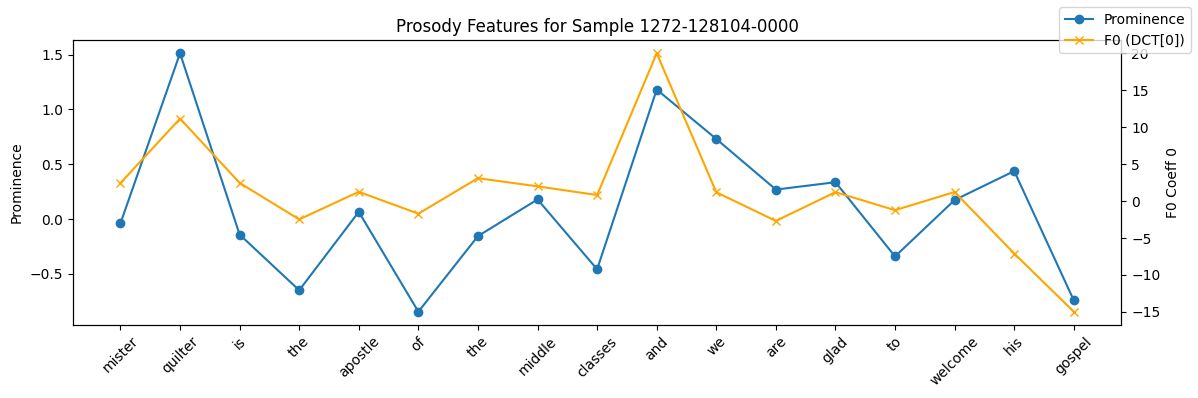

In [3]:
plot_prosody_features(extractor, idx=0)  # try different indices


In [3]:
import os
import json
import numpy as np

def make_json_serializable(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, dict):
        return {k: make_json_serializable(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [make_json_serializable(i) for i in obj]
    return obj

def save_features_to_json(extractor, output_dir="output_json"):
    os.makedirs(output_dir, exist_ok=True)

    for sample in extractor.samples:
        filename = sample["filename"]
        output_path = os.path.join(output_dir, f"{filename}.json")

        # Ensure everything inside is serializable
        serializable_sample = make_json_serializable(sample)

        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(serializable_sample, f, ensure_ascii=False, indent=2)

    print(f"✅ Saved {len(extractor.samples)} JSON files to: {output_dir}")


In [1]:
import pickle

with open("prosody_extractor_dev-clean.pkl", "rb") as f:
    extractor = pickle.load(f)

In [4]:
save_features_to_json(
    extractor,
    output_dir=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\json_features"
)


✅ Saved 2703 JSON files to: C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\json_features


In [2]:
import pickle

pkl_path = "prosody_extractor_train-clean-100.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(extractor, f)


print(f"✅ Extractor computed and saved to: {pkl_path}")



# import pickle

# with open("prosody_extractor.pkl", "rb") as f:
#     extractor = pickle.load(f)

# print(f"✅ Loaded {len(extractor)} samples from saved extractor")


# extractor.get_text(0)
# extractor.get_all_features()
# etc.


✅ Extractor computed and saved to: prosody_extractor_train-clean-100.pkl


In [3]:
sample = extractor[0]
sample

OrderedDict([('reader', '1272'),
             ('book', '128104'),
             ('text',
              'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL\n'),
             ('features',
              {'pause_before': [0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.06,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0],
               'pause_after': [0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.06,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0],
               'words': ['m

In [1]:
from feature_extractors import ProsodyFeatureExtractor

extractor = ProsodyFeatureExtractor(
    lab_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\train-clean-100\lab_words",  # should be *.lab files (converted TextGrid or .lab)
    wav_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\train-clean-100\converted_wav",
    phoneme_lab_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\train-clean-100\lab_phonemes",  # can also be from MFA alignment
    celex_path= r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\celex2\english\epw\epw.cd", #"path/to/celex/dictionary",  # required if f0_stress_localizer is "celex" None
    f0_stress_localizer= "celex",  # "celex" or "full_curve"
    extract_f0=True,
    extract_energy=True,
    extract_word_duration=True,
    extract_duration=True,
    extract_pause_before=True,
    extract_pause_after=True,
    extract_prominence=True,
    f0_mode="dct",
    f0_n_coeffs=4,
    energy_mode="mean",
    word_duration_mode="syllable_norm",
    prominence_mode="mean"
)


Extracted features ----: ['f0', 'energy', 'word_duration', 'duration', 'pause_before', 'pause_after', 'prominence']


Extracting Features from Readers:   0%|          | 0/251 [00:00<?, ?it/s]

'avonlea' not in cmudict. Using g2p fallback.
'fringed' not in cmudict. Using g2p fallback.
'alders' not in cmudict. Using g2p fallback.
'eardrops' not in cmudict. Using g2p fallback.
'wherefores' not in cmudict. Using g2p fallback.
'hummed' not in cmudict. Using g2p fallback.
'betokened' not in cmudict. Using g2p fallback.
'shyest' not in cmudict. Using g2p fallback.
'embowered' not in cmudict. Using g2p fallback.
'cuthberts' not in cmudict. Using g2p fallback.
'sociably' not in cmudict. Using g2p fallback.
'lombardies' not in cmudict. Using g2p fallback.
'overbrimming' not in cmudict. Using g2p fallback.
'birches' not in cmudict. Using g2p fallback.
'unmysterious' not in cmudict. Using g2p fallback.
'hairpins' not in cmudict. Using g2p fallback.
'understandingly' not in cmudict. Using g2p fallback.
'jaunting' not in cmudict. Using g2p fallback.
'unsupposable' not in cmudict. Using g2p fallback.
'asylums' not in cmudict. Using g2p fallback.
'disapprovingly' not in cmudict. Using g2p f

Extracting Features from Readers:   0%|          | 1/251 [03:08<13:07:15, 188.94s/it]

'debray' not in cmudict. Using g2p fallback.
'bipeds' not in cmudict. Using g2p fallback.
'danglars' not in cmudict. Using g2p fallback.
'grisettes' not in cmudict. Using g2p fallback.
'cleaving' not in cmudict. Using g2p fallback.
'cavalcanti' not in cmudict. Using g2p fallback.
'wretch' not in cmudict. Using g2p fallback.
'procureur' not in cmudict. Using g2p fallback.
'villefort' not in cmudict. Using g2p fallback.
'supplicate' not in cmudict. Using g2p fallback.
'lazaretto' not in cmudict. Using g2p fallback.
'impertinence' not in cmudict. Using g2p fallback.
'tradesman' not in cmudict. Using g2p fallback.
'mischance' not in cmudict. Using g2p fallback.
'imperturbable' not in cmudict. Using g2p fallback.
'stupefied' not in cmudict. Using g2p fallback.
'insultingly' not in cmudict. Using g2p fallback.
'jesting' not in cmudict. Using g2p fallback.
'vindictively' not in cmudict. Using g2p fallback.
'assizes' not in cmudict. Using g2p fallback.
'pardonable' not in cmudict. Using g2p fa

Extracting Features from Readers:   1%|          | 2/251 [06:20<13:10:22, 190.45s/it]

'unworthily' not in cmudict. Using g2p fallback.
'unfavourable' not in cmudict. Using g2p fallback.
'tootles' not in cmudict. Using g2p fallback.
'hullo' not in cmudict. Using g2p fallback.
'falteringly' not in cmudict. Using g2p fallback.
'craftily' not in cmudict. Using g2p fallback.
'tink' not in cmudict. Using g2p fallback.
'sillies' not in cmudict. Using g2p fallback.
'darning' not in cmudict. Using g2p fallback.
'nightgown' not in cmudict. Using g2p fallback.
'diffidently' not in cmudict. Using g2p fallback.
'nighty' not in cmudict. Using g2p fallback.
'forlornly' not in cmudict. Using g2p fallback.


Extracting Features from Readers:   1%|          | 3/251 [09:28<13:02:43, 189.37s/it]

'bethought' not in cmudict. Using g2p fallback.
'unshrinking' not in cmudict. Using g2p fallback.
'enquiry' not in cmudict. Using g2p fallback.
'gardencourt' not in cmudict. Using g2p fallback.
'touchett' not in cmudict. Using g2p fallback.
'adventuress' not in cmudict. Using g2p fallback.
'adventuresses' not in cmudict. Using g2p fallback.
'displeases' not in cmudict. Using g2p fallback.
'detests' not in cmudict. Using g2p fallback.
'detesting' not in cmudict. Using g2p fallback.
'caravansary' not in cmudict. Using g2p fallback.
'chambermaid' not in cmudict. Using g2p fallback.
'enquired' not in cmudict. Using g2p fallback.
'tenue' not in cmudict. Using g2p fallback.
'faithless' not in cmudict. Using g2p fallback.
'goodwood' not in cmudict. Using g2p fallback.
'bunchie' not in cmudict. Using g2p fallback.
'inconstant' not in cmudict. Using g2p fallback.
'criticised' not in cmudict. Using g2p fallback.
'compasses' not in cmudict. Using g2p fallback.
'neighbour' not in cmudict. Using g2

Extracting Features from Readers:   2%|▏         | 4/251 [14:48<16:31:17, 240.80s/it]

'sittings' not in cmudict. Using g2p fallback.
'doreslaer' not in cmudict. Using g2p fallback.
'neighbouring' not in cmudict. Using g2p fallback.
'recognised' not in cmudict. Using g2p fallback.
'joachimi' not in cmudict. Using g2p fallback.
'despatching' not in cmudict. Using g2p fallback.
'regicides' not in cmudict. Using g2p fallback.
'netherlanders' not in cmudict. Using g2p fallback.
'parleying' not in cmudict. Using g2p fallback.
'intercursus' not in cmudict. Using g2p fallback.
'pensionary' not in cmudict. Using g2p fallback.
'privateers' not in cmudict. Using g2p fallback.
'admiralties' not in cmudict. Using g2p fallback.
'pursuance' not in cmudict. Using g2p fallback.
'eventualities' not in cmudict. Using g2p fallback.
'pauw' not in cmudict. Using g2p fallback.
'northwards' not in cmudict. Using g2p fallback.
'shetlands' not in cmudict. Using g2p fallback.
'fireships' not in cmudict. Using g2p fallback.
'ruyter' not in cmudict. Using g2p fallback.
'orangist' not in cmudict. Us

Extracting Features from Readers:   2%|▏         | 5/251 [21:19<20:10:15, 295.18s/it]

'fulfilments' not in cmudict. Using g2p fallback.
'ripens' not in cmudict. Using g2p fallback.
'uncontainable' not in cmudict. Using g2p fallback.
'forelooking' not in cmudict. Using g2p fallback.
'forsakes' not in cmudict. Using g2p fallback.
'sincerest' not in cmudict. Using g2p fallback.
'compunctions' not in cmudict. Using g2p fallback.
'fastens' not in cmudict. Using g2p fallback.
'satchel' not in cmudict. Using g2p fallback.
'unsay' not in cmudict. Using g2p fallback.
'treasonable' not in cmudict. Using g2p fallback.
'aught' not in cmudict. Using g2p fallback.
'enchantments' not in cmudict. Using g2p fallback.
'plutarch' not in cmudict. Using g2p fallback.
'enamelled' not in cmudict. Using g2p fallback.
'where'er' not in cmudict. Using g2p fallback.
'dilates' not in cmudict. Using g2p fallback.
'soliloquizes' not in cmudict. Using g2p fallback.
'accosts' not in cmudict. Using g2p fallback.
'wets' not in cmudict. Using g2p fallback.
'gathercole' not in cmudict. Using g2p fallback.

Extracting Features from Readers:   2%|▏         | 6/251 [24:56<18:16:15, 268.47s/it]

'neighbours' not in cmudict. Using g2p fallback.
'whitened' not in cmudict. Using g2p fallback.
'pasteboard' not in cmudict. Using g2p fallback.
'neighbourhood' not in cmudict. Using g2p fallback.
'criticise' not in cmudict. Using g2p fallback.
'savour' not in cmudict. Using g2p fallback.
'immodesty' not in cmudict. Using g2p fallback.
'centred' not in cmudict. Using g2p fallback.
'indifferently' not in cmudict. Using g2p fallback.
'humour' not in cmudict. Using g2p fallback.
'sombre' not in cmudict. Using g2p fallback.
'disburdened' not in cmudict. Using g2p fallback.
'manoeuvre' not in cmudict. Using g2p fallback.
'sophistical' not in cmudict. Using g2p fallback.
'harbouring' not in cmudict. Using g2p fallback.
'bas' not in cmudict. Using g2p fallback.
'reflexions' not in cmudict. Using g2p fallback.
'honours' not in cmudict. Using g2p fallback.
'persistency' not in cmudict. Using g2p fallback.
'prevision' not in cmudict. Using g2p fallback.
'phaeton' not in cmudict. Using g2p fallba

Extracting Features from Readers:   3%|▎         | 7/251 [27:23<15:31:01, 228.94s/it]

'postik' not in cmudict. Using g2p fallback.
'bewailing' not in cmudict. Using g2p fallback.
'houarn' not in cmudict. Using g2p fallback.
'besought' not in cmudict. Using g2p fallback.
'shipwrecked' not in cmudict. Using g2p fallback.
'entreat' not in cmudict. Using g2p fallback.
'groac'h' not in cmudict. Using g2p fallback.
'beheld' not in cmudict. Using g2p fallback.
'colours' not in cmudict. Using g2p fallback.
'croaked' not in cmudict. Using g2p fallback.
'cockchafers' not in cmudict. Using g2p fallback.
'dismounting' not in cmudict. Using g2p fallback.
'barbaik' not in cmudict. Using g2p fallback.
'gorse' not in cmudict. Using g2p fallback.
'jegu' not in cmudict. Using g2p fallback.
'wonderingly' not in cmudict. Using g2p fallback.
'spoilt' not in cmudict. Using g2p fallback.
'morlaix' not in cmudict. Using g2p fallback.
'traitress' not in cmudict. Using g2p fallback.
'dreamings' not in cmudict. Using g2p fallback.
'swaddle' not in cmudict. Using g2p fallback.
'repugnance' not in 

Extracting Features from Readers:   3%|▎         | 8/251 [30:44<14:50:07, 219.78s/it]

'baculus' not in cmudict. Using g2p fallback.
'backbiter' not in cmudict. Using g2p fallback.
'topers' not in cmudict. Using g2p fallback.
'bigamy' not in cmudict. Using g2p fallback.
'billiousness' not in cmudict. Using g2p fallback.
'eatables' not in cmudict. Using g2p fallback.
'biograph' not in cmudict. Using g2p fallback.
'stereopticon' not in cmudict. Using g2p fallback.
'erythema' not in cmudict. Using g2p fallback.
'calorific' not in cmudict. Using g2p fallback.
'effulgence' not in cmudict. Using g2p fallback.
'physiognomy' not in cmudict. Using g2p fallback.
'aeteologized' not in cmudict. Using g2p fallback.
'perceptiveness' not in cmudict. Using g2p fallback.
'sensorium' not in cmudict. Using g2p fallback.
'praecordia' not in cmudict. Using g2p fallback.
'bonnets' not in cmudict. Using g2p fallback.
'belum' not in cmudict. Using g2p fallback.
'oblongata' not in cmudict. Using g2p fallback.
'bunco' not in cmudict. Using g2p fallback.
'savareen' not in cmudict. Using g2p fallba

Extracting Features from Readers:   4%|▎         | 9/251 [34:06<14:23:52, 214.18s/it]

'asseveration' not in cmudict. Using g2p fallback.
'untoothsome' not in cmudict. Using g2p fallback.
'abscesses' not in cmudict. Using g2p fallback.
'goitre' not in cmudict. Using g2p fallback.
'catarrh' not in cmudict. Using g2p fallback.
'rheum' not in cmudict. Using g2p fallback.
'scrofula' not in cmudict. Using g2p fallback.
'arnica' not in cmudict. Using g2p fallback.
'chapping' not in cmudict. Using g2p fallback.
'suppositories' not in cmudict. Using g2p fallback.
'bunions' not in cmudict. Using g2p fallback.
'callouses' not in cmudict. Using g2p fallback.
'debilitation' not in cmudict. Using g2p fallback.
'sleeplessness' not in cmudict. Using g2p fallback.
'catarrhal' not in cmudict. Using g2p fallback.
'luxuriance' not in cmudict. Using g2p fallback.
'invigorates' not in cmudict. Using g2p fallback.
'dentrifice' not in cmudict. Using g2p fallback.
'stomachic' not in cmudict. Using g2p fallback.
'polishes' not in cmudict. Using g2p fallback.
'paraffine' not in cmudict. Using g2p

Extracting Features from Readers:   4%|▍         | 10/251 [35:26<11:34:15, 172.85s/it]

'incommoded' not in cmudict. Using g2p fallback.
'alighted' not in cmudict. Using g2p fallback.
'repast' not in cmudict. Using g2p fallback.
'moosulmaun' not in cmudict. Using g2p fallback.
'cimeter' not in cmudict. Using g2p fallback.
'didst' not in cmudict. Using g2p fallback.
'bewailed' not in cmudict. Using g2p fallback.
'supplicated' not in cmudict. Using g2p fallback.
'lamentations' not in cmudict. Using g2p fallback.
'scheherazade' not in cmudict. Using g2p fallback.
'dinarzade' not in cmudict. Using g2p fallback.
'agreeably' not in cmudict. Using g2p fallback.
'barrenness' not in cmudict. Using g2p fallback.
'bairam' not in cmudict. Using g2p fallback.
'piteously' not in cmudict. Using g2p fallback.
'forbear' not in cmudict. Using g2p fallback.
'endeavours' not in cmudict. Using g2p fallback.
'metamorphoses' not in cmudict. Using g2p fallback.
'appearest' not in cmudict. Using g2p fallback.
'yunaun' not in cmudict. Using g2p fallback.
'leprous' not in cmudict. Using g2p fallbac

Extracting Features from Readers:   4%|▍         | 11/251 [38:45<12:03:33, 180.89s/it]

'crucifying' not in cmudict. Using g2p fallback.
'uncared' not in cmudict. Using g2p fallback.
'stowbody' not in cmudict. Using g2p fallback.
'postmastership' not in cmudict. Using g2p fallback.
'sinecure' not in cmudict. Using g2p fallback.
'tybee' not in cmudict. Using g2p fallback.
'raymie' not in cmudict. Using g2p fallback.
'wutherspoon' not in cmudict. Using g2p fallback.
'kennicott' not in cmudict. Using g2p fallback.
'townsmen' not in cmudict. Using g2p fallback.
'blausser' not in cmudict. Using g2p fallback.
'wifey' not in cmudict. Using g2p fallback.
'll' not in cmudict. Using g2p fallback.
'minniemashie' not in cmudict. Using g2p fallback.
'injudiciously' not in cmudict. Using g2p fallback.
'hearthstone' not in cmudict. Using g2p fallback.
'northwestland' not in cmudict. Using g2p fallback.
'burgs' not in cmudict. Using g2p fallback.
'zob' not in cmudict. Using g2p fallback.
'yahooville' not in cmudict. Using g2p fallback.
'bulling' not in cmudict. Using g2p fallback.
'bloom

Extracting Features from Readers:   5%|▍         | 12/251 [42:08<12:27:26, 187.64s/it]

'undertakers' not in cmudict. Using g2p fallback.
'cambric' not in cmudict. Using g2p fallback.
'crape' not in cmudict. Using g2p fallback.
'avidity' not in cmudict. Using g2p fallback.
'morrel' not in cmudict. Using g2p fallback.
'morcerfs' not in cmudict. Using g2p fallback.
'morcerf' not in cmudict. Using g2p fallback.
'villany' not in cmudict. Using g2p fallback.
'griefs' not in cmudict. Using g2p fallback.
'croesus' not in cmudict. Using g2p fallback.
'transacting' not in cmudict. Using g2p fallback.
'depute' not in cmudict. Using g2p fallback.
'boville' not in cmudict. Using g2p fallback.
'guiltily' not in cmudict. Using g2p fallback.
'foi' not in cmudict. Using g2p fallback.
'irreproachable' not in cmudict. Using g2p fallback.
'lifeward' not in cmudict. Using g2p fallback.
'opalescent' not in cmudict. Using g2p fallback.
'glimmered' not in cmudict. Using g2p fallback.
'sensuousness' not in cmudict. Using g2p fallback.
'oilskin' not in cmudict. Using g2p fallback.
'leering' not i

Extracting Features from Readers:   5%|▌         | 13/251 [45:31<12:42:17, 192.18s/it]

'humbird' not in cmudict. Using g2p fallback.
'lenticular' not in cmudict. Using g2p fallback.
'ardan' not in cmudict. Using g2p fallback.
'barbicane' not in cmudict. Using g2p fallback.
'mahomet' not in cmudict. Using g2p fallback.
'chronometer' not in cmudict. Using g2p fallback.
'columbiad' not in cmudict. Using g2p fallback.
'pulsation' not in cmudict. Using g2p fallback.
'clasping' not in cmudict. Using g2p fallback.
'briefites' not in cmudict. Using g2p fallback.
'beautifying' not in cmudict. Using g2p fallback.
'opals' not in cmudict. Using g2p fallback.
'vapory' not in cmudict. Using g2p fallback.
'quadrupeds' not in cmudict. Using g2p fallback.
'drayage' not in cmudict. Using g2p fallback.
'heathenish' not in cmudict. Using g2p fallback.
'whereon' not in cmudict. Using g2p fallback.
'kerm' not in cmudict. Using g2p fallback.
'disbelieved' not in cmudict. Using g2p fallback.
'globules' not in cmudict. Using g2p fallback.
'rynch' not in cmudict. Using g2p fallback.
'spalls' not 

Extracting Features from Readers:   6%|▌         | 14/251 [48:46<12:42:52, 193.13s/it]

'chaloner' not in cmudict. Using g2p fallback.
'grenville' not in cmudict. Using g2p fallback.
'guienne' not in cmudict. Using g2p fallback.
'scotchmen' not in cmudict. Using g2p fallback.
'blenan' not in cmudict. Using g2p fallback.
'intendant' not in cmudict. Using g2p fallback.
'heatherstone' not in cmudict. Using g2p fallback.
'scheveling' not in cmudict. Using g2p fallback.
'acclamations' not in cmudict. Using g2p fallback.
'obeisance' not in cmudict. Using g2p fallback.
'conynghame' not in cmudict. Using g2p fallback.
'gallants' not in cmudict. Using g2p fallback.
'arnwood' not in cmudict. Using g2p fallback.
'effaced' not in cmudict. Using g2p fallback.
'proffers' not in cmudict. Using g2p fallback.
'factotum' not in cmudict. Using g2p fallback.
'quitted' not in cmudict. Using g2p fallback.
'mournfully' not in cmudict. Using g2p fallback.
'personages' not in cmudict. Using g2p fallback.
'gipsies' not in cmudict. Using g2p fallback.


Extracting Features from Readers:   6%|▌         | 15/251 [51:55<12:34:15, 191.76s/it]

'hypnotization' not in cmudict. Using g2p fallback.
'hypnotizing' not in cmudict. Using g2p fallback.
'presuppositions' not in cmudict. Using g2p fallback.
'hypnotizer' not in cmudict. Using g2p fallback.
'insanities' not in cmudict. Using g2p fallback.
'misinterpretations' not in cmudict. Using g2p fallback.
'suggestibility' not in cmudict. Using g2p fallback.
'reenforced' not in cmudict. Using g2p fallback.
'purposive' not in cmudict. Using g2p fallback.
'perversities' not in cmudict. Using g2p fallback.
'morphinist' not in cmudict. Using g2p fallback.
'sanitarium' not in cmudict. Using g2p fallback.
'devastates' not in cmudict. Using g2p fallback.
'reenforcement' not in cmudict. Using g2p fallback.
'reenforces' not in cmudict. Using g2p fallback.
'pseudophilosophy' not in cmudict. Using g2p fallback.
'fructified' not in cmudict. Using g2p fallback.
'reenforce' not in cmudict. Using g2p fallback.
'criminological' not in cmudict. Using g2p fallback.


Extracting Features from Readers:   6%|▋         | 16/251 [54:52<12:14:04, 187.43s/it]

'unc' not in cmudict. Using g2p fallback.
'ol' not in cmudict. Using g2p fallback.
'po'ly' not in cmudict. Using g2p fallback.
'uns' not in cmudict. Using g2p fallback.
'lipperty' not in cmudict. Using g2p fallback.
'pouched' not in cmudict. Using g2p fallback.
'opossums' not in cmudict. Using g2p fallback.
'chatterer' not in cmudict. Using g2p fallback.
'reprovingly' not in cmudict. Using g2p fallback.
'deadest' not in cmudict. Using g2p fallback.
'blacky' not in cmudict. Using g2p fallback.
'cleverest' not in cmudict. Using g2p fallback.
'recognise' not in cmudict. Using g2p fallback.
'recumbent' not in cmudict. Using g2p fallback.
'pattering' not in cmudict. Using g2p fallback.
'greyly' not in cmudict. Using g2p fallback.
'cunningly' not in cmudict. Using g2p fallback.
'realised' not in cmudict. Using g2p fallback.
'colourless' not in cmudict. Using g2p fallback.
'magnificence' not in cmudict. Using g2p fallback.
'intermediation' not in cmudict. Using g2p fallback.
'veined' not in c

Extracting Features from Readers:   7%|▋         | 17/251 [57:46<11:55:31, 183.47s/it]

'enormities' not in cmudict. Using g2p fallback.
'sophistries' not in cmudict. Using g2p fallback.
'evinces' not in cmudict. Using g2p fallback.
'insensibility' not in cmudict. Using g2p fallback.
'adventitious' not in cmudict. Using g2p fallback.
'unpractical' not in cmudict. Using g2p fallback.
'loveliness' not in cmudict. Using g2p fallback.
'presentiments' not in cmudict. Using g2p fallback.
'vitals' not in cmudict. Using g2p fallback.
'souled' not in cmudict. Using g2p fallback.
'joyously' not in cmudict. Using g2p fallback.
'discomfited' not in cmudict. Using g2p fallback.
'inexhaustibly' not in cmudict. Using g2p fallback.
'undiscouraged' not in cmudict. Using g2p fallback.
'exaltation' not in cmudict. Using g2p fallback.
'clearness' not in cmudict. Using g2p fallback.
'extenuation' not in cmudict. Using g2p fallback.
'imperishable' not in cmudict. Using g2p fallback.
'moralizes' not in cmudict. Using g2p fallback.
'penetrativeness' not in cmudict. Using g2p fallback.
'ineffably

Extracting Features from Readers:   7%|▋         | 18/251 [1:01:09<12:14:59, 189.27s/it]

'winesburg' not in cmudict. Using g2p fallback.
'dullard' not in cmudict. Using g2p fallback.
'industrialism' not in cmudict. Using g2p fallback.
'productiveness' not in cmudict. Using g2p fallback.
'wriggled' not in cmudict. Using g2p fallback.
'neander' not in cmudict. Using g2p fallback.
'brilliancy' not in cmudict. Using g2p fallback.
'jove' not in cmudict. Using g2p fallback.
'nasmyth' not in cmudict. Using g2p fallback.
'selenites' not in cmudict. Using g2p fallback.
'habitability' not in cmudict. Using g2p fallback.
'inhabitable' not in cmudict. Using g2p fallback.
'alternations' not in cmudict. Using g2p fallback.
'insufficiency' not in cmudict. Using g2p fallback.
'respirable' not in cmudict. Using g2p fallback.


Extracting Features from Readers:   8%|▊         | 19/251 [1:04:29<12:24:32, 192.55s/it]

'lineaments' not in cmudict. Using g2p fallback.
'fantastical' not in cmudict. Using g2p fallback.
'tangibility' not in cmudict. Using g2p fallback.
'snappishly' not in cmudict. Using g2p fallback.
'punning' not in cmudict. Using g2p fallback.
'devotedly' not in cmudict. Using g2p fallback.
'roguish' not in cmudict. Using g2p fallback.
'shoeblack' not in cmudict. Using g2p fallback.
'impudence' not in cmudict. Using g2p fallback.
'wetted' not in cmudict. Using g2p fallback.
'wavelet' not in cmudict. Using g2p fallback.
'gaped' not in cmudict. Using g2p fallback.
'shallows' not in cmudict. Using g2p fallback.
'nightcap' not in cmudict. Using g2p fallback.
'cacambo' not in cmudict. Using g2p fallback.
'entrapping' not in cmudict. Using g2p fallback.
'candide' not in cmudict. Using g2p fallback.
'cunegonde' not in cmudict. Using g2p fallback.
'cadis' not in cmudict. Using g2p fallback.
'pashas' not in cmudict. Using g2p fallback.
'effendis' not in cmudict. Using g2p fallback.
'ravished' n

Extracting Features from Readers:   8%|▊         | 20/251 [1:07:49<12:30:11, 194.85s/it]

'uncas' not in cmudict. Using g2p fallback.
'hurons' not in cmudict. Using g2p fallback.
'sagamore' not in cmudict. Using g2p fallback.
'dusky' not in cmudict. Using g2p fallback.
'prompter' not in cmudict. Using g2p fallback.
'mummery' not in cmudict. Using g2p fallback.
'practised' not in cmudict. Using g2p fallback.
'execrating' not in cmudict. Using g2p fallback.
'magua' not in cmudict. Using g2p fallback.
'chippewas' not in cmudict. Using g2p fallback.
'squaw' not in cmudict. Using g2p fallback.
'recreant' not in cmudict. Using g2p fallback.
'noiseless' not in cmudict. Using g2p fallback.
'delawares' not in cmudict. Using g2p fallback.
'squaws' not in cmudict. Using g2p fallback.
'montcalm' not in cmudict. Using g2p fallback.
'canadas' not in cmudict. Using g2p fallback.
'maise' not in cmudict. Using g2p fallback.
'salutations' not in cmudict. Using g2p fallback.
'yengeese' not in cmudict. Using g2p fallback.
'evasively' not in cmudict. Using g2p fallback.
'wigwams' not in cmudict

Extracting Features from Readers:   8%|▊         | 21/251 [1:11:09<12:32:18, 196.26s/it]

'riverboro' not in cmudict. Using g2p fallback.
'squashes' not in cmudict. Using g2p fallback.
'handcart' not in cmudict. Using g2p fallback.
'sagacity' not in cmudict. Using g2p fallback.
'rapturously' not in cmudict. Using g2p fallback.
'crinkled' not in cmudict. Using g2p fallback.
'thoap' not in cmudict. Using g2p fallback.
'vender' not in cmudict. Using g2p fallback.
'milltown' not in cmudict. Using g2p fallback.
'shan't' not in cmudict. Using g2p fallback.
'rigmarole' not in cmudict. Using g2p fallback.
'cosm' not in cmudict. Using g2p fallback.
'punctually' not in cmudict. Using g2p fallback.
'rustly' not in cmudict. Using g2p fallback.
'nokomis' not in cmudict. Using g2p fallback.
'apostrophized' not in cmudict. Using g2p fallback.
'drest' not in cmudict. Using g2p fallback.
'unstopping' not in cmudict. Using g2p fallback.
'ungluing' not in cmudict. Using g2p fallback.
'husking' not in cmudict. Using g2p fallback.
'genially' not in cmudict. Using g2p fallback.
'joyless' not in 

Extracting Features from Readers:   9%|▉         | 22/251 [1:14:05<12:05:58, 190.21s/it]

'somethin' not in cmudict. Using g2p fallback.
'home'path' not in cmudict. Using g2p fallback.
'elocutionist' not in cmudict. Using g2p fallback.
'intemperance' not in cmudict. Using g2p fallback.
'perspired' not in cmudict. Using g2p fallback.
'mortification' not in cmudict. Using g2p fallback.
'couplet' not in cmudict. Using g2p fallback.
'fondles' not in cmudict. Using g2p fallback.
'smellie' not in cmudict. Using g2p fallback.
'prayin' not in cmudict. Using g2p fallback.
'swearin' not in cmudict. Using g2p fallback.
'beatin'est' not in cmudict. Using g2p fallback.
'improvin' not in cmudict. Using g2p fallback.
'swappin' not in cmudict. Using g2p fallback.
's'pose' not in cmudict. Using g2p fallback.
'accountin' not in cmudict. Using g2p fallback.
'peppermints' not in cmudict. Using g2p fallback.
'festal' not in cmudict. Using g2p fallback.
'dignifying' not in cmudict. Using g2p fallback.
'pianola' not in cmudict. Using g2p fallback.
'sagaciously' not in cmudict. Using g2p fallback.

Extracting Features from Readers:   9%|▉         | 23/251 [1:17:25<12:14:27, 193.28s/it]

'countrywomen' not in cmudict. Using g2p fallback.
'jalib' not in cmudict. Using g2p fallback.
'koolloob' not in cmudict. Using g2p fallback.
'aleppo' not in cmudict. Using g2p fallback.
'fetnah' not in cmudict. Using g2p fallback.
'fancying' not in cmudict. Using g2p fallback.
'requital' not in cmudict. Using g2p fallback.
'prostrated' not in cmudict. Using g2p fallback.
'respell' not in cmudict. Using g2p fallback.
'rigour' not in cmudict. Using g2p fallback.
'haroon' not in cmudict. Using g2p fallback.
'rusheed' not in cmudict. Using g2p fallback.
'availing' not in cmudict. Using g2p fallback.
'nouron' not in cmudict. Using g2p fallback.
'nihar' not in cmudict. Using g2p fallback.
'equipage' not in cmudict. Using g2p fallback.
'alighting' not in cmudict. Using g2p fallback.
'eunuchs' not in cmudict. Using g2p fallback.
'syndic' not in cmudict. Using g2p fallback.
'disconsolate' not in cmudict. Using g2p fallback.
'soever' not in cmudict. Using g2p fallback.
'requite' not in cmudict.

Extracting Features from Readers:  10%|▉         | 24/251 [1:20:50<12:24:10, 196.70s/it]

'historiographer' not in cmudict. Using g2p fallback.
'rosebreast' not in cmudict. Using g2p fallback.
'crossly' not in cmudict. Using g2p fallback.
'redwing' not in cmudict. Using g2p fallback.
'tanager' not in cmudict. Using g2p fallback.
'broadwing' not in cmudict. Using g2p fallback.
'thenardier' not in cmudict. Using g2p fallback.
'wench' not in cmudict. Using g2p fallback.
'engrafted' not in cmudict. Using g2p fallback.
'fishwife' not in cmudict. Using g2p fallback.
'delille' not in cmudict. Using g2p fallback.
'coquetry' not in cmudict. Using g2p fallback.
'hussars' not in cmudict. Using g2p fallback.
'bonapartist' not in cmudict. Using g2p fallback.
'sutlers' not in cmudict. Using g2p fallback.
'furrows' not in cmudict. Using g2p fallback.
'sutler' not in cmudict. Using g2p fallback.
'orthographical' not in cmudict. Using g2p fallback.
'slothful' not in cmudict. Using g2p fallback.
'giantess' not in cmudict. Using g2p fallback.
'scamp' not in cmudict. Using g2p fallback.
'mammi

Extracting Features from Readers:  10%|▉         | 25/251 [1:23:44<11:54:56, 189.81s/it]

'beseemeth' not in cmudict. Using g2p fallback.
'fulfil' not in cmudict. Using g2p fallback.
'constraineth' not in cmudict. Using g2p fallback.
'nihilo' not in cmudict. Using g2p fallback.
'nihil' not in cmudict. Using g2p fallback.
'gainsaid' not in cmudict. Using g2p fallback.
'reasonings' not in cmudict. Using g2p fallback.
'tillage' not in cmudict. Using g2p fallback.
'cultivator' not in cmudict. Using g2p fallback.
'discoverer' not in cmudict. Using g2p fallback.
'plainward' not in cmudict. Using g2p fallback.
'firstlings' not in cmudict. Using g2p fallback.
'multifariousness' not in cmudict. Using g2p fallback.
'labyrinths' not in cmudict. Using g2p fallback.
'firmament' not in cmudict. Using g2p fallback.
'moralities' not in cmudict. Using g2p fallback.
'sublimer' not in cmudict. Using g2p fallback.
'voltairean' not in cmudict. Using g2p fallback.
'spiritualises' not in cmudict. Using g2p fallback.
'inmost' not in cmudict. Using g2p fallback.
'spiritualising' not in cmudict. Usi

Extracting Features from Readers:  10%|█         | 26/251 [1:27:04<12:03:44, 193.00s/it]

'ponsonby' not in cmudict. Using g2p fallback.
'fuegians' not in cmudict. Using g2p fallback.
'fuegian' not in cmudict. Using g2p fallback.
'statenland' not in cmudict. Using g2p fallback.
'cloaks' not in cmudict. Using g2p fallback.
'wretches' not in cmudict. Using g2p fallback.
'patagonians' not in cmudict. Using g2p fallback.
'freischutz' not in cmudict. Using g2p fallback.
'caffres' not in cmudict. Using g2p fallback.
'jemmy' not in cmudict. Using g2p fallback.
'fuegia' not in cmudict. Using g2p fallback.
'dirtied' not in cmudict. Using g2p fallback.
'partaken' not in cmudict. Using g2p fallback.
'untrimmed' not in cmudict. Using g2p fallback.
'ourangoutang' not in cmudict. Using g2p fallback.
'handsomest' not in cmudict. Using g2p fallback.
'goeree' not in cmudict. Using g2p fallback.
'putrefying' not in cmudict. Using g2p fallback.
'solitudes' not in cmudict. Using g2p fallback.
'fagus' not in cmudict. Using g2p fallback.
'betuloides' not in cmudict. Using g2p fallback.
'inconsid

Extracting Features from Readers:  11%|█         | 27/251 [1:30:21<12:04:26, 194.05s/it]

'caliban' not in cmudict. Using g2p fallback.
'setebos' not in cmudict. Using g2p fallback.
'wilful' not in cmudict. Using g2p fallback.
'freakish' not in cmudict. Using g2p fallback.
'haled' not in cmudict. Using g2p fallback.
'stuffily' not in cmudict. Using g2p fallback.
'unblenching' not in cmudict. Using g2p fallback.
'moccasined' not in cmudict. Using g2p fallback.
'tomahawked' not in cmudict. Using g2p fallback.
'scenting' not in cmudict. Using g2p fallback.
'pitilessly' not in cmudict. Using g2p fallback.
'anon' not in cmudict. Using g2p fallback.
'hazels' not in cmudict. Using g2p fallback.
'inanity' not in cmudict. Using g2p fallback.
'phantasms' not in cmudict. Using g2p fallback.
'importances' not in cmudict. Using g2p fallback.
'illuminati' not in cmudict. Using g2p fallback.
'trackless' not in cmudict. Using g2p fallback.
'poplars' not in cmudict. Using g2p fallback.
'awakenings' not in cmudict. Using g2p fallback.
'pulsed' not in cmudict. Using g2p fallback.
'frisking' n

Extracting Features from Readers:  11%|█         | 28/251 [1:33:44<12:11:28, 196.81s/it]

'confidingly' not in cmudict. Using g2p fallback.
'chebec' not in cmudict. Using g2p fallback.
'scrapper' not in cmudict. Using g2p fallback.
'redtail' not in cmudict. Using g2p fallback.
'fearlessness' not in cmudict. Using g2p fallback.
'flycatchers' not in cmudict. Using g2p fallback.
'cresty' not in cmudict. Using g2p fallback.
'pewee' not in cmudict. Using g2p fallback.
'bedclothes' not in cmudict. Using g2p fallback.
'nuthatch' not in cmudict. Using g2p fallback.
'chickadee' not in cmudict. Using g2p fallback.
'killy' not in cmudict. Using g2p fallback.
'shamefully' not in cmudict. Using g2p fallback.
'longbill' not in cmudict. Using g2p fallback.
'tussock' not in cmudict. Using g2p fallback.
'pebbly' not in cmudict. Using g2p fallback.
'waistcoat' not in cmudict. Using g2p fallback.
'sandpiper' not in cmudict. Using g2p fallback.
'squatted' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  12%|█▏        | 29/251 [1:36:41<11:46:00, 190.81s/it]

'tules' not in cmudict. Using g2p fallback.
'fibres' not in cmudict. Using g2p fallback.
'screecher' not in cmudict. Using g2p fallback.
'unsought' not in cmudict. Using g2p fallback.
'mousing' not in cmudict. Using g2p fallback.
'dawdled' not in cmudict. Using g2p fallback.
'untrodden' not in cmudict. Using g2p fallback.
'twixt' not in cmudict. Using g2p fallback.
'moulded' not in cmudict. Using g2p fallback.
'throbs' not in cmudict. Using g2p fallback.
'inexorableness' not in cmudict. Using g2p fallback.
'swerving' not in cmudict. Using g2p fallback.
'pulseless' not in cmudict. Using g2p fallback.
'bendings' not in cmudict. Using g2p fallback.
'enchants' not in cmudict. Using g2p fallback.
'unrestful' not in cmudict. Using g2p fallback.
'fulfils' not in cmudict. Using g2p fallback.
'straightway' not in cmudict. Using g2p fallback.
'splendour' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  12%|█▏        | 30/251 [1:40:44<12:40:58, 206.60s/it]

'shambled' not in cmudict. Using g2p fallback.
'faultless' not in cmudict. Using g2p fallback.
'sureness' not in cmudict. Using g2p fallback.
'd'you' not in cmudict. Using g2p fallback.
'learnin' not in cmudict. Using g2p fallback.
'eldara' not in cmudict. Using g2p fallback.
'tenderfoot' not in cmudict. Using g2p fallback.
'bunking' not in cmudict. Using g2p fallback.
'gettin' not in cmudict. Using g2p fallback.
'unsaddled' not in cmudict. Using g2p fallback.
'speakin' not in cmudict. Using g2p fallback.
'leastways' not in cmudict. Using g2p fallback.
'wonderin' not in cmudict. Using g2p fallback.
'drivin' not in cmudict. Using g2p fallback.
'runnin' not in cmudict. Using g2p fallback.
'eddicated' not in cmudict. Using g2p fallback.
'bucker' not in cmudict. Using g2p fallback.
'figgers' not in cmudict. Using g2p fallback.
'lyin' not in cmudict. Using g2p fallback.
'off'n' not in cmudict. Using g2p fallback.
'out'n' not in cmudict. Using g2p fallback.
'b'lieve' not in cmudict. Using g2

Extracting Features from Readers:  12%|█▏        | 31/251 [1:47:30<16:17:06, 266.49s/it]

'merrymaking' not in cmudict. Using g2p fallback.
'plentifully' not in cmudict. Using g2p fallback.
'wineglass' not in cmudict. Using g2p fallback.
'lagree' not in cmudict. Using g2p fallback.
'revenged' not in cmudict. Using g2p fallback.
'relight' not in cmudict. Using g2p fallback.
'locrinos' not in cmudict. Using g2p fallback.
'adieus' not in cmudict. Using g2p fallback.
'odours' not in cmudict. Using g2p fallback.
'jewelled' not in cmudict. Using g2p fallback.
'melodiously' not in cmudict. Using g2p fallback.
'handsomer' not in cmudict. Using g2p fallback.
'syren' not in cmudict. Using g2p fallback.
'rejoicings' not in cmudict. Using g2p fallback.
'southwards' not in cmudict. Using g2p fallback.
'quailed' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  13%|█▎        | 32/251 [1:54:23<18:52:45, 310.34s/it]

'northanger' not in cmudict. Using g2p fallback.
'entreated' not in cmudict. Using g2p fallback.
'morlands' not in cmudict. Using g2p fallback.
'unpropitious' not in cmudict. Using g2p fallback.
'conjectured' not in cmudict. Using g2p fallback.
'spinnet' not in cmudict. Using g2p fallback.
'plumpness' not in cmudict. Using g2p fallback.
'sufferance' not in cmudict. Using g2p fallback.
'raptures' not in cmudict. Using g2p fallback.
'pianoforte' not in cmudict. Using g2p fallback.
'perverseness' not in cmudict. Using g2p fallback.
'humoured' not in cmudict. Using g2p fallback.
'cheerfulness' not in cmudict. Using g2p fallback.
'reproof' not in cmudict. Using g2p fallback.
'cravats' not in cmudict. Using g2p fallback.
'languor' not in cmudict. Using g2p fallback.
'listlessness' not in cmudict. Using g2p fallback.
'avocations' not in cmudict. Using g2p fallback.
'uncandid' not in cmudict. Using g2p fallback.
'unlooked' not in cmudict. Using g2p fallback.
'mildness' not in cmudict. Using g2

Extracting Features from Readers:  13%|█▎        | 33/251 [2:00:37<19:56:53, 329.42s/it]

'interstice' not in cmudict. Using g2p fallback.
'munificence' not in cmudict. Using g2p fallback.
'ludlows' not in cmudict. Using g2p fallback.
'wonderments' not in cmudict. Using g2p fallback.
'discriminations' not in cmudict. Using g2p fallback.
'fidgety' not in cmudict. Using g2p fallback.
'euston' not in cmudict. Using g2p fallback.
'bantling' not in cmudict. Using g2p fallback.
'candour' not in cmudict. Using g2p fallback.
'harlings' not in cmudict. Using g2p fallback.
'd'arnault' not in cmudict. Using g2p fallback.
'laundress' not in cmudict. Using g2p fallback.
'd'arnaults' not in cmudict. Using g2p fallback.
'fidgets' not in cmudict. Using g2p fallback.
'dainties' not in cmudict. Using g2p fallback.
'mammy' not in cmudict. Using g2p fallback.
'n't' not in cmudict. Using g2p fallback.
'unmercifully' not in cmudict. Using g2p fallback.
'pickaninny' not in cmudict. Using g2p fallback.
'vitalized' not in cmudict. Using g2p fallback.
'spect' not in cmudict. Using g2p fallback.
'dus

Extracting Features from Readers:  14%|█▎        | 34/251 [2:05:59<19:43:19, 327.19s/it]

'furies' not in cmudict. Using g2p fallback.
'pairfect' not in cmudict. Using g2p fallback.
'meeracle' not in cmudict. Using g2p fallback.
'battened' not in cmudict. Using g2p fallback.
'unintelligent' not in cmudict. Using g2p fallback.
'lameness' not in cmudict. Using g2p fallback.
'debaucheries' not in cmudict. Using g2p fallback.
'unwearied' not in cmudict. Using g2p fallback.
'pyjamas' not in cmudict. Using g2p fallback.
'bewitching' not in cmudict. Using g2p fallback.
'roadstead' not in cmudict. Using g2p fallback.
'garlanded' not in cmudict. Using g2p fallback.
'undefaced' not in cmudict. Using g2p fallback.
'severer' not in cmudict. Using g2p fallback.
'unsubstantial' not in cmudict. Using g2p fallback.
'chinaman' not in cmudict. Using g2p fallback.
'brutalised' not in cmudict. Using g2p fallback.
'gangways' not in cmudict. Using g2p fallback.
'hatchways' not in cmudict. Using g2p fallback.
'praus' not in cmudict. Using g2p fallback.
'campongs' not in cmudict. Using g2p fallbac

Extracting Features from Readers:  14%|█▍        | 35/251 [2:09:50<17:54:08, 298.37s/it]

'perceptibly' not in cmudict. Using g2p fallback.
'snowfield' not in cmudict. Using g2p fallback.
'oakbourne' not in cmudict. Using g2p fallback.
'meagre' not in cmudict. Using g2p fallback.
'rejoices' not in cmudict. Using g2p fallback.
'effulgent' not in cmudict. Using g2p fallback.
'cruder' not in cmudict. Using g2p fallback.
'searchingly' not in cmudict. Using g2p fallback.
'woodless' not in cmudict. Using g2p fallback.
'weblike' not in cmudict. Using g2p fallback.
'unscreened' not in cmudict. Using g2p fallback.
'overstartled' not in cmudict. Using g2p fallback.
'monitions' not in cmudict. Using g2p fallback.
'peppercorns' not in cmudict. Using g2p fallback.
'flavoured' not in cmudict. Using g2p fallback.
'forcemeat' not in cmudict. Using g2p fallback.
'oppian' not in cmudict. Using g2p fallback.
'widen'd' not in cmudict. Using g2p fallback.
'vermicelli' not in cmudict. Using g2p fallback.
'stupified' not in cmudict. Using g2p fallback.
'realise' not in cmudict. Using g2p fallback

Extracting Features from Readers:  14%|█▍        | 36/251 [2:13:29<16:23:09, 274.37s/it]

'jupp' not in cmudict. Using g2p fallback.
'providentially' not in cmudict. Using g2p fallback.
'gwendolen' not in cmudict. Using g2p fallback.
'careworn' not in cmudict. Using g2p fallback.
'ocumpaugh' not in cmudict. Using g2p fallback.
'burdock' not in cmudict. Using g2p fallback.
'aeroplane' not in cmudict. Using g2p fallback.
'felderson' not in cmudict. Using g2p fallback.
'dinnah' not in cmudict. Using g2p fallback.
'hab' not in cmudict. Using g2p fallback.
'ohdahd' not in cmudict. Using g2p fallback.
'darky' not in cmudict. Using g2p fallback.
'stuttered' not in cmudict. Using g2p fallback.
'brung' not in cmudict. Using g2p fallback.
'powful' not in cmudict. Using g2p fallback.
'telephome' not in cmudict. Using g2p fallback.
'yas' not in cmudict. Using g2p fallback.
'aftah' not in cmudict. Using g2p fallback.
'hongry' not in cmudict. Using g2p fallback.
'drat' not in cmudict. Using g2p fallback.
'liah' not in cmudict. Using g2p fallback.
'fo' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  15%|█▍        | 37/251 [2:17:14<15:25:58, 259.62s/it]

'afrites' not in cmudict. Using g2p fallback.
'jinns' not in cmudict. Using g2p fallback.
'ransomed' not in cmudict. Using g2p fallback.
'coranto' not in cmudict. Using g2p fallback.
'highwayman' not in cmudict. Using g2p fallback.
'cecily' not in cmudict. Using g2p fallback.
'chancing' not in cmudict. Using g2p fallback.
'abjectly' not in cmudict. Using g2p fallback.
'basketful' not in cmudict. Using g2p fallback.
'foregathered' not in cmudict. Using g2p fallback.
'pellucid' not in cmudict. Using g2p fallback.
'dreamily' not in cmudict. Using g2p fallback.
'sojourned' not in cmudict. Using g2p fallback.
'skeered' not in cmudict. Using g2p fallback.
'fearfully' not in cmudict. Using g2p fallback.
'spectral' not in cmudict. Using g2p fallback.
'visitant' not in cmudict. Using g2p fallback.
'eyeholes' not in cmudict. Using g2p fallback.
'soundless' not in cmudict. Using g2p fallback.
'spruces' not in cmudict. Using g2p fallback.
'saucerful' not in cmudict. Using g2p fallback.
'reservedne

Extracting Features from Readers:  15%|█▌        | 38/251 [2:20:28<14:11:33, 239.88s/it]

'receiv'd' not in cmudict. Using g2p fallback.
'express'd' not in cmudict. Using g2p fallback.
'thro' not in cmudict. Using g2p fallback.
'seem'd' not in cmudict. Using g2p fallback.
'hyrcania' not in cmudict. Using g2p fallback.
'determin'd' not in cmudict. Using g2p fallback.
'procur'd' not in cmudict. Using g2p fallback.
'valour' not in cmudict. Using g2p fallback.
'acknowledg' not in cmudict. Using g2p fallback.
''d' not in cmudict. Using g2p fallback.
'amphitheatrical' not in cmudict. Using g2p fallback.
'embellish'd' not in cmudict. Using g2p fallback.
'compleatly' not in cmudict. Using g2p fallback.
'accoutred' not in cmudict. Using g2p fallback.
'proclaim'd' not in cmudict. Using g2p fallback.
'enigmas' not in cmudict. Using g2p fallback.
'perplext' not in cmudict. Using g2p fallback.
'continu'd' not in cmudict. Using g2p fallback.
'atchievements' not in cmudict. Using g2p fallback.
'watch'd' not in cmudict. Using g2p fallback.
'allow'd' not in cmudict. Using g2p fallback.
'cov

Extracting Features from Readers:  16%|█▌        | 39/251 [2:22:03<11:34:52, 196.66s/it]

'ragout' not in cmudict. Using g2p fallback.
'cheapside' not in cmudict. Using g2p fallback.
'pemberley' not in cmudict. Using g2p fallback.
'captivation' not in cmudict. Using g2p fallback.
'solaced' not in cmudict. Using g2p fallback.
'wretchedness' not in cmudict. Using g2p fallback.
'longbourn' not in cmudict. Using g2p fallback.
'netherfield' not in cmudict. Using g2p fallback.
'studier' not in cmudict. Using g2p fallback.
'unvarying' not in cmudict. Using g2p fallback.
'neighbourhoods' not in cmudict. Using g2p fallback.
'lucases' not in cmudict. Using g2p fallback.
'meryton' not in cmudict. Using g2p fallback.
'witticisms' not in cmudict. Using g2p fallback.
'solway' not in cmudict. Using g2p fallback.
'taross' not in cmudict. Using g2p fallback.
'eske' not in cmudict. Using g2p fallback.
'liddel' not in cmudict. Using g2p fallback.
'moonless' not in cmudict. Using g2p fallback.
'matin' not in cmudict. Using g2p fallback.
'unrefreshed' not in cmudict. Using g2p fallback.
'untast

Extracting Features from Readers:  16%|█▌        | 40/251 [2:25:16<11:27:38, 195.54s/it]

'benignant' not in cmudict. Using g2p fallback.
'whelms' not in cmudict. Using g2p fallback.
'lightsome' not in cmudict. Using g2p fallback.
'ungenial' not in cmudict. Using g2p fallback.
'superabundant' not in cmudict. Using g2p fallback.
'quenched' not in cmudict. Using g2p fallback.
'vapours' not in cmudict. Using g2p fallback.
'throned' not in cmudict. Using g2p fallback.
'comest' not in cmudict. Using g2p fallback.
'shoreless' not in cmudict. Using g2p fallback.
'sweepest' not in cmudict. Using g2p fallback.
'viewless' not in cmudict. Using g2p fallback.
'pinnacles' not in cmudict. Using g2p fallback.
'vallies' not in cmudict. Using g2p fallback.
'holdest' not in cmudict. Using g2p fallback.
'canst' not in cmudict. Using g2p fallback.
'roarings' not in cmudict. Using g2p fallback.
'despoiled' not in cmudict. Using g2p fallback.
'wielders' not in cmudict. Using g2p fallback.
'visaged' not in cmudict. Using g2p fallback.
'disquisition' not in cmudict. Using g2p fallback.
'immedicabl

Extracting Features from Readers:  16%|█▋        | 41/251 [2:28:26<11:18:30, 193.86s/it]

'ma'amselle' not in cmudict. Using g2p fallback.
'signors' not in cmudict. Using g2p fallback.
'boded' not in cmudict. Using g2p fallback.
'ludovico' not in cmudict. Using g2p fallback.
'jeeringly' not in cmudict. Using g2p fallback.
'valancourt' not in cmudict. Using g2p fallback.
'casement' not in cmudict. Using g2p fallback.
'rampart' not in cmudict. Using g2p fallback.
'udolpho' not in cmudict. Using g2p fallback.
'signora' not in cmudict. Using g2p fallback.
'livona' not in cmudict. Using g2p fallback.
'excellenza' not in cmudict. Using g2p fallback.
'montoni' not in cmudict. Using g2p fallback.
'condescended' not in cmudict. Using g2p fallback.
'trifled' not in cmudict. Using g2p fallback.
'drouet' not in cmudict. Using g2p fallback.
'rounders' not in cmudict. Using g2p fallback.
'hurstwood' not in cmudict. Using g2p fallback.
'luxuriously' not in cmudict. Using g2p fallback.
'caryoe' not in cmudict. Using g2p fallback.
'favourably' not in cmudict. Using g2p fallback.
'barkeeper'

Extracting Features from Readers:  17%|█▋        | 42/251 [2:31:47<11:22:41, 195.99s/it]

'alarum' not in cmudict. Using g2p fallback.
'mayst' not in cmudict. Using g2p fallback.
'quoth' not in cmudict. Using g2p fallback.
'likings' not in cmudict. Using g2p fallback.
'bided' not in cmudict. Using g2p fallback.
'pikestaff' not in cmudict. Using g2p fallback.
'quarterstaff' not in cmudict. Using g2p fallback.
'halfscore' not in cmudict. Using g2p fallback.
'cowhides' not in cmudict. Using g2p fallback.
'cowhide' not in cmudict. Using g2p fallback.
'cloven' not in cmudict. Using g2p fallback.
'mayhap' not in cmudict. Using g2p fallback.
'woodcraft' not in cmudict. Using g2p fallback.
'doublet' not in cmudict. Using g2p fallback.
'verily' not in cmudict. Using g2p fallback.
'scurvy' not in cmudict. Using g2p fallback.
'varlet' not in cmudict. Using g2p fallback.
'wouldst' not in cmudict. Using g2p fallback.
'backtalk' not in cmudict. Using g2p fallback.
'smite' not in cmudict. Using g2p fallback.
'talkest' not in cmudict. Using g2p fallback.
'thyself' not in cmudict. Using g2p

Extracting Features from Readers:  17%|█▋        | 43/251 [2:35:01<11:17:36, 195.46s/it]

'kletke' not in cmudict. Using g2p fallback.
'glutton' not in cmudict. Using g2p fallback.
'sightless' not in cmudict. Using g2p fallback.
'dewdrops' not in cmudict. Using g2p fallback.
'disconsolately' not in cmudict. Using g2p fallback.
'knockers' not in cmudict. Using g2p fallback.
'foamed' not in cmudict. Using g2p fallback.
'quaked' not in cmudict. Using g2p fallback.
'loveable' not in cmudict. Using g2p fallback.
'maidservant' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  18%|█▊        | 44/251 [2:38:12<11:09:11, 193.97s/it]

'treville' not in cmudict. Using g2p fallback.
'scabbards' not in cmudict. Using g2p fallback.
'vieuville' not in cmudict. Using g2p fallback.
'gascony' not in cmudict. Using g2p fallback.
'carmes' not in cmudict. Using g2p fallback.
'deschaux' not in cmudict. Using g2p fallback.
'jussac' not in cmudict. Using g2p fallback.
'cahusac' not in cmudict. Using g2p fallback.
'd'artagnan' not in cmudict. Using g2p fallback.
'swordsmen' not in cmudict. Using g2p fallback.
'porthos' not in cmudict. Using g2p fallback.
'bernajoux' not in cmudict. Using g2p fallback.
'adjure' not in cmudict. Using g2p fallback.
'planchet' not in cmudict. Using g2p fallback.
'rekissed' not in cmudict. Using g2p fallback.
'musketoon' not in cmudict. Using g2p fallback.
'salutation' not in cmudict. Using g2p fallback.
'expatiated' not in cmudict. Using g2p fallback.
'gratings' not in cmudict. Using g2p fallback.
'complaisance' not in cmudict. Using g2p fallback.
'bonacieux' not in cmudict. Using g2p fallback.
'recom

Extracting Features from Readers:  18%|█▊        | 45/251 [2:41:27<11:07:10, 194.32s/it]

'moonlighted' not in cmudict. Using g2p fallback.
'solitarily' not in cmudict. Using g2p fallback.
'moveless' not in cmudict. Using g2p fallback.
'undulations' not in cmudict. Using g2p fallback.
'knowl' not in cmudict. Using g2p fallback.
'whipper' not in cmudict. Using g2p fallback.
'balustrade' not in cmudict. Using g2p fallback.
'sepulchre' not in cmudict. Using g2p fallback.
'swedenborg' not in cmudict. Using g2p fallback.
'colouring' not in cmudict. Using g2p fallback.
'stealthily' not in cmudict. Using g2p fallback.
'expostulation' not in cmudict. Using g2p fallback.
'swedenborgians' not in cmudict. Using g2p fallback.
'goggled' not in cmudict. Using g2p fallback.
'courtesied' not in cmudict. Using g2p fallback.
'underchambermaid' not in cmudict. Using g2p fallback.
'precipitately' not in cmudict. Using g2p fallback.
'rougierre' not in cmudict. Using g2p fallback.
'ruthyn' not in cmudict. Using g2p fallback.
'vraiment' not in cmudict. Using g2p fallback.
'av' not in cmudict. Usi

Extracting Features from Readers:  18%|█▊        | 46/251 [2:44:42<11:04:03, 194.36s/it]

'semicircle' not in cmudict. Using g2p fallback.
'unclasp' not in cmudict. Using g2p fallback.
'uproariously' not in cmudict. Using g2p fallback.
'coursed' not in cmudict. Using g2p fallback.
'newsboy' not in cmudict. Using g2p fallback.
'chaffed' not in cmudict. Using g2p fallback.
'diffident' not in cmudict. Using g2p fallback.
'malvolio' not in cmudict. Using g2p fallback.
'resounded' not in cmudict. Using g2p fallback.
'fakir' not in cmudict. Using g2p fallback.
'suppositious' not in cmudict. Using g2p fallback.
'marthieu' not in cmudict. Using g2p fallback.
'magnetizer' not in cmudict. Using g2p fallback.
'pricking' not in cmudict. Using g2p fallback.
'o'shanter' not in cmudict. Using g2p fallback.
'warthin' not in cmudict. Using g2p fallback.
'prostituted' not in cmudict. Using g2p fallback.
'charlatanism' not in cmudict. Using g2p fallback.
'musketry' not in cmudict. Using g2p fallback.
'profundis' not in cmudict. Using g2p fallback.
'demoniacal' not in cmudict. Using g2p fallba

Extracting Features from Readers:  19%|█▊        | 47/251 [2:48:03<11:07:47, 196.41s/it]

'mackworth' not in cmudict. Using g2p fallback.
'fishiest' not in cmudict. Using g2p fallback.
'cheerless' not in cmudict. Using g2p fallback.
'slushy' not in cmudict. Using g2p fallback.
'jackdaws' not in cmudict. Using g2p fallback.
'suet' not in cmudict. Using g2p fallback.
'caldrons' not in cmudict. Using g2p fallback.
'malmsey' not in cmudict. Using g2p fallback.
'victuals' not in cmudict. Using g2p fallback.
'falworth' not in cmudict. Using g2p fallback.
'barehanded' not in cmudict. Using g2p fallback.
'barearmed' not in cmudict. Using g2p fallback.
'gascoyne' not in cmudict. Using g2p fallback.
'diccon' not in cmudict. Using g2p fallback.
'devlen' not in cmudict. Using g2p fallback.
'shinned' not in cmudict. Using g2p fallback.
'havisham' not in cmudict. Using g2p fallback.
'proprietress' not in cmudict. Using g2p fallback.
'kindnesses' not in cmudict. Using g2p fallback.
'sunstroke' not in cmudict. Using g2p fallback.
'grandpapa' not in cmudict. Using g2p fallback.
'trade'll' n

Extracting Features from Readers:  19%|█▉        | 48/251 [2:51:23<11:08:40, 197.64s/it]

'ofttimes' not in cmudict. Using g2p fallback.
'joggins' not in cmudict. Using g2p fallback.
'shipmasters' not in cmudict. Using g2p fallback.
'collated' not in cmudict. Using g2p fallback.
'systematized' not in cmudict. Using g2p fallback.
'transmute' not in cmudict. Using g2p fallback.
'sublimation' not in cmudict. Using g2p fallback.
'crystallization' not in cmudict. Using g2p fallback.
'alembic' not in cmudict. Using g2p fallback.
'antimony' not in cmudict. Using g2p fallback.
'sulphuric' not in cmudict. Using g2p fallback.
'evangel' not in cmudict. Using g2p fallback.
'uncharitable' not in cmudict. Using g2p fallback.
'wondrously' not in cmudict. Using g2p fallback.
'dishearten' not in cmudict. Using g2p fallback.
'unstrained' not in cmudict. Using g2p fallback.
'charcot' not in cmudict. Using g2p fallback.
'metalogy' not in cmudict. Using g2p fallback.
'psychiatrically' not in cmudict. Using g2p fallback.
'hypnotherapy' not in cmudict. Using g2p fallback.
'hyperacute' not in cmud

Extracting Features from Readers:  20%|█▉        | 49/251 [2:54:45<11:09:17, 198.80s/it]

'brindisi' not in cmudict. Using g2p fallback.
'wimpole' not in cmudict. Using g2p fallback.
'oculist' not in cmudict. Using g2p fallback.
'dalmain' not in cmudict. Using g2p fallback.
'knoweth' not in cmudict. Using g2p fallback.
'apenny' not in cmudict. Using g2p fallback.
'tearless' not in cmudict. Using g2p fallback.
'thankfulness' not in cmudict. Using g2p fallback.
'charing' not in cmudict. Using g2p fallback.
'wildfell' not in cmudict. Using g2p fallback.
'uncordial' not in cmudict. Using g2p fallback.
'frolicsome' not in cmudict. Using g2p fallback.
'ringlets' not in cmudict. Using g2p fallback.
'sauntered' not in cmudict. Using g2p fallback.
'paleness' not in cmudict. Using g2p fallback.
'blanched' not in cmudict. Using g2p fallback.
'inclining' not in cmudict. Using g2p fallback.
'perfidious' not in cmudict. Using g2p fallback.
'unclosing' not in cmudict. Using g2p fallback.
'quarrelling' not in cmudict. Using g2p fallback.
'reprove' not in cmudict. Using g2p fallback.
'wilso

Extracting Features from Readers:  20%|█▉        | 50/251 [2:58:03<11:05:40, 198.71s/it]

'huns' not in cmudict. Using g2p fallback.
'at'ti' not in cmudict. Using g2p fallback.
'tiew' not in cmudict. Using g2p fallback.
'theodosius' not in cmudict. Using g2p fallback.
'thor'is' not in cmudict. Using g2p fallback.
'mond' not in cmudict. Using g2p fallback.
'theodoric' not in cmudict. Using g2p fallback.
'thorismond' not in cmudict. Using g2p fallback.
'boniface' not in cmudict. Using g2p fallback.
'genseric' not in cmudict. Using g2p fallback.
'aetius' not in cmudict. Using g2p fallback.
'valentinian' not in cmudict. Using g2p fallback.
'maximus' not in cmudict. Using g2p fallback.
'jo'ri' not in cmudict. Using g2p fallback.
'majorian' not in cmudict. Using g2p fallback.
'carthagena' not in cmudict. Using g2p fallback.
'hospitably' not in cmudict. Using g2p fallback.
'basilicus' not in cmudict. Using g2p fallback.
'goths' not in cmudict. Using g2p fallback.
'justinus' not in cmudict. Using g2p fallback.
'justinian' not in cmudict. Using g2p fallback.
'belisarius' not in cmud

Extracting Features from Readers:  20%|██        | 51/251 [3:01:22<11:02:04, 198.62s/it]

'singhalese' not in cmudict. Using g2p fallback.
'aronnax' not in cmudict. Using g2p fallback.
'oarsmen' not in cmudict. Using g2p fallback.
'kaffir' not in cmudict. Using g2p fallback.
'andaman' not in cmudict. Using g2p fallback.
'conseil' not in cmudict. Using g2p fallback.
'sirr' not in cmudict. Using g2p fallback.
'oysterbank' not in cmudict. Using g2p fallback.
'mollusca' not in cmudict. Using g2p fallback.
'acephala' not in cmudict. Using g2p fallback.
'testacea' not in cmudict. Using g2p fallback.
'secreting' not in cmudict. Using g2p fallback.
'meleagrina' not in cmudict. Using g2p fallback.
'margaritifera' not in cmudict. Using g2p fallback.
'yelped' not in cmudict. Using g2p fallback.
'dappled' not in cmudict. Using g2p fallback.
'paragons' not in cmudict. Using g2p fallback.
'vestments' not in cmudict. Using g2p fallback.
'strainers' not in cmudict. Using g2p fallback.
'harpooner' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  21%|██        | 52/251 [3:04:15<10:33:42, 191.07s/it]

'underbody' not in cmudict. Using g2p fallback.
'degradement' not in cmudict. Using g2p fallback.
'millinery' not in cmudict. Using g2p fallback.
'expectantly' not in cmudict. Using g2p fallback.
'sickens' not in cmudict. Using g2p fallback.
'unrighteous' not in cmudict. Using g2p fallback.
'undrawn' not in cmudict. Using g2p fallback.
'threescore' not in cmudict. Using g2p fallback.
'fourscore' not in cmudict. Using g2p fallback.
'homology' not in cmudict. Using g2p fallback.
'infamies' not in cmudict. Using g2p fallback.
'meddled' not in cmudict. Using g2p fallback.
'wronging' not in cmudict. Using g2p fallback.
'tamely' not in cmudict. Using g2p fallback.
'jangling' not in cmudict. Using g2p fallback.
'confederacies' not in cmudict. Using g2p fallback.
'sonneteer' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  21%|██        | 53/251 [3:07:30<10:34:24, 192.24s/it]

'clamors' not in cmudict. Using g2p fallback.
'fulfilment' not in cmudict. Using g2p fallback.
'bundefjord' not in cmudict. Using g2p fallback.
'joergen' not in cmudict. Using g2p fallback.
'stubberud' not in cmudict. Using g2p fallback.
'lindstroem' not in cmudict. Using g2p fallback.
'eyebolts' not in cmudict. Using g2p fallback.
'metre' not in cmudict. Using g2p fallback.
'roenne' not in cmudict. Using g2p fallback.
'sledges' not in cmudict. Using g2p fallback.
'christiania' not in cmudict. Using g2p fallback.
'nansen' not in cmudict. Using g2p fallback.
'shoeing' not in cmudict. Using g2p fallback.
'ebonite' not in cmudict. Using g2p fallback.
'bindings' not in cmudict. Using g2p fallback.
'huitfeldt' not in cmudict. Using g2p fallback.
'hoeyer' not in cmudict. Using g2p fallback.
'ellefsen' not in cmudict. Using g2p fallback.
'palsgaard' not in cmudict. Using g2p fallback.
'sledging' not in cmudict. Using g2p fallback.
'netchelli' not in cmudict. Using g2p fallback.
'anoraks' not 

Extracting Features from Readers:  22%|██▏       | 54/251 [3:10:16<10:05:03, 184.28s/it]

'steventon' not in cmudict. Using g2p fallback.
'hants' not in cmudict. Using g2p fallback.
'basingstoke' not in cmudict. Using g2p fallback.
'unnumbered' not in cmudict. Using g2p fallback.
'prettily' not in cmudict. Using g2p fallback.
'cornice' not in cmudict. Using g2p fallback.
'quickset' not in cmudict. Using g2p fallback.
'copse' not in cmudict. Using g2p fallback.
'sycamores' not in cmudict. Using g2p fallback.
'rectories' not in cmudict. Using g2p fallback.
'sonning' not in cmudict. Using g2p fallback.
'incivism' not in cmudict. Using g2p fallback.
'detenus' not in cmudict. Using g2p fallback.
'buonaparte' not in cmudict. Using g2p fallback.
'tournelle' not in cmudict. Using g2p fallback.
'theatricals' not in cmudict. Using g2p fallback.
'prologues' not in cmudict. Using g2p fallback.
'epilogues' not in cmudict. Using g2p fallback.
'unsuspicious' not in cmudict. Using g2p fallback.
'tinges' not in cmudict. Using g2p fallback.
'savoury' not in cmudict. Using g2p fallback.
'furm

Extracting Features from Readers:  22%|██▏       | 55/251 [3:13:30<10:11:56, 187.33s/it]

'singsong' not in cmudict. Using g2p fallback.
'skulked' not in cmudict. Using g2p fallback.
'indorsement' not in cmudict. Using g2p fallback.
'telegraphing' not in cmudict. Using g2p fallback.
'individualise' not in cmudict. Using g2p fallback.
'wowzer' not in cmudict. Using g2p fallback.
'loitered' not in cmudict. Using g2p fallback.
'profitless' not in cmudict. Using g2p fallback.
'unobserved' not in cmudict. Using g2p fallback.
'irritably' not in cmudict. Using g2p fallback.
'fastidiously' not in cmudict. Using g2p fallback.
'musingly' not in cmudict. Using g2p fallback.
'courteously' not in cmudict. Using g2p fallback.
'indulgently' not in cmudict. Using g2p fallback.
'moyne' not in cmudict. Using g2p fallback.
'gritted' not in cmudict. Using g2p fallback.
'lavishness' not in cmudict. Using g2p fallback.
'reposing' not in cmudict. Using g2p fallback.
'moynes' not in cmudict. Using g2p fallback.
'clew' not in cmudict. Using g2p fallback.
'monotonously' not in cmudict. Using g2p fal

Extracting Features from Readers:  22%|██▏       | 56/251 [3:16:48<10:19:23, 190.58s/it]

'grantline' not in cmudict. Using g2p fallback.
'ferrok' not in cmudict. Using g2p fallback.
'shahn' not in cmudict. Using g2p fallback.
'eavesdropper' not in cmudict. Using g2p fallback.
'sero' not in cmudict. Using g2p fallback.
'ob' not in cmudict. Using g2p fallback.
'haljan' not in cmudict. Using g2p fallback.
'venza' not in cmudict. Using g2p fallback.
'pseudomail' not in cmudict. Using g2p fallback.
'spindly' not in cmudict. Using g2p fallback.
'jerkin' not in cmudict. Using g2p fallback.
'planetara' not in cmudict. Using g2p fallback.
'snaky' not in cmudict. Using g2p fallback.
'porthole' not in cmudict. Using g2p fallback.
'masqueraders' not in cmudict. Using g2p fallback.
'stateroom' not in cmudict. Using g2p fallback.
'shac' not in cmudict. Using g2p fallback.
'moa' not in cmudict. Using g2p fallback.
'nightrobe' not in cmudict. Using g2p fallback.
'cubby' not in cmudict. Using g2p fallback.
'audiphoned' not in cmudict. Using g2p fallback.
'electronized' not in cmudict. Usin

Extracting Features from Readers:  23%|██▎       | 57/251 [3:20:09<10:26:00, 193.61s/it]

'pennicote' not in cmudict. Using g2p fallback.
'maidenhood' not in cmudict. Using g2p fallback.
'gascoigne' not in cmudict. Using g2p fallback.
'unargumentatively' not in cmudict. Using g2p fallback.
'womanly' not in cmudict. Using g2p fallback.
'arrowpoints' not in cmudict. Using g2p fallback.
'limpness' not in cmudict. Using g2p fallback.
'knowable' not in cmudict. Using g2p fallback.
'harleth' not in cmudict. Using g2p fallback.
'davilow' not in cmudict. Using g2p fallback.
'crispest' not in cmudict. Using g2p fallback.
'decampment' not in cmudict. Using g2p fallback.
'unusualness' not in cmudict. Using g2p fallback.
'unhesitating' not in cmudict. Using g2p fallback.
'euphonious' not in cmudict. Using g2p fallback.
'compunctious' not in cmudict. Using g2p fallback.
'iridescence' not in cmudict. Using g2p fallback.
'meanly' not in cmudict. Using g2p fallback.
'basely' not in cmudict. Using g2p fallback.
'henleigh' not in cmudict. Using g2p fallback.
'grandcourt' not in cmudict. Usin

Extracting Features from Readers:  23%|██▎       | 58/251 [3:23:28<10:28:17, 195.33s/it]

'lectureship' not in cmudict. Using g2p fallback.
'implicits' not in cmudict. Using g2p fallback.
'kempis' not in cmudict. Using g2p fallback.
'trances' not in cmudict. Using g2p fallback.
'educationists' not in cmudict. Using g2p fallback.
'oldness' not in cmudict. Using g2p fallback.
'descant' not in cmudict. Using g2p fallback.
'helstone' not in cmudict. Using g2p fallback.
'byes' not in cmudict. Using g2p fallback.
'comeliness' not in cmudict. Using g2p fallback.
'an't' not in cmudict. Using g2p fallback.
'gladness' not in cmudict. Using g2p fallback.
'sunbeams' not in cmudict. Using g2p fallback.
'broodingly' not in cmudict. Using g2p fallback.
'revelling' not in cmudict. Using g2p fallback.
'keenness' not in cmudict. Using g2p fallback.
'unhealthiness' not in cmudict. Using g2p fallback.
'repined' not in cmudict. Using g2p fallback.
'houldsworth' not in cmudict. Using g2p fallback.
'trammels' not in cmudict. Using g2p fallback.
'overbalanced' not in cmudict. Using g2p fallback.
'

Extracting Features from Readers:  24%|██▎       | 59/251 [3:26:46<10:27:07, 195.98s/it]

'telegraphic' not in cmudict. Using g2p fallback.
'supernaturally' not in cmudict. Using g2p fallback.
'brummagem' not in cmudict. Using g2p fallback.
'densher' not in cmudict. Using g2p fallback.
'consummately' not in cmudict. Using g2p fallback.
'ponderable' not in cmudict. Using g2p fallback.
'preponderantly' not in cmudict. Using g2p fallback.
'spectatorship' not in cmudict. Using g2p fallback.
'barrelled' not in cmudict. Using g2p fallback.
'sharers' not in cmudict. Using g2p fallback.
'contractile' not in cmudict. Using g2p fallback.
'sagacious' not in cmudict. Using g2p fallback.
'paragraphed' not in cmudict. Using g2p fallback.
'waked' not in cmudict. Using g2p fallback.
'theale' not in cmudict. Using g2p fallback.
'expertness' not in cmudict. Using g2p fallback.
'benevolently' not in cmudict. Using g2p fallback.
'quivered' not in cmudict. Using g2p fallback.
'unmistakeably' not in cmudict. Using g2p fallback.
'waistcoats' not in cmudict. Using g2p fallback.
'gaiety' not in cmu

Extracting Features from Readers:  24%|██▍       | 60/251 [3:30:05<10:26:35, 196.83s/it]

'elzevir' not in cmudict. Using g2p fallback.
'maskew' not in cmudict. Using g2p fallback.
'hadst' not in cmudict. Using g2p fallback.
'fear'st' not in cmudict. Using g2p fallback.
'slants' not in cmudict. Using g2p fallback.
'welled' not in cmudict. Using g2p fallback.
'faugh' not in cmudict. Using g2p fallback.
'heartedness' not in cmudict. Using g2p fallback.
'untrammelled' not in cmudict. Using g2p fallback.
'pickaback' not in cmudict. Using g2p fallback.
'qualm' not in cmudict. Using g2p fallback.
'guillemots' not in cmudict. Using g2p fallback.
'besotted' not in cmudict. Using g2p fallback.
'giddiness' not in cmudict. Using g2p fallback.
'hummocky' not in cmudict. Using g2p fallback.
'sunpath' not in cmudict. Using g2p fallback.
'exultation' not in cmudict. Using g2p fallback.
'purbeck' not in cmudict. Using g2p fallback.
'brashy' not in cmudict. Using g2p fallback.
'twould' not in cmudict. Using g2p fallback.
'straggling' not in cmudict. Using g2p fallback.
'thimbleful' not in c

Extracting Features from Readers:  24%|██▍       | 61/251 [3:33:21<10:22:53, 196.70s/it]

'suborning' not in cmudict. Using g2p fallback.
'jarrings' not in cmudict. Using g2p fallback.
'tumults' not in cmudict. Using g2p fallback.
'garboils' not in cmudict. Using g2p fallback.
'veriest' not in cmudict. Using g2p fallback.
'innocentest' not in cmudict. Using g2p fallback.
'sinews' not in cmudict. Using g2p fallback.
'commotions' not in cmudict. Using g2p fallback.
'gaol' not in cmudict. Using g2p fallback.
'inarime' not in cmudict. Using g2p fallback.
'typheus' not in cmudict. Using g2p fallback.
'disperst' not in cmudict. Using g2p fallback.
'shrinketh' not in cmudict. Using g2p fallback.
'enigmatical' not in cmudict. Using g2p fallback.
'gargantua' not in cmudict. Using g2p fallback.
'goderan' not in cmudict. Using g2p fallback.
'suborners' not in cmudict. Using g2p fallback.
'goeth' not in cmudict. Using g2p fallback.
'saith' not in cmudict. Using g2p fallback.
'mariposa' not in cmudict. Using g2p fallback.
'revenging' not in cmudict. Using g2p fallback.
'tenaya' not in c

Extracting Features from Readers:  25%|██▍       | 62/251 [3:36:37<10:19:09, 196.56s/it]

'holborn' not in cmudict. Using g2p fallback.
'clerkenwell' not in cmudict. Using g2p fallback.
'extenuations' not in cmudict. Using g2p fallback.
'knavery' not in cmudict. Using g2p fallback.
'distempers' not in cmudict. Using g2p fallback.
'whitechappel' not in cmudict. Using g2p fallback.
'waggons' not in cmudict. Using g2p fallback.
'rumoured' not in cmudict. Using g2p fallback.
'confuted' not in cmudict. Using g2p fallback.
'frighted' not in cmudict. Using g2p fallback.
'providences' not in cmudict. Using g2p fallback.
'complexly' not in cmudict. Using g2p fallback.
'irresolute' not in cmudict. Using g2p fallback.
'noisome' not in cmudict. Using g2p fallback.
'buckinghamshire' not in cmudict. Using g2p fallback.
'bedfordshire' not in cmudict. Using g2p fallback.
'southwark' not in cmudict. Using g2p fallback.
'whereof' not in cmudict. Using g2p fallback.
'cripplegate' not in cmudict. Using g2p fallback.
'clarkenwell' not in cmudict. Using g2p fallback.
'villainies' not in cmudict.

Extracting Features from Readers:  25%|██▌       | 63/251 [3:39:55<10:17:09, 196.97s/it]

'keseberg' not in cmudict. Using g2p fallback.
'condole' not in cmudict. Using g2p fallback.
'curdling' not in cmudict. Using g2p fallback.
'rancheria' not in cmudict. Using g2p fallback.
'moulders' not in cmudict. Using g2p fallback.
'lathered' not in cmudict. Using g2p fallback.
'elitha' not in cmudict. Using g2p fallback.
'leanna' not in cmudict. Using g2p fallback.
'inquiringly' not in cmudict. Using g2p fallback.
'sorrowing' not in cmudict. Using g2p fallback.
'nimbler' not in cmudict. Using g2p fallback.
'provokingly' not in cmudict. Using g2p fallback.
'officered' not in cmudict. Using g2p fallback.
'soldierly' not in cmudict. Using g2p fallback.
'darkey' not in cmudict. Using g2p fallback.
'waddled' not in cmudict. Using g2p fallback.
'lawd' not in cmudict. Using g2p fallback.
'punctions' not in cmudict. Using g2p fallback.
'takin' not in cmudict. Using g2p fallback.
'mudder' not in cmudict. Using g2p fallback.
'pantalets' not in cmudict. Using g2p fallback.
'mus' not in cmudic

Extracting Features from Readers:  25%|██▌       | 64/251 [3:43:15<10:16:04, 197.67s/it]

'drovers' not in cmudict. Using g2p fallback.
'brunners' not in cmudict. Using g2p fallback.
'superintend' not in cmudict. Using g2p fallback.
'evolutions' not in cmudict. Using g2p fallback.
'sanguinary' not in cmudict. Using g2p fallback.
'augured' not in cmudict. Using g2p fallback.
'chivalrous' not in cmudict. Using g2p fallback.
'shaftesbury' not in cmudict. Using g2p fallback.
'dissembled' not in cmudict. Using g2p fallback.
'inveigle' not in cmudict. Using g2p fallback.
'clansmen' not in cmudict. Using g2p fallback.
'athol' not in cmudict. Using g2p fallback.
'dykvelt' not in cmudict. Using g2p fallback.
'cutthroats' not in cmudict. Using g2p fallback.
'batavian' not in cmudict. Using g2p fallback.
'utrecht' not in cmudict. Using g2p fallback.
'tranquillity' not in cmudict. Using g2p fallback.
'commonwealths' not in cmudict. Using g2p fallback.
'punctiliously' not in cmudict. Using g2p fallback.
'unpleasing' not in cmudict. Using g2p fallback.
'tardily' not in cmudict. Using g2p

Extracting Features from Readers:  26%|██▌       | 65/251 [3:45:59<9:41:40, 187.64s/it] 

'ichthyological' not in cmudict. Using g2p fallback.
'cetaceans' not in cmudict. Using g2p fallback.
'narwhale' not in cmudict. Using g2p fallback.
'raucously' not in cmudict. Using g2p fallback.
'packetboat' not in cmudict. Using g2p fallback.
'tampico' not in cmudict. Using g2p fallback.
'manservant' not in cmudict. Using g2p fallback.
'subclasses' not in cmudict. Using g2p fallback.
'subgenera' not in cmudict. Using g2p fallback.
'emotionless' not in cmudict. Using g2p fallback.
'archaeotherium' not in cmudict. Using g2p fallback.
'hyracotherium' not in cmudict. Using g2p fallback.
'oreodonts' not in cmudict. Using g2p fallback.
'cheiropotamus' not in cmudict. Using g2p fallback.
'afterdeck' not in cmudict. Using g2p fallback.
'whelk' not in cmudict. Using g2p fallback.
'wharves' not in cmudict. Using g2p fallback.
'mizzen' not in cmudict. Using g2p fallback.
'harpooned' not in cmudict. Using g2p fallback.
'virgenes' not in cmudict. Using g2p fallback.
'hoorn' not in cmudict. Using 

Extracting Features from Readers:  26%|██▋       | 66/251 [3:49:17<9:48:11, 190.77s/it]

'donnithorne' not in cmudict. Using g2p fallback.
'hev' not in cmudict. Using g2p fallback.
'hup' not in cmudict. Using g2p fallback.
'hin' not in cmudict. Using g2p fallback.
'ud' not in cmudict. Using g2p fallback.
'loamsnire' not in cmudict. Using g2p fallback.
'shouldna' not in cmudict. Using g2p fallback.
'tenantry' not in cmudict. Using g2p fallback.
'twelvemonth' not in cmudict. Using g2p fallback.
'curtsied' not in cmudict. Using g2p fallback.
'pinafore' not in cmudict. Using g2p fallback.
'chiselled' not in cmudict. Using g2p fallback.
'wi' not in cmudict. Using g2p fallback.
'in't' not in cmudict. Using g2p fallback.
'covetous' not in cmudict. Using g2p fallback.
'unrolling' not in cmudict. Using g2p fallback.
'blankness' not in cmudict. Using g2p fallback.
'thurle' not in cmudict. Using g2p fallback.
'afore' not in cmudict. Using g2p fallback.
'on't' not in cmudict. Using g2p fallback.
'ull' not in cmudict. Using g2p fallback.
'worret' not in cmudict. Using g2p fallback.
'in

Extracting Features from Readers:  27%|██▋       | 67/251 [3:52:35<9:52:11, 193.11s/it]

'persuader' not in cmudict. Using g2p fallback.
'grenette' not in cmudict. Using g2p fallback.
'remonstrated' not in cmudict. Using g2p fallback.
'dandies' not in cmudict. Using g2p fallback.
'slovens' not in cmudict. Using g2p fallback.
'apathetically' not in cmudict. Using g2p fallback.
'supervened' not in cmudict. Using g2p fallback.
'superscribed' not in cmudict. Using g2p fallback.
'miladi' not in cmudict. Using g2p fallback.
'circumlocution' not in cmudict. Using g2p fallback.
'sleety' not in cmudict. Using g2p fallback.
'milady' not in cmudict. Using g2p fallback.
'unglossed' not in cmudict. Using g2p fallback.
'determinately' not in cmudict. Using g2p fallback.
'falseness' not in cmudict. Using g2p fallback.
'undeceived' not in cmudict. Using g2p fallback.
'baronetcy' not in cmudict. Using g2p fallback.
'reproachful' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  27%|██▋       | 68/251 [3:55:58<9:57:23, 195.87s/it]

'descry' not in cmudict. Using g2p fallback.
'wisting' not in cmudict. Using g2p fallback.
'cutlets' not in cmudict. Using g2p fallback.
'dauntlessness' not in cmudict. Using g2p fallback.
'sastrugi' not in cmudict. Using g2p fallback.
'crevasses' not in cmudict. Using g2p fallback.
'recommenced' not in cmudict. Using g2p fallback.
'promisingly' not in cmudict. Using g2p fallback.
'forenoon' not in cmudict. Using g2p fallback.
'adamantine' not in cmudict. Using g2p fallback.
'olav' not in cmudict. Using g2p fallback.
'bjaaland' not in cmudict. Using g2p fallback.
'chasms' not in cmudict. Using g2p fallback.
'abysses' not in cmudict. Using g2p fallback.
'icewave' not in cmudict. Using g2p fallback.
'hummocks' not in cmudict. Using g2p fallback.
'crevasse' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  27%|██▋       | 69/251 [4:00:32<11:05:53, 219.53s/it]

'quills' not in cmudict. Using g2p fallback.
'myriads' not in cmudict. Using g2p fallback.
'lulla' not in cmudict. Using g2p fallback.
'riquet' not in cmudict. Using g2p fallback.
'distaff' not in cmudict. Using g2p fallback.
'vergoose' not in cmudict. Using g2p fallback.
'vertigoose' not in cmudict. Using g2p fallback.
'crowninshield' not in cmudict. Using g2p fallback.
'antiquarian' not in cmudict. Using g2p fallback.
'shepherdess' not in cmudict. Using g2p fallback.
'shepherdesses' not in cmudict. Using g2p fallback.
'dearie' not in cmudict. Using g2p fallback.
'bleating' not in cmudict. Using g2p fallback.
'lambkins' not in cmudict. Using g2p fallback.
'bewail' not in cmudict. Using g2p fallback.
'sorrowfully' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  28%|██▊       | 70/251 [4:06:50<13:25:19, 266.96s/it]

'aright' not in cmudict. Using g2p fallback.
'councillors' not in cmudict. Using g2p fallback.
'ostrog' not in cmudict. Using g2p fallback.
'deputed' not in cmudict. Using g2p fallback.
'tyrannised' not in cmudict. Using g2p fallback.
'hypnotise' not in cmudict. Using g2p fallback.
'clamouring' not in cmudict. Using g2p fallback.
'bawling' not in cmudict. Using g2p fallback.
'deafened' not in cmudict. Using g2p fallback.
'gesticulated' not in cmudict. Using g2p fallback.
'upborne' not in cmudict. Using g2p fallback.
'amphitheatral' not in cmudict. Using g2p fallback.
'archways' not in cmudict. Using g2p fallback.
'shrivelled' not in cmudict. Using g2p fallback.
'chinamen' not in cmudict. Using g2p fallback.
'sallow' not in cmudict. Using g2p fallback.
'spaciousness' not in cmudict. Using g2p fallback.
'overarched' not in cmudict. Using g2p fallback.
'noiselessly' not in cmudict. Using g2p fallback.
'felspar' not in cmudict. Using g2p fallback.
'overlookers' not in cmudict. Using g2p fa

Extracting Features from Readers:  28%|██▊       | 71/251 [4:14:40<16:23:51, 327.95s/it]

'strewed' not in cmudict. Using g2p fallback.
'chaplets' not in cmudict. Using g2p fallback.
'rouses' not in cmudict. Using g2p fallback.
'contumacious' not in cmudict. Using g2p fallback.
'nectareous' not in cmudict. Using g2p fallback.
'ungratified' not in cmudict. Using g2p fallback.
'reapers' not in cmudict. Using g2p fallback.
'propitiate' not in cmudict. Using g2p fallback.
'undutiful' not in cmudict. Using g2p fallback.
'housewifery' not in cmudict. Using g2p fallback.
'vetches' not in cmudict. Using g2p fallback.
'noontide' not in cmudict. Using g2p fallback.
'proserpine' not in cmudict. Using g2p fallback.
'erebus' not in cmudict. Using g2p fallback.
'wherefore' not in cmudict. Using g2p fallback.
'nuptials' not in cmudict. Using g2p fallback.
'grovelling' not in cmudict. Using g2p fallback.
'comus' not in cmudict. Using g2p fallback.
'unspotted' not in cmudict. Using g2p fallback.
'worshipper' not in cmudict. Using g2p fallback.
'tracery' not in cmudict. Using g2p fallback.
'

Extracting Features from Readers:  29%|██▊       | 72/251 [4:21:49<17:48:51, 358.28s/it]

'feta' not in cmudict. Using g2p fallback.
'cellared' not in cmudict. Using g2p fallback.
'roquefort' not in cmudict. Using g2p fallback.
'gruyere' not in cmudict. Using g2p fallback.
'baune' not in cmudict. Using g2p fallback.
'salut' not in cmudict. Using g2p fallback.
'sainte' not in cmudict. Using g2p fallback.
'maure' not in cmudict. Using g2p fallback.
'vouvray' not in cmudict. Using g2p fallback.
'anjou' not in cmudict. Using g2p fallback.
'claret' not in cmudict. Using g2p fallback.
'neufchatel' not in cmudict. Using g2p fallback.
'brinzas' not in cmudict. Using g2p fallback.
'tokay' not in cmudict. Using g2p fallback.
'fortissimo' not in cmudict. Using g2p fallback.
'oloroso' not in cmudict. Using g2p fallback.
'amontillado' not in cmudict. Using g2p fallback.
'stilton' not in cmudict. Using g2p fallback.
'fromage' not in cmudict. Using g2p fallback.
'eries' not in cmudict. Using g2p fallback.
'tilled' not in cmudict. Using g2p fallback.
'micmacs' not in cmudict. Using g2p fal

Extracting Features from Readers:  29%|██▉       | 73/251 [4:37:37<26:26:56, 534.92s/it]

'jodo' not in cmudict. Using g2p fallback.
'hakata' not in cmudict. Using g2p fallback.
'sho' not in cmudict. Using g2p fallback.
'chiku' not in cmudict. Using g2p fallback.
'bai' not in cmudict. Using g2p fallback.
'plumflower' not in cmudict. Using g2p fallback.
'mystically' not in cmudict. Using g2p fallback.
'mugen' not in cmudict. Using g2p fallback.
'mimetic' not in cmudict. Using g2p fallback.
'nazoraeru' not in cmudict. Using g2p fallback.
'signification' not in cmudict. Using g2p fallback.
'moxa' not in cmudict. Using g2p fallback.
'umegae' not in cmudict. Using g2p fallback.
'kajiwara' not in cmudict. Using g2p fallback.
'chozubachi' not in cmudict. Using g2p fallback.
'tataite' not in cmudict. Using g2p fallback.
'jikininki' not in cmudict. Using g2p fallback.
'muso' not in cmudict. Using g2p fallback.
'kokushi' not in cmudict. Using g2p fallback.
'hermitages' not in cmudict. Using g2p fallback.
'tomyo' not in cmudict. Using g2p fallback.
'anjitsu' not in cmudict. Using g2p 

Extracting Features from Readers:  29%|██▉       | 74/251 [4:55:18<34:03:49, 692.82s/it]

'segaki' not in cmudict. Using g2p fallback.
'skinners' not in cmudict. Using g2p fallback.
'commiseration' not in cmudict. Using g2p fallback.
'bespoke' not in cmudict. Using g2p fallback.
'despisable' not in cmudict. Using g2p fallback.
'chinking' not in cmudict. Using g2p fallback.
'sitgreaves' not in cmudict. Using g2p fallback.
'attainments' not in cmudict. Using g2p fallback.
'phials' not in cmudict. Using g2p fallback.
'empiric' not in cmudict. Using g2p fallback.
'predicary' not in cmudict. Using g2p fallback.
'secundem' not in cmudict. Using g2p fallback.
'artem' not in cmudict. Using g2p fallback.
'indisposition' not in cmudict. Using g2p fallback.
'yarbs' not in cmudict. Using g2p fallback.
'simples' not in cmudict. Using g2p fallback.
'unlettered' not in cmudict. Using g2p fallback.
'rig'lars' not in cmudict. Using g2p fallback.
'rig'lar' not in cmudict. Using g2p fallback.
'condemnable' not in cmudict. Using g2p fallback.
'dunwoodie' not in cmudict. Using g2p fallback.
'fe

Extracting Features from Readers:  30%|██▉       | 75/251 [5:13:33<39:46:15, 813.50s/it]

'inclemencies' not in cmudict. Using g2p fallback.
'portioned' not in cmudict. Using g2p fallback.
'chastisement' not in cmudict. Using g2p fallback.
'bobbins' not in cmudict. Using g2p fallback.
'pinchbeck' not in cmudict. Using g2p fallback.
'lordships' not in cmudict. Using g2p fallback.
'censorious' not in cmudict. Using g2p fallback.
'maravedis' not in cmudict. Using g2p fallback.
'ordains' not in cmudict. Using g2p fallback.
'errantry' not in cmudict. Using g2p fallback.
'unreached' not in cmudict. Using g2p fallback.
'apollonia' not in cmudict. Using g2p fallback.
'toothache' not in cmudict. Using g2p fallback.
'focile' not in cmudict. Using g2p fallback.
'quidem' not in cmudict. Using g2p fallback.
'appertaining' not in cmudict. Using g2p fallback.
'panzas' not in cmudict. Using g2p fallback.
'codicil' not in cmudict. Using g2p fallback.
'alforjas' not in cmudict. Using g2p fallback.
'enamoured' not in cmudict. Using g2p fallback.
'quiteria' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  30%|███       | 76/251 [5:31:31<43:24:30, 892.98s/it]

'pinioned' not in cmudict. Using g2p fallback.
'jabbered' not in cmudict. Using g2p fallback.
'laterally' not in cmudict. Using g2p fallback.
'vouchsafed' not in cmudict. Using g2p fallback.
'frothing' not in cmudict. Using g2p fallback.
'forebodings' not in cmudict. Using g2p fallback.
'tars' not in cmudict. Using g2p fallback.
'tarkas' not in cmudict. Using g2p fallback.
'warhoon' not in cmudict. Using g2p fallback.
'thark' not in cmudict. Using g2p fallback.
'tharks' not in cmudict. Using g2p fallback.
'gehenna' not in cmudict. Using g2p fallback.
'thoat' not in cmudict. Using g2p fallback.
'jeddak' not in cmudict. Using g2p fallback.
'warhoons' not in cmudict. Using g2p fallback.
'kova' not in cmudict. Using g2p fallback.
'defamer' not in cmudict. Using g2p fallback.
'intentness' not in cmudict. Using g2p fallback.
'jibbering' not in cmudict. Using g2p fallback.
'zodanga' not in cmudict. Using g2p fallback.
'thoats' not in cmudict. Using g2p fallback.
'kosis' not in cmudict. Using 

Extracting Features from Readers:  31%|███       | 77/251 [5:49:07<45:31:26, 941.88s/it]

'duskily' not in cmudict. Using g2p fallback.
'stockade' not in cmudict. Using g2p fallback.
'torchlight' not in cmudict. Using g2p fallback.
'cap'n' not in cmudict. Using g2p fallback.
'hispaniola' not in cmudict. Using g2p fallback.
'gibbet' not in cmudict. Using g2p fallback.
'ruination' not in cmudict. Using g2p fallback.
'clove' not in cmudict. Using g2p fallback.
'tain't' not in cmudict. Using g2p fallback.
'cur'osity' not in cmudict. Using g2p fallback.
'depposed' not in cmudict. Using g2p fallback.
'snored' not in cmudict. Using g2p fallback.
'teetotum' not in cmudict. Using g2p fallback.
'wriggling' not in cmudict. Using g2p fallback.
'smollett' not in cmudict. Using g2p fallback.
'quadrilaterals' not in cmudict. Using g2p fallback.
'me'll' not in cmudict. Using g2p fallback.
'wisps' not in cmudict. Using g2p fallback.
'unwearying' not in cmudict. Using g2p fallback.
'bulwarks' not in cmudict. Using g2p fallback.
'connived' not in cmudict. Using g2p fallback.
'seafaring' not i

Extracting Features from Readers:  31%|███       | 78/251 [6:06:56<47:05:19, 979.88s/it]

'conduce' not in cmudict. Using g2p fallback.
'geometers' not in cmudict. Using g2p fallback.
'compense' not in cmudict. Using g2p fallback.
'confusedly' not in cmudict. Using g2p fallback.
'essayed' not in cmudict. Using g2p fallback.
'traverses' not in cmudict. Using g2p fallback.
'transmutation' not in cmudict. Using g2p fallback.
'deducing' not in cmudict. Using g2p fallback.
'conformation' not in cmudict. Using g2p fallback.
'ventricles' not in cmudict. Using g2p fallback.
'viz' not in cmudict. Using g2p fallback.
'arteriosa' not in cmudict. Using g2p fallback.
'arteria' not in cmudict. Using g2p fallback.
'venosa' not in cmudict. Using g2p fallback.
'windpipe' not in cmudict. Using g2p fallback.
'pellicles' not in cmudict. Using g2p fallback.
'ventricle' not in cmudict. Using g2p fallback.
'reflux' not in cmudict. Using g2p fallback.
'auricles' not in cmudict. Using g2p fallback.
'verisimilitudes' not in cmudict. Using g2p fallback.
'straitness' not in cmudict. Using g2p fallback

Extracting Features from Readers:  31%|███▏      | 79/251 [6:22:06<45:48:48, 958.89s/it]

'conformably' not in cmudict. Using g2p fallback.
'mastiffs' not in cmudict. Using g2p fallback.
'wortle' not in cmudict. Using g2p fallback.
'frohmann' not in cmudict. Using g2p fallback.
'landleaguers' not in cmudict. Using g2p fallback.
'framley' not in cmudict. Using g2p fallback.
'garrulity' not in cmudict. Using g2p fallback.
'wykamist' not in cmudict. Using g2p fallback.
'practising' not in cmudict. Using g2p fallback.
'julians' not in cmudict. Using g2p fallback.
'sunbury' not in cmudict. Using g2p fallback.
'livered' not in cmudict. Using g2p fallback.
'curs' not in cmudict. Using g2p fallback.
'unfurnished' not in cmudict. Using g2p fallback.
'thrashings' not in cmudict. Using g2p fallback.
'superveillance' not in cmudict. Using g2p fallback.
'schoolfellows' not in cmudict. Using g2p fallback.
'battels' not in cmudict. Using g2p fallback.
'defalcation' not in cmudict. Using g2p fallback.
'weald' not in cmudict. Using g2p fallback.
'appurtenances' not in cmudict. Using g2p fal

Extracting Features from Readers:  32%|███▏      | 80/251 [6:38:04<45:32:28, 958.76s/it]

'schoss' not in cmudict. Using g2p fallback.
'petya' not in cmudict. Using g2p fallback.
'troitsa' not in cmudict. Using g2p fallback.
'bedstead' not in cmudict. Using g2p fallback.
'undressing' not in cmudict. Using g2p fallback.
'replaiting' not in cmudict. Using g2p fallback.
'unplaited' not in cmudict. Using g2p fallback.
'replaited' not in cmudict. Using g2p fallback.
'mytishchi' not in cmudict. Using g2p fallback.
'mamonov' not in cmudict. Using g2p fallback.
'timokhin' not in cmudict. Using g2p fallback.
'borodino' not in cmudict. Using g2p fallback.
'caleche' not in cmudict. Using g2p fallback.
'orderlies' not in cmudict. Using g2p fallback.
'mortifying' not in cmudict. Using g2p fallback.
'rustled' not in cmudict. Using g2p fallback.
'semidarkness' not in cmudict. Using g2p fallback.
'piti' not in cmudict. Using g2p fallback.
'splinters' not in cmudict. Using g2p fallback.
'somnambulist' not in cmudict. Using g2p fallback.
'rostovs' not in cmudict. Using g2p fallback.
'bolkons

Extracting Features from Readers:  32%|███▏      | 81/251 [6:45:46<38:13:52, 809.61s/it]

'grandaddy' not in cmudict. Using g2p fallback.
'currer' not in cmudict. Using g2p fallback.
'althesa' not in cmudict. Using g2p fallback.
'clotel' not in cmudict. Using g2p fallback.
'countefit' not in cmudict. Using g2p fallback.
'genewine' not in cmudict. Using g2p fallback.
'artekil' not in cmudict. Using g2p fallback.
'heartrending' not in cmudict. Using g2p fallback.
'gentman' not in cmudict. Using g2p fallback.
'marser' not in cmudict. Using g2p fallback.
'dem' not in cmudict. Using g2p fallback.
'shiney' not in cmudict. Using g2p fallback.
'dus' not in cmudict. Using g2p fallback.
'neckcloth' not in cmudict. Using g2p fallback.
'afric' not in cmudict. Using g2p fallback.
'proteus' not in cmudict. Using g2p fallback.
'e'er' not in cmudict. Using g2p fallback.
'unroll' not in cmudict. Using g2p fallback.
'mantled' not in cmudict. Using g2p fallback.
'rend' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  33%|███▎      | 82/251 [6:52:20<32:09:03, 684.87s/it]

'ilyin' not in cmudict. Using g2p fallback.
'brigands' not in cmudict. Using g2p fallback.
'alpatych' not in cmudict. Using g2p fallback.
'overresist' not in cmudict. Using g2p fallback.
'unconciously' not in cmudict. Using g2p fallback.
'dron' not in cmudict. Using g2p fallback.
'begrudged' not in cmudict. Using g2p fallback.
'wrathful' not in cmudict. Using g2p fallback.
'unmeaningly' not in cmudict. Using g2p fallback.
'lavrushka' not in cmudict. Using g2p fallback.
'bogucharovo' not in cmudict. Using g2p fallback.
'yankovo' not in cmudict. Using g2p fallback.
'blushingly' not in cmudict. Using g2p fallback.
'dunyasha' not in cmudict. Using g2p fallback.
'rostopchin' not in cmudict. Using g2p fallback.
'broadsheets' not in cmudict. Using g2p fallback.
'broadsheet' not in cmudict. Using g2p fallback.
'vyazma' not in cmudict. Using g2p fallback.
'wittgenstein' not in cmudict. Using g2p fallback.
'cousine' not in cmudict. Using g2p fallback.
'ivanovna' not in cmudict. Using g2p fallbac

Extracting Features from Readers:  33%|███▎      | 83/251 [6:59:38<28:30:30, 610.90s/it]

'felicitations' not in cmudict. Using g2p fallback.
'effusion' not in cmudict. Using g2p fallback.
'dismission' not in cmudict. Using g2p fallback.
'hertfordshire' not in cmudict. Using g2p fallback.
'simpleton' not in cmudict. Using g2p fallback.
'bourgh' not in cmudict. Using g2p fallback.
'disobliging' not in cmudict. Using g2p fallback.
'desponding' not in cmudict. Using g2p fallback.
'diffidence' not in cmudict. Using g2p fallback.
'bennets' not in cmudict. Using g2p fallback.
'pleasantest' not in cmudict. Using g2p fallback.
'civilities' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  33%|███▎      | 84/251 [7:06:41<25:43:19, 554.49s/it]

'subjectively' not in cmudict. Using g2p fallback.
'unaccented' not in cmudict. Using g2p fallback.
'duple' not in cmudict. Using g2p fallback.
'tempi' not in cmudict. Using g2p fallback.
'sextuple' not in cmudict. Using g2p fallback.
'septuple' not in cmudict. Using g2p fallback.
'spick' not in cmudict. Using g2p fallback.
'golovin' not in cmudict. Using g2p fallback.
'unalaska' not in cmudict. Using g2p fallback.
'risibles' not in cmudict. Using g2p fallback.
'swishing' not in cmudict. Using g2p fallback.
'goonies' not in cmudict. Using g2p fallback.
'unimak' not in cmudict. Using g2p fallback.
'aslant' not in cmudict. Using g2p fallback.
'comin' not in cmudict. Using g2p fallback.
'commonest' not in cmudict. Using g2p fallback.
'gullied' not in cmudict. Using g2p fallback.
'floes' not in cmudict. Using g2p fallback.
'chinik' not in cmudict. Using g2p fallback.
'heartful' not in cmudict. Using g2p fallback.
'keechawik' not in cmudict. Using g2p fallback.
'neukluk' not in cmudict. Usi

Extracting Features from Readers:  34%|███▍      | 85/251 [7:13:44<23:44:53, 515.02s/it]

'frogeity' not in cmudict. Using g2p fallback.
'maladjustment' not in cmudict. Using g2p fallback.
'pontus' not in cmudict. Using g2p fallback.
'arago' not in cmudict. Using g2p fallback.
'indistinguishables' not in cmudict. Using g2p fallback.
'apennines' not in cmudict. Using g2p fallback.
'ejectamenta' not in cmudict. Using g2p fallback.
'exclusionist' not in cmudict. Using g2p fallback.
'whirlwinds' not in cmudict. Using g2p fallback.
'accelerative' not in cmudict. Using g2p fallback.
'ancestrally' not in cmudict. Using g2p fallback.
'exclusionists' not in cmudict. Using g2p fallback.
'abedare' not in cmudict. Using g2p fallback.
'exclusionism' not in cmudict. Using g2p fallback.
'sticklebacks' not in cmudict. Using g2p fallback.
'pailfuls' not in cmudict. Using g2p fallback.
'axially' not in cmudict. Using g2p fallback.
'thinkable' not in cmudict. Using g2p fallback.
'carmathon' not in cmudict. Using g2p fallback.
'leirus' not in cmudict. Using g2p fallback.
'gasterosteus' not in 

Extracting Features from Readers:  34%|███▍      | 86/251 [7:20:52<22:24:41, 488.98s/it]

'hammerless' not in cmudict. Using g2p fallback.
'jag' not in cmudict. Using g2p fallback.
'footers' not in cmudict. Using g2p fallback.
'tierces' not in cmudict. Using g2p fallback.
'storerooms' not in cmudict. Using g2p fallback.
'timekeeper' not in cmudict. Using g2p fallback.
'timekeepers' not in cmudict. Using g2p fallback.
'sicking' not in cmudict. Using g2p fallback.
'forefeet' not in cmudict. Using g2p fallback.
'obsequies' not in cmudict. Using g2p fallback.
'workingman' not in cmudict. Using g2p fallback.
'syrupy' not in cmudict. Using g2p fallback.
'someways' not in cmudict. Using g2p fallback.
'clytemnestra' not in cmudict. Using g2p fallback.
'snifty' not in cmudict. Using g2p fallback.
'pone' not in cmudict. Using g2p fallback.
'mantelish' not in cmudict. Using g2p fallback.
'puya' not in cmudict. Using g2p fallback.
'subspace' not in cmudict. Using g2p fallback.
'fayle' not in cmudict. Using g2p fallback.
'holati' not in cmudict. Using g2p fallback.
'plasmoids' not in cm

Extracting Features from Readers:  35%|███▍      | 87/251 [7:28:01<21:27:26, 471.01s/it]

'cyn' not in cmudict. Using g2p fallback.
'thia' not in cmudict. Using g2p fallback.
'findeisen' not in cmudict. Using g2p fallback.
'kentfield' not in cmudict. Using g2p fallback.
'manitou' not in cmudict. Using g2p fallback.
'martinette' not in cmudict. Using g2p fallback.
'cosu' not in cmudict. Using g2p fallback.
'mullowny' not in cmudict. Using g2p fallback.
'illogically' not in cmudict. Using g2p fallback.
'dexterously' not in cmudict. Using g2p fallback.
'occoquan' not in cmudict. Using g2p fallback.
'workhouse' not in cmudict. Using g2p fallback.
'suffrager' not in cmudict. Using g2p fallback.
'narrating' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  35%|███▌      | 88/251 [7:34:50<20:29:04, 452.42s/it]

'mainmast' not in cmudict. Using g2p fallback.
'redriff' not in cmudict. Using g2p fallback.
'honourable' not in cmudict. Using g2p fallback.
'distempered' not in cmudict. Using g2p fallback.
'straitened' not in cmudict. Using g2p fallback.
'distasted' not in cmudict. Using g2p fallback.
'shepton' not in cmudict. Using g2p fallback.
'immodest' not in cmudict. Using g2p fallback.
'ravisher' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  35%|███▌      | 89/251 [7:37:22<16:18:18, 362.33s/it]

'piratical' not in cmudict. Using g2p fallback.
'esquemeling' not in cmudict. Using g2p fallback.
'campeachy' not in cmudict. Using g2p fallback.
'disquieted' not in cmudict. Using g2p fallback.
'buccaneering' not in cmudict. Using g2p fallback.
'recreations' not in cmudict. Using g2p fallback.
'disported' not in cmudict. Using g2p fallback.
'tributor' not in cmudict. Using g2p fallback.
'ignominiously' not in cmudict. Using g2p fallback.
'truculently' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  36%|███▌      | 90/251 [7:39:46<13:16:46, 296.93s/it]

'poesy' not in cmudict. Using g2p fallback.
'trope' not in cmudict. Using g2p fallback.
'blendings' not in cmudict. Using g2p fallback.
'intertwinings' not in cmudict. Using g2p fallback.
'verdure' not in cmudict. Using g2p fallback.
'cradled' not in cmudict. Using g2p fallback.
'frivolities' not in cmudict. Using g2p fallback.
'refashion' not in cmudict. Using g2p fallback.
'incontestable' not in cmudict. Using g2p fallback.
'dithyrambic' not in cmudict. Using g2p fallback.
'thirsts' not in cmudict. Using g2p fallback.
'bethink' not in cmudict. Using g2p fallback.
'womanliness' not in cmudict. Using g2p fallback.
'wantonness' not in cmudict. Using g2p fallback.
'sanctities' not in cmudict. Using g2p fallback.
'profoundest' not in cmudict. Using g2p fallback.
'fathomless' not in cmudict. Using g2p fallback.
'dissonances' not in cmudict. Using g2p fallback.
'sickliness' not in cmudict. Using g2p fallback.
'sundered' not in cmudict. Using g2p fallback.
'transfigured' not in cmudict. Usin

Extracting Features from Readers:  36%|███▋      | 91/251 [7:42:59<11:48:34, 265.71s/it]

'guenever' not in cmudict. Using g2p fallback.
'maying' not in cmudict. Using g2p fallback.
'mock'd' not in cmudict. Using g2p fallback.
'seneschal' not in cmudict. Using g2p fallback.
'agrivaine' not in cmudict. Using g2p fallback.
'brandiles' not in cmudict. Using g2p fallback.
'sagramour' not in cmudict. Using g2p fallback.
'desirus' not in cmudict. Using g2p fallback.
'dodynas' not in cmudict. Using g2p fallback.
'ozanna' not in cmudict. Using g2p fallback.
'ladynas' not in cmudict. Using g2p fallback.
'persant' not in cmudict. Using g2p fallback.
'inde' not in cmudict. Using g2p fallback.
'pelleas' not in cmudict. Using g2p fallback.
'brademagus' not in cmudict. Using g2p fallback.
'maleagans' not in cmudict. Using g2p fallback.
'forsooth' not in cmudict. Using g2p fallback.
'mayed' not in cmudict. Using g2p fallback.
'dolefully' not in cmudict. Using g2p fallback.
'privily' not in cmudict. Using g2p fallback.
'seest' not in cmudict. Using g2p fallback.
'loveth' not in cmudict. Us

Extracting Features from Readers:  37%|███▋      | 92/251 [7:46:16<10:48:50, 244.85s/it]

'hereupon' not in cmudict. Using g2p fallback.
'handmaidens' not in cmudict. Using g2p fallback.
'heaviness' not in cmudict. Using g2p fallback.
'kinsmen' not in cmudict. Using g2p fallback.
'encouragingly' not in cmudict. Using g2p fallback.
'asketh' not in cmudict. Using g2p fallback.
'meekness' not in cmudict. Using g2p fallback.
'travilla' not in cmudict. Using g2p fallback.
'coaxingly' not in cmudict. Using g2p fallback.
'roselands' not in cmudict. Using g2p fallback.
'carringtons' not in cmudict. Using g2p fallback.
'enna' not in cmudict. Using g2p fallback.
'weeper' not in cmudict. Using g2p fallback.
'crossest' not in cmudict. Using g2p fallback.
'unladylike' not in cmudict. Using g2p fallback.
'pleadingly' not in cmudict. Using g2p fallback.
'flattereth' not in cmudict. Using g2p fallback.
'spreadeth' not in cmudict. Using g2p fallback.
'bonbons' not in cmudict. Using g2p fallback.
'unwholesome' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  37%|███▋      | 93/251 [7:49:29<10:03:58, 229.36s/it]

'immensities' not in cmudict. Using g2p fallback.
'poppied' not in cmudict. Using g2p fallback.
'caroling' not in cmudict. Using g2p fallback.
'ambering' not in cmudict. Using g2p fallback.
'corselets' not in cmudict. Using g2p fallback.
'dully' not in cmudict. Using g2p fallback.
'battlecries' not in cmudict. Using g2p fallback.
'ventnor' not in cmudict. Using g2p fallback.
'wolflike' not in cmudict. Using g2p fallback.
'whined' not in cmudict. Using g2p fallback.
'footmen' not in cmudict. Using g2p fallback.
'javelins' not in cmudict. Using g2p fallback.
'pennoned' not in cmudict. Using g2p fallback.
'phosphorescent' not in cmudict. Using g2p fallback.
'spearsmen' not in cmudict. Using g2p fallback.
'pikemen' not in cmudict. Using g2p fallback.
'automatons' not in cmudict. Using g2p fallback.
'eery' not in cmudict. Using g2p fallback.
'wailings' not in cmudict. Using g2p fallback.
'dragoned' not in cmudict. Using g2p fallback.
'vomited' not in cmudict. Using g2p fallback.
'javelined'

Extracting Features from Readers:  37%|███▋      | 94/251 [7:52:45<9:34:17, 219.47s/it] 

'waterless' not in cmudict. Using g2p fallback.
'sunless' not in cmudict. Using g2p fallback.
'cursorily' not in cmudict. Using g2p fallback.
'plat' not in cmudict. Using g2p fallback.
'portress' not in cmudict. Using g2p fallback.
'pendule' not in cmudict. Using g2p fallback.
'mantelpiece' not in cmudict. Using g2p fallback.
'pendent' not in cmudict. Using g2p fallback.
'chiffonniere' not in cmudict. Using g2p fallback.
'tendrils' not in cmudict. Using g2p fallback.
'demesne' not in cmudict. Using g2p fallback.
'parterre' not in cmudict. Using g2p fallback.
'shrubberies' not in cmudict. Using g2p fallback.
'reste' not in cmudict. Using g2p fallback.
'selfsame' not in cmudict. Using g2p fallback.
'steeps' not in cmudict. Using g2p fallback.
'furriners' not in cmudict. Using g2p fallback.
'slouched' not in cmudict. Using g2p fallback.
'undermist' not in cmudict. Using g2p fallback.
'footfalls' not in cmudict. Using g2p fallback.
'queerly' not in cmudict. Using g2p fallback.
'howdye' not

Extracting Features from Readers:  38%|███▊      | 95/251 [7:56:05<9:15:11, 213.54s/it]

'scudding' not in cmudict. Using g2p fallback.
'trimly' not in cmudict. Using g2p fallback.
'segouin' not in cmudict. Using g2p fallback.
'villona' not in cmudict. Using g2p fallback.
'kingstown' not in cmudict. Using g2p fallback.
'remonstrative' not in cmudict. Using g2p fallback.
'lordly' not in cmudict. Using g2p fallback.
'gazers' not in cmudict. Using g2p fallback.
'unpurchaseable' not in cmudict. Using g2p fallback.
'supped' not in cmudict. Using g2p fallback.
'volubly' not in cmudict. Using g2p fallback.
'ingenuously' not in cmudict. Using g2p fallback.
'mechanicians' not in cmudict. Using g2p fallback.
'hohe' not in cmudict. Using g2p fallback.
'voluntaries' not in cmudict. Using g2p fallback.
'obscurely' not in cmudict. Using g2p fallback.
'dilworthy' not in cmudict. Using g2p fallback.
'hopperson' not in cmudict. Using g2p fallback.
'concealments' not in cmudict. Using g2p fallback.
'buckstone' not in cmudict. Using g2p fallback.
'drollery' not in cmudict. Using g2p fallback

Extracting Features from Readers:  38%|███▊      | 96/251 [7:59:00<8:42:00, 202.07s/it]

'giralamo' not in cmudict. Using g2p fallback.
'savonarola' not in cmudict. Using g2p fallback.
'usurper' not in cmudict. Using g2p fallback.
'commandante' not in cmudict. Using g2p fallback.
'penances' not in cmudict. Using g2p fallback.
'bareheaded' not in cmudict. Using g2p fallback.
'deathlike' not in cmudict. Using g2p fallback.
'dei' not in cmudict. Using g2p fallback.
'frescobaldi' not in cmudict. Using g2p fallback.
'enervated' not in cmudict. Using g2p fallback.
'flatterers' not in cmudict. Using g2p fallback.
'buffaloes' not in cmudict. Using g2p fallback.
'noised' not in cmudict. Using g2p fallback.
'arta' not in cmudict. Using g2p fallback.
'calibre' not in cmudict. Using g2p fallback.
'fleetness' not in cmudict. Using g2p fallback.
'wyandotte' not in cmudict. Using g2p fallback.
'hecksher' not in cmudict. Using g2p fallback.
'brevoort' not in cmudict. Using g2p fallback.
'buntline' not in cmudict. Using g2p fallback.
'liederkranz' not in cmudict. Using g2p fallback.
'inspi

Extracting Features from Readers:  39%|███▊      | 97/251 [8:02:16<8:33:35, 200.10s/it]

's'death' not in cmudict. Using g2p fallback.
'pantagruel' not in cmudict. Using g2p fallback.
'ennasin' not in cmudict. Using g2p fallback.
'untwisted' not in cmudict. Using g2p fallback.
'jointure' not in cmudict. Using g2p fallback.
'enter'd' not in cmudict. Using g2p fallback.
'cawl' not in cmudict. Using g2p fallback.
'look'd' not in cmudict. Using g2p fallback.
'whimsicality' not in cmudict. Using g2p fallback.
'suck'd' not in cmudict. Using g2p fallback.
'pick'd' not in cmudict. Using g2p fallback.
'chew'd' not in cmudict. Using g2p fallback.
'peel'd' not in cmudict. Using g2p fallback.
'didius' not in cmudict. Using g2p fallback.
'tribonius' not in cmudict. Using g2p fallback.
'exsudations' not in cmudict. Using g2p fallback.
'chattels' not in cmudict. Using g2p fallback.
'intrench' not in cmudict. Using g2p fallback.
'circumvallations' not in cmudict. Using g2p fallback.
'devouredst' not in cmudict. Using g2p fallback.
'weeder' not in cmudict. Using g2p fallback.
'disputations

Extracting Features from Readers:  39%|███▉      | 98/251 [8:05:36<8:30:16, 200.11s/it]

'pappus' not in cmudict. Using g2p fallback.
'pheroras' not in cmudict. Using g2p fallback.
'antigonus' not in cmudict. Using g2p fallback.
'machaerus' not in cmudict. Using g2p fallback.
'unskillful' not in cmudict. Using g2p fallback.
'idumea' not in cmudict. Using g2p fallback.
'gittha' not in cmudict. Using g2p fallback.
'foreboded' not in cmudict. Using g2p fallback.
'irruption' not in cmudict. Using g2p fallback.
'hindermost' not in cmudict. Using g2p fallback.
'aristobulus' not in cmudict. Using g2p fallback.
'mariamne' not in cmudict. Using g2p fallback.
'sosius' not in cmudict. Using g2p fallback.
'auxiliaries' not in cmudict. Using g2p fallback.
'centurions' not in cmudict. Using g2p fallback.
'threatenings' not in cmudict. Using g2p fallback.
'proportionably' not in cmudict. Using g2p fallback.
'calumniated' not in cmudict. Using g2p fallback.
'malichus' not in cmudict. Using g2p fallback.
'parthians' not in cmudict. Using g2p fallback.
'apamia' not in cmudict. Using g2p fal

Extracting Features from Readers:  39%|███▉      | 99/251 [8:08:51<8:22:56, 198.53s/it]

'catechised' not in cmudict. Using g2p fallback.
'lescaut' not in cmudict. Using g2p fallback.
'receveur' not in cmudict. Using g2p fallback.
'frascati' not in cmudict. Using g2p fallback.
'd'antin' not in cmudict. Using g2p fallback.
'hygienic' not in cmudict. Using g2p fallback.
'nanine' not in cmudict. Using g2p fallback.
'arnould' not in cmudict. Using g2p fallback.
'marly' not in cmudict. Using g2p fallback.
'courtesan' not in cmudict. Using g2p fallback.
'lamartine' not in cmudict. Using g2p fallback.
'scudo' not in cmudict. Using g2p fallback.
'professedly' not in cmudict. Using g2p fallback.
'unsuspectingly' not in cmudict. Using g2p fallback.
'sermonized' not in cmudict. Using g2p fallback.
'duprat' not in cmudict. Using g2p fallback.
'uselessness' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  40%|███▉      | 100/251 [8:12:04<8:15:42, 196.97s/it]

'lesly' not in cmudict. Using g2p fallback.
'taunter' not in cmudict. Using g2p fallback.
'erst' not in cmudict. Using g2p fallback.
'unheeding' not in cmudict. Using g2p fallback.
'sternway' not in cmudict. Using g2p fallback.
'sulkily' not in cmudict. Using g2p fallback.
'russen' not in cmudict. Using g2p fallback.
'muskets' not in cmudict. Using g2p fallback.
'galled' not in cmudict. Using g2p fallback.
'ye'll' not in cmudict. Using g2p fallback.
'offences' not in cmudict. Using g2p fallback.
'unrisen' not in cmudict. Using g2p fallback.
'gabbett' not in cmudict. Using g2p fallback.
'surville' not in cmudict. Using g2p fallback.
'vetch' not in cmudict. Using g2p fallback.
'outspread' not in cmudict. Using g2p fallback.
'crag' not in cmudict. Using g2p fallback.
'bandaging' not in cmudict. Using g2p fallback.
'villainy' not in cmudict. Using g2p fallback.
'unbuckling' not in cmudict. Using g2p fallback.
'descried' not in cmudict. Using g2p fallback.
'bisected' not in cmudict. Using g

Extracting Features from Readers:  40%|████      | 101/251 [8:14:56<7:53:49, 189.53s/it]

'demigod' not in cmudict. Using g2p fallback.
'roustabout' not in cmudict. Using g2p fallback.
'barston' not in cmudict. Using g2p fallback.
'steilacoom' not in cmudict. Using g2p fallback.
'homesite' not in cmudict. Using g2p fallback.
'highwater' not in cmudict. Using g2p fallback.
'caldron' not in cmudict. Using g2p fallback.
'deeps' not in cmudict. Using g2p fallback.
'puyallup' not in cmudict. Using g2p fallback.
'rascally' not in cmudict. Using g2p fallback.
'debauch' not in cmudict. Using g2p fallback.
'cowlitz' not in cmudict. Using g2p fallback.
'hardtack' not in cmudict. Using g2p fallback.
'provender' not in cmudict. Using g2p fallback.
'tethering' not in cmudict. Using g2p fallback.
'natchess' not in cmudict. Using g2p fallback.
'wheelmen' not in cmudict. Using g2p fallback.
'uncomplaining' not in cmudict. Using g2p fallback.
'nisqually' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  41%|████      | 102/251 [8:18:04<7:49:37, 189.11s/it]

'brevet' not in cmudict. Using g2p fallback.
'vaill' not in cmudict. Using g2p fallback.
'housatonic' not in cmudict. Using g2p fallback.
'amphioxus' not in cmudict. Using g2p fallback.
'barbellion' not in cmudict. Using g2p fallback.
'disgustedly' not in cmudict. Using g2p fallback.
'monkeyish' not in cmudict. Using g2p fallback.
'strutted' not in cmudict. Using g2p fallback.
'greatgrandsons' not in cmudict. Using g2p fallback.
'simians' not in cmudict. Using g2p fallback.
'frowsy' not in cmudict. Using g2p fallback.
'unlovely' not in cmudict. Using g2p fallback.
'repressively' not in cmudict. Using g2p fallback.
'therewith' not in cmudict. Using g2p fallback.
'trustful' not in cmudict. Using g2p fallback.
'exploitable' not in cmudict. Using g2p fallback.
'grossness' not in cmudict. Using g2p fallback.
'stupors' not in cmudict. Using g2p fallback.
'cosmopolitans' not in cmudict. Using g2p fallback.
'slink' not in cmudict. Using g2p fallback.
'urbanely' not in cmudict. Using g2p fallba

Extracting Features from Readers:  41%|████      | 103/251 [8:21:19<7:50:41, 190.82s/it]

'appalache' not in cmudict. Using g2p fallback.
'quivers' not in cmudict. Using g2p fallback.
'grotaut' not in cmudict. Using g2p fallback.
'hostaqua' not in cmudict. Using g2p fallback.
'arquebusiers' not in cmudict. Using g2p fallback.
'gambie' not in cmudict. Using g2p fallback.
'laudonniere' not in cmudict. Using g2p fallback.
'edelano' not in cmudict. Using g2p fallback.
'verged' not in cmudict. Using g2p fallback.
'hogshead' not in cmudict. Using g2p fallback.
'supernal' not in cmudict. Using g2p fallback.
'caboosa' not in cmudict. Using g2p fallback.
'oathcaqua' not in cmudict. Using g2p fallback.
'calos' not in cmudict. Using g2p fallback.
'ottigny' not in cmudict. Using g2p fallback.
'thirnagoas' not in cmudict. Using g2p fallback.
'outina' not in cmudict. Using g2p fallback.
'conjurer' not in cmudict. Using g2p fallback.
'wellnigh' not in cmudict. Using g2p fallback.
'howlings' not in cmudict. Using g2p fallback.
'satouriona' not in cmudict. Using g2p fallback.
'ribaut' not i

Extracting Features from Readers:  41%|████▏     | 104/251 [8:24:45<7:58:44, 195.41s/it]

'unexceptionable' not in cmudict. Using g2p fallback.
'unreserve' not in cmudict. Using g2p fallback.
'tenderer' not in cmudict. Using g2p fallback.
'valetudinarian' not in cmudict. Using g2p fallback.
'knightley' not in cmudict. Using g2p fallback.
'highbury' not in cmudict. Using g2p fallback.
'connexions' not in cmudict. Using g2p fallback.
'cleverer' not in cmudict. Using g2p fallback.
'surprized' not in cmudict. Using g2p fallback.
'connexion' not in cmudict. Using g2p fallback.
'enscombe' not in cmudict. Using g2p fallback.
'portionless' not in cmudict. Using g2p fallback.
'tyrannic' not in cmudict. Using g2p fallback.
'randalls' not in cmudict. Using g2p fallback.
'surprize' not in cmudict. Using g2p fallback.
'westons' not in cmudict. Using g2p fallback.
'elegancies' not in cmudict. Using g2p fallback.
'quicksighted' not in cmudict. Using g2p fallback.
'sixpences' not in cmudict. Using g2p fallback.
'contriving' not in cmudict. Using g2p fallback.
'prosings' not in cmudict. Usi

Extracting Features from Readers:  42%|████▏     | 105/251 [8:27:57<7:52:33, 194.20s/it]

'loreen' not in cmudict. Using g2p fallback.
'parasol' not in cmudict. Using g2p fallback.
'saviour' not in cmudict. Using g2p fallback.
'toynbee' not in cmudict. Using g2p fallback.
'discipleship' not in cmudict. Using g2p fallback.
'christianizing' not in cmudict. Using g2p fallback.
'reproached' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  42%|████▏     | 106/251 [8:30:50<7:34:02, 187.88s/it]

'perambulator' not in cmudict. Using g2p fallback.
'sundayfied' not in cmudict. Using g2p fallback.
'incredulously' not in cmudict. Using g2p fallback.
'desolately' not in cmudict. Using g2p fallback.
'pallor' not in cmudict. Using g2p fallback.
'thoroughgoing' not in cmudict. Using g2p fallback.
'lamhorn' not in cmudict. Using g2p fallback.
'despairingly' not in cmudict. Using g2p fallback.
'misted' not in cmudict. Using g2p fallback.
'shamefacedness' not in cmudict. Using g2p fallback.
'stenographers' not in cmudict. Using g2p fallback.
'overend' not in cmudict. Using g2p fallback.
'grafter' not in cmudict. Using g2p fallback.
'argumentatively' not in cmudict. Using g2p fallback.
'rottenness' not in cmudict. Using g2p fallback.
'witenagemot' not in cmudict. Using g2p fallback.
'plutoria' not in cmudict. Using g2p fallback.
'undercutt' not in cmudict. Using g2p fallback.
'o'hooligan' not in cmudict. Using g2p fallback.
'grath' not in cmudict. Using g2p fallback.
'gorfinkel' not in cmu

Extracting Features from Readers:  43%|████▎     | 107/251 [8:33:59<7:32:06, 188.38s/it]

'lovelorn' not in cmudict. Using g2p fallback.
'unwell' not in cmudict. Using g2p fallback.
'afy' not in cmudict. Using g2p fallback.
'broadcut' not in cmudict. Using g2p fallback.
'churchwarden' not in cmudict. Using g2p fallback.
'gibbeted' not in cmudict. Using g2p fallback.
'escutcheon' not in cmudict. Using g2p fallback.
'deservings' not in cmudict. Using g2p fallback.
'tagrag' not in cmudict. Using g2p fallback.
'demoniac' not in cmudict. Using g2p fallback.
'remonstrances' not in cmudict. Using g2p fallback.
'bucketfuls' not in cmudict. Using g2p fallback.
'shivery' not in cmudict. Using g2p fallback.
'inquisitively' not in cmudict. Using g2p fallback.
'loftily' not in cmudict. Using g2p fallback.
'scorning' not in cmudict. Using g2p fallback.
'governesses' not in cmudict. Using g2p fallback.
'lynneborough' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  43%|████▎     | 108/251 [8:37:11<7:31:18, 189.36s/it]

'dantes' not in cmudict. Using g2p fallback.
'guzerat' not in cmudict. Using g2p fallback.
'disused' not in cmudict. Using g2p fallback.
'papyrus' not in cmudict. Using g2p fallback.
'finis' not in cmudict. Using g2p fallback.
'penknife' not in cmudict. Using g2p fallback.
'illuminations' not in cmudict. Using g2p fallback.
'fenestrelle' not in cmudict. Using g2p fallback.
'unhemmed' not in cmudict. Using g2p fallback.
'imputing' not in cmudict. Using g2p fallback.
'unacquainted' not in cmudict. Using g2p fallback.
'reproaches' not in cmudict. Using g2p fallback.
'noirtier' not in cmudict. Using g2p fallback.
'nuptual' not in cmudict. Using g2p fallback.
'd'if' not in cmudict. Using g2p fallback.
'nobleness' not in cmudict. Using g2p fallback.
'circumstanced' not in cmudict. Using g2p fallback.
'housemaids' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  43%|████▎     | 109/251 [8:40:20<7:27:48, 189.21s/it]

'mackinson' not in cmudict. Using g2p fallback.
'jackknife' not in cmudict. Using g2p fallback.
'hurtled' not in cmudict. Using g2p fallback.
'telegraphs' not in cmudict. Using g2p fallback.
'convalescing' not in cmudict. Using g2p fallback.
'whin' not in cmudict. Using g2p fallback.
'positiveness' not in cmudict. Using g2p fallback.
'rawle' not in cmudict. Using g2p fallback.
'wakefulness' not in cmudict. Using g2p fallback.
'cannonading' not in cmudict. Using g2p fallback.
'breastworks' not in cmudict. Using g2p fallback.
'repulses' not in cmudict. Using g2p fallback.
'aeroplanes' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  44%|████▍     | 110/251 [8:43:36<7:29:28, 191.27s/it]

'somme' not in cmudict. Using g2p fallback.
'sinkings' not in cmudict. Using g2p fallback.
'cigarets' not in cmudict. Using g2p fallback.
'highballs' not in cmudict. Using g2p fallback.
'cigaret' not in cmudict. Using g2p fallback.
'baronial' not in cmudict. Using g2p fallback.
'subterraneous' not in cmudict. Using g2p fallback.
'sarved' not in cmudict. Using g2p fallback.
'snicks' not in cmudict. Using g2p fallback.
'snickey' not in cmudict. Using g2p fallback.
'weal' not in cmudict. Using g2p fallback.
'scrag' not in cmudict. Using g2p fallback.
'impudent' not in cmudict. Using g2p fallback.
'treacle' not in cmudict. Using g2p fallback.
'babby' not in cmudict. Using g2p fallback.
'imperence' not in cmudict. Using g2p fallback.
'traffords' not in cmudict. Using g2p fallback.
'wurno' not in cmudict. Using g2p fallback.
'faultering' not in cmudict. Using g2p fallback.
'egremont' not in cmudict. Using g2p fallback.
'prepossessing' not in cmudict. Using g2p fallback.
'unreservedly' not in

Extracting Features from Readers:  44%|████▍     | 111/251 [8:46:46<7:25:48, 191.06s/it]

'ermintrude' not in cmudict. Using g2p fallback.
'bumpo' not in cmudict. Using g2p fallback.
'gub' not in cmudict. Using g2p fallback.
'jolliginki' not in cmudict. Using g2p fallback.
'dolittle' not in cmudict. Using g2p fallback.
'jip' not in cmudict. Using g2p fallback.
'evremonde' not in cmudict. Using g2p fallback.
'darnay' not in cmudict. Using g2p fallback.
'guillotined' not in cmudict. Using g2p fallback.
'conciergerie' not in cmudict. Using g2p fallback.
'acceptation' not in cmudict. Using g2p fallback.
'overladen' not in cmudict. Using g2p fallback.
'theophile' not in cmudict. Using g2p fallback.
'gabelle' not in cmudict. Using g2p fallback.
'citizeness' not in cmudict. Using g2p fallback.
'abbaye' not in cmudict. Using g2p fallback.
'jurymen' not in cmudict. Using g2p fallback.
'referable' not in cmudict. Using g2p fallback.
'forasmuch' not in cmudict. Using g2p fallback.
'reddened' not in cmudict. Using g2p fallback.
'thoughtlessness' not in cmudict. Using g2p fallback.
'unk

Extracting Features from Readers:  45%|████▍     | 112/251 [8:49:56<7:21:24, 190.53s/it]

'emotionlessness' not in cmudict. Using g2p fallback.
'asphyxiation' not in cmudict. Using g2p fallback.
'borings' not in cmudict. Using g2p fallback.
'waterline' not in cmudict. Using g2p fallback.
'detaching' not in cmudict. Using g2p fallback.
'atmospheres' not in cmudict. Using g2p fallback.
'congealing' not in cmudict. Using g2p fallback.
'solidification' not in cmudict. Using g2p fallback.
'breathable' not in cmudict. Using g2p fallback.
'enkindling' not in cmudict. Using g2p fallback.
'whiffs' not in cmudict. Using g2p fallback.
'heedlessly' not in cmudict. Using g2p fallback.
'lungful' not in cmudict. Using g2p fallback.
'ahhh' not in cmudict. Using g2p fallback.
'inhalations' not in cmudict. Using g2p fallback.
'throatfuls' not in cmudict. Using g2p fallback.
'fucus' not in cmudict. Using g2p fallback.
'goby' not in cmudict. Using g2p fallback.
'decimeters' not in cmudict. Using g2p fallback.
'semispheric' not in cmudict. Using g2p fallback.
'parasols' not in cmudict. Using g2

Extracting Features from Readers:  45%|████▌     | 113/251 [8:53:05<7:17:42, 190.31s/it]

'alexey' not in cmudict. Using g2p fallback.
'alexandrovitch' not in cmudict. Using g2p fallback.
'vronsky' not in cmudict. Using g2p fallback.
'unluckily' not in cmudict. Using g2p fallback.
'breathings' not in cmudict. Using g2p fallback.
'phrixus' not in cmudict. Using g2p fallback.
'colchis' not in cmudict. Using g2p fallback.
'composedly' not in cmudict. Using g2p fallback.
'reprobates' not in cmudict. Using g2p fallback.
'coxcomb' not in cmudict. Using g2p fallback.
'complaisantly' not in cmudict. Using g2p fallback.
'enchantress' not in cmudict. Using g2p fallback.
'shrivels' not in cmudict. Using g2p fallback.
'cuds' not in cmudict. Using g2p fallback.
'greensward' not in cmudict. Using g2p fallback.
'harrowed' not in cmudict. Using g2p fallback.
'clangor' not in cmudict. Using g2p fallback.
'protruded' not in cmudict. Using g2p fallback.
'simpletons' not in cmudict. Using g2p fallback.
'iolchos' not in cmudict. Using g2p fallback.
'mouthfuls' not in cmudict. Using g2p fallback

Extracting Features from Readers:  45%|████▌     | 114/251 [8:56:18<7:16:18, 191.08s/it]

'perpendicularly' not in cmudict. Using g2p fallback.
'furl' not in cmudict. Using g2p fallback.
'enfranchising' not in cmudict. Using g2p fallback.
'unex' not in cmudict. Using g2p fallback.
'pected' not in cmudict. Using g2p fallback.
'suf' not in cmudict. Using g2p fallback.
'frage' not in cmudict. Using g2p fallback.
'ment' not in cmudict. Using g2p fallback.
'univer' not in cmudict. Using g2p fallback.
'insincerity' not in cmudict. Using g2p fallback.
'presi' not in cmudict. Using g2p fallback.
'tional' not in cmudict. Using g2p fallback.
'enfranchisement' not in cmudict. Using g2p fallback.
'roughs' not in cmudict. Using g2p fallback.
'arneil' not in cmudict. Using g2p fallback.
'declaiming' not in cmudict. Using g2p fallback.
'imprisonments' not in cmudict. Using g2p fallback.
'embedding' not in cmudict. Using g2p fallback.
'flather' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  46%|████▌     | 115/251 [8:59:32<7:15:08, 191.98s/it]

'flambeau' not in cmudict. Using g2p fallback.
'panelled' not in cmudict. Using g2p fallback.
'broods' not in cmudict. Using g2p fallback.
'reddening' not in cmudict. Using g2p fallback.
'bloomless' not in cmudict. Using g2p fallback.
'unobtrusively' not in cmudict. Using g2p fallback.
'bestridden' not in cmudict. Using g2p fallback.
'adjuration' not in cmudict. Using g2p fallback.
'sirdars' not in cmudict. Using g2p fallback.
'companionable' not in cmudict. Using g2p fallback.
'saturnine' not in cmudict. Using g2p fallback.
'radiantly' not in cmudict. Using g2p fallback.
'godchild' not in cmudict. Using g2p fallback.
'blacking' not in cmudict. Using g2p fallback.
'snivelling' not in cmudict. Using g2p fallback.
'moralising' not in cmudict. Using g2p fallback.
'harlequinade' not in cmudict. Using g2p fallback.
'costumier' not in cmudict. Using g2p fallback.
'tameness' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  46%|████▌     | 116/251 [9:02:20<6:55:13, 184.54s/it]

'coronel' not in cmudict. Using g2p fallback.
'belvane' not in cmudict. Using g2p fallback.
'dotage' not in cmudict. Using g2p fallback.
'euralia' not in cmudict. Using g2p fallback.
'maidenly' not in cmudict. Using g2p fallback.
'araby' not in cmudict. Using g2p fallback.
'megrims' not in cmudict. Using g2p fallback.
'curtsey' not in cmudict. Using g2p fallback.
'undecidedly' not in cmudict. Using g2p fallback.
'amu' not in cmudict. Using g2p fallback.
'merriwig' not in cmudict. Using g2p fallback.
'smallnose' not in cmudict. Using g2p fallback.
'armourer' not in cmudict. Using g2p fallback.
'barodia' not in cmudict. Using g2p fallback.
'h'r'm' not in cmudict. Using g2p fallback.
'apologise' not in cmudict. Using g2p fallback.
'origo' not in cmudict. Using g2p fallback.
'eavesdroppers' not in cmudict. Using g2p fallback.
'coun' not in cmudict. Using g2p fallback.
'barodians' not in cmudict. Using g2p fallback.
'swineherd' not in cmudict. Using g2p fallback.
'interchanged' not in cmudi

Extracting Features from Readers:  47%|████▋     | 117/251 [9:05:30<6:56:03, 186.30s/it]

'throckmorton' not in cmudict. Using g2p fallback.
'gowers' not in cmudict. Using g2p fallback.
'collectedly' not in cmudict. Using g2p fallback.
'paler' not in cmudict. Using g2p fallback.
'antimacassar' not in cmudict. Using g2p fallback.
'abasement' not in cmudict. Using g2p fallback.
'ceremonious' not in cmudict. Using g2p fallback.
'ungirlish' not in cmudict. Using g2p fallback.
'eulogizing' not in cmudict. Using g2p fallback.
'buttoning' not in cmudict. Using g2p fallback.
'guilelessly' not in cmudict. Using g2p fallback.
'downport' not in cmudict. Using g2p fallback.
'conversationally' not in cmudict. Using g2p fallback.
'brunwalde' not in cmudict. Using g2p fallback.
'desperateness' not in cmudict. Using g2p fallback.
'elderberry' not in cmudict. Using g2p fallback.
'sacque' not in cmudict. Using g2p fallback.
'polton' not in cmudict. Using g2p fallback.
'redly' not in cmudict. Using g2p fallback.
'syllogism' not in cmudict. Using g2p fallback.
'evidential' not in cmudict. Usin

Extracting Features from Readers:  47%|████▋     | 118/251 [9:08:42<6:56:30, 187.90s/it]

'besta' not in cmudict. Using g2p fallback.
'cabman' not in cmudict. Using g2p fallback.
'amalfi' not in cmudict. Using g2p fallback.
'deserto' not in cmudict. Using g2p fallback.
'illustrissimo' not in cmudict. Using g2p fallback.
'vetturio' not in cmudict. Using g2p fallback.
'bellissima' not in cmudict. Using g2p fallback.
'whereat' not in cmudict. Using g2p fallback.
'signorini' not in cmudict. Using g2p fallback.
'vetture' not in cmudict. Using g2p fallback.
'dears' not in cmudict. Using g2p fallback.
'dilapidation' not in cmudict. Using g2p fallback.
'apostrophizing' not in cmudict. Using g2p fallback.
'rhapsodies' not in cmudict. Using g2p fallback.
'headforemost' not in cmudict. Using g2p fallback.
'opportunely' not in cmudict. Using g2p fallback.
'positano' not in cmudict. Using g2p fallback.
'arbored' not in cmudict. Using g2p fallback.
'annulling' not in cmudict. Using g2p fallback.
'supercedes' not in cmudict. Using g2p fallback.
'scornfully' not in cmudict. Using g2p fallb

Extracting Features from Readers:  47%|████▋     | 119/251 [9:11:58<6:59:04, 190.49s/it]

'bronzy' not in cmudict. Using g2p fallback.
'sunned' not in cmudict. Using g2p fallback.
'addlepated' not in cmudict. Using g2p fallback.
'uppish' not in cmudict. Using g2p fallback.
'dryad' not in cmudict. Using g2p fallback.
'sweetings' not in cmudict. Using g2p fallback.
'sassed' not in cmudict. Using g2p fallback.
'tassels' not in cmudict. Using g2p fallback.
'tumblerful' not in cmudict. Using g2p fallback.
'tumblerfuls' not in cmudict. Using g2p fallback.
'prob'ly' not in cmudict. Using g2p fallback.
'pitcherful' not in cmudict. Using g2p fallback.
'dizzily' not in cmudict. Using g2p fallback.
'stormier' not in cmudict. Using g2p fallback.
'fiddlesticks' not in cmudict. Using g2p fallback.
'currant' not in cmudict. Using g2p fallback.
'glassfuls' not in cmudict. Using g2p fallback.
'suppliant' not in cmudict. Using g2p fallback.
'prepense' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  48%|████▊     | 120/251 [9:14:17<6:21:59, 174.96s/it]

'wrathfully' not in cmudict. Using g2p fallback.
'busybody' not in cmudict. Using g2p fallback.
'shingling' not in cmudict. Using g2p fallback.
'pyes' not in cmudict. Using g2p fallback.
'unsociable' not in cmudict. Using g2p fallback.
'bandbox' not in cmudict. Using g2p fallback.
'unmerciful' not in cmudict. Using g2p fallback.
'improvers' not in cmudict. Using g2p fallback.
'improver' not in cmudict. Using g2p fallback.
'contraries' not in cmudict. Using g2p fallback.
'animadverted' not in cmudict. Using g2p fallback.
'sassiety' not in cmudict. Using g2p fallback.
'shingled' not in cmudict. Using g2p fallback.
'tyndale' not in cmudict. Using g2p fallback.
'naughtiest' not in cmudict. Using g2p fallback.
'oll' not in cmudict. Using g2p fallback.
'froz' not in cmudict. Using g2p fallback.
'unkle' not in cmudict. Using g2p fallback.
'woudent' not in cmudict. Using g2p fallback.
'chare' not in cmudict. Using g2p fallback.
'annetta' not in cmudict. Using g2p fallback.
'orginality' not in 

Extracting Features from Readers:  48%|████▊     | 121/251 [9:17:29<6:29:56, 179.97s/it]

'oppressiveness' not in cmudict. Using g2p fallback.
'thunderclap' not in cmudict. Using g2p fallback.
'tuns' not in cmudict. Using g2p fallback.
'incompletion' not in cmudict. Using g2p fallback.
'barmaids' not in cmudict. Using g2p fallback.
'tyck' not in cmudict. Using g2p fallback.
'apollinaris' not in cmudict. Using g2p fallback.
'knocker' not in cmudict. Using g2p fallback.
'evensong' not in cmudict. Using g2p fallback.
'clockmaker' not in cmudict. Using g2p fallback.
'marm' not in cmudict. Using g2p fallback.
'onsartin' not in cmudict. Using g2p fallback.
'graftin' not in cmudict. Using g2p fallback.
'airth' not in cmudict. Using g2p fallback.
'nohow' not in cmudict. Using g2p fallback.
'etarnal' not in cmudict. Using g2p fallback.
'puckery' not in cmudict. Using g2p fallback.
'sawder' not in cmudict. Using g2p fallback.
'frontispiece' not in cmudict. Using g2p fallback.
'copal' not in cmudict. Using g2p fallback.
'kickin' not in cmudict. Using g2p fallback.
'pastern' not in cmu

Extracting Features from Readers:  49%|████▊     | 122/251 [9:20:39<6:33:42, 183.12s/it]

'leftenant' not in cmudict. Using g2p fallback.
'oby' not in cmudict. Using g2p fallback.
'impalpable' not in cmudict. Using g2p fallback.
'trowsers' not in cmudict. Using g2p fallback.
'unchangeably' not in cmudict. Using g2p fallback.
'unfitting' not in cmudict. Using g2p fallback.
'woolsack' not in cmudict. Using g2p fallback.
'rattlers' not in cmudict. Using g2p fallback.
'robys' not in cmudict. Using g2p fallback.
'macphersons' not in cmudict. Using g2p fallback.
'unblushing' not in cmudict. Using g2p fallback.
'bungay' not in cmudict. Using g2p fallback.
'mildmay' not in cmudict. Using g2p fallback.
'strugglers' not in cmudict. Using g2p fallback.
'omnium' not in cmudict. Using g2p fallback.
'gangway' not in cmudict. Using g2p fallback.
'utilised' not in cmudict. Using g2p fallback.
'secretaryship' not in cmudict. Using g2p fallback.
'sullenness' not in cmudict. Using g2p fallback.
'silverbridge' not in cmudict. Using g2p fallback.
'sympathise' not in cmudict. Using g2p fallback.

Extracting Features from Readers:  49%|████▉     | 123/251 [9:23:49<6:35:19, 185.31s/it]

'wrens' not in cmudict. Using g2p fallback.
'maddest' not in cmudict. Using g2p fallback.
'gruffest' not in cmudict. Using g2p fallback.
'kitteridge' not in cmudict. Using g2p fallback.
'toggery' not in cmudict. Using g2p fallback.
'waggled' not in cmudict. Using g2p fallback.
'cuttin' not in cmudict. Using g2p fallback.
'berryville' not in cmudict. Using g2p fallback.
'northumberland' not in cmudict. Using g2p fallback.
'cricky' not in cmudict. Using g2p fallback.
'sanch' not in cmudict. Using g2p fallback.
'perching' not in cmudict. Using g2p fallback.
'missis' not in cmudict. Using g2p fallback.
'chickerberry' not in cmudict. Using g2p fallback.
'lozengers' not in cmudict. Using g2p fallback.
'grig' not in cmudict. Using g2p fallback.
'excitements' not in cmudict. Using g2p fallback.
'jingling' not in cmudict. Using g2p fallback.
'splendors' not in cmudict. Using g2p fallback.
'mooing' not in cmudict. Using g2p fallback.
'pranced' not in cmudict. Using g2p fallback.
'playfrock' not 

Extracting Features from Readers:  49%|████▉     | 124/251 [9:26:36<6:20:20, 179.69s/it]

'goldenrods' not in cmudict. Using g2p fallback.
'maplike' not in cmudict. Using g2p fallback.
'cumuli' not in cmudict. Using g2p fallback.
'exultingly' not in cmudict. Using g2p fallback.
'snowshoes' not in cmudict. Using g2p fallback.
'weariless' not in cmudict. Using g2p fallback.
'matted' not in cmudict. Using g2p fallback.
'trachyte' not in cmudict. Using g2p fallback.
'bumblebee' not in cmudict. Using g2p fallback.
'benumbed' not in cmudict. Using g2p fallback.
'klamath' not in cmudict. Using g2p fallback.
'modoc' not in cmudict. Using g2p fallback.
'siskiyou' not in cmudict. Using g2p fallback.
'cloudland' not in cmudict. Using g2p fallback.
'dustings' not in cmudict. Using g2p fallback.
'promptings' not in cmudict. Using g2p fallback.
'convolutions' not in cmudict. Using g2p fallback.
'crags' not in cmudict. Using g2p fallback.
'inconceivably' not in cmudict. Using g2p fallback.
'evincing' not in cmudict. Using g2p fallback.
'fording' not in cmudict. Using g2p fallback.
'oversw

Extracting Features from Readers:  50%|████▉     | 125/251 [9:29:45<6:23:24, 182.58s/it]

'wahsatch' not in cmudict. Using g2p fallback.
'oquirrh' not in cmudict. Using g2p fallback.
'ultimo' not in cmudict. Using g2p fallback.
'benefactions' not in cmudict. Using g2p fallback.
'ungarish' not in cmudict. Using g2p fallback.
'wreathing' not in cmudict. Using g2p fallback.
'overcombing' not in cmudict. Using g2p fallback.
'onrush' not in cmudict. Using g2p fallback.
'sauntering' not in cmudict. Using g2p fallback.
'sagey' not in cmudict. Using g2p fallback.
'plushy' not in cmudict. Using g2p fallback.
'interblended' not in cmudict. Using g2p fallback.
'redwings' not in cmudict. Using g2p fallback.
'abronia' not in cmudict. Using g2p fallback.
'liliaceous' not in cmudict. Using g2p fallback.
'erythroniums' not in cmudict. Using g2p fallback.
'fritillarias' not in cmudict. Using g2p fallback.
'northmost' not in cmudict. Using g2p fallback.
'loftiness' not in cmudict. Using g2p fallback.
'roughened' not in cmudict. Using g2p fallback.
'compositae' not in cmudict. Using g2p fallb

Extracting Features from Readers:  50%|█████     | 126/251 [9:33:04<6:30:31, 187.45s/it]

'dolefulest' not in cmudict. Using g2p fallback.
'dismalness' not in cmudict. Using g2p fallback.
'bespeaking' not in cmudict. Using g2p fallback.
'savageness' not in cmudict. Using g2p fallback.
'brutishness' not in cmudict. Using g2p fallback.
'quinnapin' not in cmudict. Using g2p fallback.
'hooping' not in cmudict. Using g2p fallback.
'medfield' not in cmudict. Using g2p fallback.
'importunity' not in cmudict. Using g2p fallback.
'stoutest' not in cmudict. Using g2p fallback.
'jehu' not in cmudict. Using g2p fallback.
'papooses' not in cmudict. Using g2p fallback.
'hearkened' not in cmudict. Using g2p fallback.
'soreness' not in cmudict. Using g2p fallback.
'psalmist' not in cmudict. Using g2p fallback.
'parching' not in cmudict. Using g2p fallback.
'papoose' not in cmudict. Using g2p fallback.
'withall' not in cmudict. Using g2p fallback.
'insolency' not in cmudict. Using g2p fallback.
'trumpery' not in cmudict. Using g2p fallback.
'heathens' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  51%|█████     | 127/251 [9:36:17<6:30:54, 189.15s/it]

'bartholemy' not in cmudict. Using g2p fallback.
'portuguez' not in cmudict. Using g2p fallback.
'rummagings' not in cmudict. Using g2p fallback.
'osiers' not in cmudict. Using g2p fallback.
'impecunious' not in cmudict. Using g2p fallback.
'cayos' not in cmudict. Using g2p fallback.
'l'olonnois' not in cmudict. Using g2p fallback.
'defenceless' not in cmudict. Using g2p fallback.
'thudding' not in cmudict. Using g2p fallback.
'battleful' not in cmudict. Using g2p fallback.
'skirmishers' not in cmudict. Using g2p fallback.
'drearily' not in cmudict. Using g2p fallback.
'mebbe' not in cmudict. Using g2p fallback.
'wa'n't' not in cmudict. Using g2p fallback.
'dumfounded' not in cmudict. Using g2p fallback.
'reg'ment' not in cmudict. Using g2p fallback.
'yestirday' not in cmudict. Using g2p fallback.
'derned' not in cmudict. Using g2p fallback.
'lunkhead' not in cmudict. Using g2p fallback.
'conciliating' not in cmudict. Using g2p fallback.
'pealings' not in cmudict. Using g2p fallback.
'

Extracting Features from Readers:  51%|█████     | 128/251 [9:39:31<6:30:36, 190.54s/it]

'vexations' not in cmudict. Using g2p fallback.
'rehnhjelm' not in cmudict. Using g2p fallback.
'joiners' not in cmudict. Using g2p fallback.
'unrivalled' not in cmudict. Using g2p fallback.
'nystroem' not in cmudict. Using g2p fallback.
'polonius' not in cmudict. Using g2p fallback.
'coquettish' not in cmudict. Using g2p fallback.
'jacquette' not in cmudict. Using g2p fallback.
'falander' not in cmudict. Using g2p fallback.
'araignee' not in cmudict. Using g2p fallback.
'speechlessly' not in cmudict. Using g2p fallback.
'disconcerted' not in cmudict. Using g2p fallback.
'hjalmar' not in cmudict. Using g2p fallback.
'pawnbroker' not in cmudict. Using g2p fallback.
'chatterers' not in cmudict. Using g2p fallback.
'olle' not in cmudict. Using g2p fallback.
'upsala' not in cmudict. Using g2p fallback.
'instalments' not in cmudict. Using g2p fallback.
'inkstand' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  51%|█████▏    | 129/251 [9:42:42<6:27:48, 190.72s/it]

'whate'er' not in cmudict. Using g2p fallback.
'basest' not in cmudict. Using g2p fallback.
'outbraves' not in cmudict. Using g2p fallback.
'sourest' not in cmudict. Using g2p fallback.
'dispraise' not in cmudict. Using g2p fallback.
'lov'd' not in cmudict. Using g2p fallback.
'bareness' not in cmudict. Using g2p fallback.
'widow'd' not in cmudict. Using g2p fallback.
'wombs' not in cmudict. Using g2p fallback.
'unfather'd' not in cmudict. Using g2p fallback.
'dress'd' not in cmudict. Using g2p fallback.
'dy'd' not in cmudict. Using g2p fallback.
'stol'n' not in cmudict. Using g2p fallback.
'annex'd' not in cmudict. Using g2p fallback.
'forget'st' not in cmudict. Using g2p fallback.
'spend'st' not in cmudict. Using g2p fallback.
'esteem'd' not in cmudict. Using g2p fallback.
'deem'd' not in cmudict. Using g2p fallback.
'frailer' not in cmudict. Using g2p fallback.
'miss'd' not in cmudict. Using g2p fallback.
'thralled' not in cmudict. Using g2p fallback.
'number'd' not in cmudict. Usin

Extracting Features from Readers:  52%|█████▏    | 130/251 [9:44:07<5:20:37, 158.99s/it]

'outcroppings' not in cmudict. Using g2p fallback.
'snowiest' not in cmudict. Using g2p fallback.
'nailless' not in cmudict. Using g2p fallback.
'noiselessness' not in cmudict. Using g2p fallback.
'theoretic' not in cmudict. Using g2p fallback.
'sighters' not in cmudict. Using g2p fallback.
'unclasped' not in cmudict. Using g2p fallback.
'armlet' not in cmudict. Using g2p fallback.
'tenanted' not in cmudict. Using g2p fallback.
'scintillated' not in cmudict. Using g2p fallback.
'bulks' not in cmudict. Using g2p fallback.
'incitants' not in cmudict. Using g2p fallback.
'peals' not in cmudict. Using g2p fallback.
'sakked' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  52%|█████▏    | 131/251 [9:47:15<5:35:27, 167.73s/it]

'tato' not in cmudict. Using g2p fallback.
'brigandage' not in cmudict. Using g2p fallback.
'doyles' not in cmudict. Using g2p fallback.
'chunes' not in cmudict. Using g2p fallback.
'beaut' not in cmudict. Using g2p fallback.
'chiful' not in cmudict. Using g2p fallback.
'imithation' not in cmudict. Using g2p fallback.
'meself' not in cmudict. Using g2p fallback.
'prisence' not in cmudict. Using g2p fallback.
'amputating' not in cmudict. Using g2p fallback.
'discomfit' not in cmudict. Using g2p fallback.
'europe'll' not in cmudict. Using g2p fallback.
'centhral' not in cmudict. Using g2p fallback.
'whinever' not in cmudict. Using g2p fallback.
'brogue' not in cmudict. Using g2p fallback.
'mavourneen' not in cmudict. Using g2p fallback.
'breakin' not in cmudict. Using g2p fallback.
'stayin' not in cmudict. Using g2p fallback.
'remoinds' not in cmudict. Using g2p fallback.
'desthroy' not in cmudict. Using g2p fallback.
'childishness' not in cmudict. Using g2p fallback.
'cloverton' not in 

Extracting Features from Readers:  53%|█████▎    | 132/251 [9:50:06<5:34:40, 168.74s/it]

'godchildren' not in cmudict. Using g2p fallback.
'fundevogel' not in cmudict. Using g2p fallback.
'fishpond' not in cmudict. Using g2p fallback.
'talers' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  53%|█████▎    | 133/251 [9:52:17<5:09:26, 157.35s/it]

'emolument' not in cmudict. Using g2p fallback.
'postmen' not in cmudict. Using g2p fallback.
'pepperleigh' not in cmudict. Using g2p fallback.
'essences' not in cmudict. Using g2p fallback.
'revivers' not in cmudict. Using g2p fallback.
'theodolite' not in cmudict. Using g2p fallback.
'spelt' not in cmudict. Using g2p fallback.
'drowse' not in cmudict. Using g2p fallback.
'newspacket' not in cmudict. Using g2p fallback.
'acquirement' not in cmudict. Using g2p fallback.
'stropped' not in cmudict. Using g2p fallback.
'squirl' not in cmudict. Using g2p fallback.
'keesar' not in cmudict. Using g2p fallback.
'fizzlechip' not in cmudict. Using g2p fallback.
'loafed' not in cmudict. Using g2p fallback.
'tamagami' not in cmudict. Using g2p fallback.
'nippewa' not in cmudict. Using g2p fallback.
'temiskaming' not in cmudict. Using g2p fallback.
'stablekeeper' not in cmudict. Using g2p fallback.
'netley' not in cmudict. Using g2p fallback.
'mattawa' not in cmudict. Using g2p fallback.
'barkeepe

Extracting Features from Readers:  53%|█████▎    | 134/251 [9:55:31<5:28:23, 168.41s/it]

'disencumbered' not in cmudict. Using g2p fallback.
'mabeuf' not in cmudict. Using g2p fallback.
'trembles' not in cmudict. Using g2p fallback.
'erratum' not in cmudict. Using g2p fallback.
'harmodius' not in cmudict. Using g2p fallback.
'aristogiton' not in cmudict. Using g2p fallback.
'chereas' not in cmudict. Using g2p fallback.
'stephanus' not in cmudict. Using g2p fallback.
'prouvaire' not in cmudict. Using g2p fallback.
'combeferre' not in cmudict. Using g2p fallback.
'georgics' not in cmudict. Using g2p fallback.
'cournand' not in cmudict. Using g2p fallback.
'malfilatre' not in cmudict. Using g2p fallback.
'maevius' not in cmudict. Using g2p fallback.
'shakspeare' not in cmudict. Using g2p fallback.
'mondetour' not in cmudict. Using g2p fallback.
'faubourg' not in cmudict. Using g2p fallback.
'babbles' not in cmudict. Using g2p fallback.
'chatters' not in cmudict. Using g2p fallback.
'mastic' not in cmudict. Using g2p fallback.
'egoists' not in cmudict. Using g2p fallback.
'ego

Extracting Features from Readers:  54%|█████▍    | 135/251 [9:58:42<5:38:30, 175.09s/it]

'eponine' not in cmudict. Using g2p fallback.
'brujon' not in cmudict. Using g2p fallback.
'montparnasse' not in cmudict. Using g2p fallback.
'prowlers' not in cmudict. Using g2p fallback.
'fanchons' not in cmudict. Using g2p fallback.
'guelemer' not in cmudict. Using g2p fallback.
'farthings' not in cmudict. Using g2p fallback.
'ventriloquist' not in cmudict. Using g2p fallback.
'pardine' not in cmudict. Using g2p fallback.
'ninnies' not in cmudict. Using g2p fallback.
'plumet' not in cmudict. Using g2p fallback.
'pantin' not in cmudict. Using g2p fallback.
'invalides' not in cmudict. Using g2p fallback.
'rivoli' not in cmudict. Using g2p fallback.
'laiter' not in cmudict. Using g2p fallback.
'arbre' not in cmudict. Using g2p fallback.
'assemblages' not in cmudict. Using g2p fallback.
'prouvaires' not in cmudict. Using g2p fallback.
'cadaverous' not in cmudict. Using g2p fallback.
'whisperings' not in cmudict. Using g2p fallback.
'roule' not in cmudict. Using g2p fallback.
'bivouackin

Extracting Features from Readers:  54%|█████▍    | 136/251 [10:01:53<5:44:47, 179.89s/it]

'teasingly' not in cmudict. Using g2p fallback.
'fellar' not in cmudict. Using g2p fallback.
'broncs' not in cmudict. Using g2p fallback.
'mender' not in cmudict. Using g2p fallback.
'adobes' not in cmudict. Using g2p fallback.
'pointsman' not in cmudict. Using g2p fallback.
'expounder' not in cmudict. Using g2p fallback.
'malthus' not in cmudict. Using g2p fallback.
'inestimable' not in cmudict. Using g2p fallback.
'whewell' not in cmudict. Using g2p fallback.
'inductive' not in cmudict. Using g2p fallback.
'disparagement' not in cmudict. Using g2p fallback.
'syllogistic' not in cmudict. Using g2p fallback.
'sanctifying' not in cmudict. Using g2p fallback.
'inconsequence' not in cmudict. Using g2p fallback.
'interpolating' not in cmudict. Using g2p fallback.
'inductions' not in cmudict. Using g2p fallback.
'inconceivability' not in cmudict. Using g2p fallback.
'inexpedient' not in cmudict. Using g2p fallback.
'farrago' not in cmudict. Using g2p fallback.
'inhere' not in cmudict. Using

Extracting Features from Readers:  55%|█████▍    | 137/251 [10:05:02<5:47:04, 182.67s/it]

'appetising' not in cmudict. Using g2p fallback.
'agonising' not in cmudict. Using g2p fallback.
'piquancy' not in cmudict. Using g2p fallback.
'filthiness' not in cmudict. Using g2p fallback.
'austerlitz' not in cmudict. Using g2p fallback.
'obscurantists' not in cmudict. Using g2p fallback.
'stupider' not in cmudict. Using g2p fallback.
'antonitch' not in cmudict. Using g2p fallback.
'syetotchkin' not in cmudict. Using g2p fallback.
'simonov' not in cmudict. Using g2p fallback.
'zverkov' not in cmudict. Using g2p fallback.
'grovelled' not in cmudict. Using g2p fallback.
'swaggered' not in cmudict. Using g2p fallback.
'epaulettes' not in cmudict. Using g2p fallback.
'jestingly' not in cmudict. Using g2p fallback.
'corpulent' not in cmudict. Using g2p fallback.
'ferfitchkin' not in cmudict. Using g2p fallback.
'russianised' not in cmudict. Using g2p fallback.
'trudolyubov' not in cmudict. Using g2p fallback.
'roubles' not in cmudict. Using g2p fallback.
'conceitedly' not in cmudict. Us

Extracting Features from Readers:  55%|█████▍    | 138/251 [10:08:13<5:48:49, 185.22s/it]

'violoncello' not in cmudict. Using g2p fallback.
'urns' not in cmudict. Using g2p fallback.
'skyey' not in cmudict. Using g2p fallback.
'massachuset' not in cmudict. Using g2p fallback.
'illusiveness' not in cmudict. Using g2p fallback.
'footpaths' not in cmudict. Using g2p fallback.
'underlay' not in cmudict. Using g2p fallback.
'rotch' not in cmudict. Using g2p fallback.
'coastland' not in cmudict. Using g2p fallback.
'agamenticus' not in cmudict. Using g2p fallback.
'headlands' not in cmudict. Using g2p fallback.
'chickatawbut' not in cmudict. Using g2p fallback.
'nantasket' not in cmudict. Using g2p fallback.
'manomet' not in cmudict. Using g2p fallback.
'duxbury' not in cmudict. Using g2p fallback.
'lyndeboro' not in cmudict. Using g2p fallback.
'readville' not in cmudict. Using g2p fallback.
'uncanoonuc' not in cmudict. Using g2p fallback.
'vaster' not in cmudict. Using g2p fallback.
'tonneau' not in cmudict. Using g2p fallback.
'toilsome' not in cmudict. Using g2p fallback.
'jo

Extracting Features from Readers:  55%|█████▌    | 139/251 [10:11:24<5:48:48, 186.86s/it]

'chanticleer' not in cmudict. Using g2p fallback.
'cockletop' not in cmudict. Using g2p fallback.
'chanty' not in cmudict. Using g2p fallback.
'cockadoodle' not in cmudict. Using g2p fallback.
'pecked' not in cmudict. Using g2p fallback.
'goslings' not in cmudict. Using g2p fallback.
'fowls' not in cmudict. Using g2p fallback.
'grasshoppering' not in cmudict. Using g2p fallback.
'twitted' not in cmudict. Using g2p fallback.
'cluckings' not in cmudict. Using g2p fallback.
'stableman' not in cmudict. Using g2p fallback.
'partlet' not in cmudict. Using g2p fallback.
'chickweed' not in cmudict. Using g2p fallback.
'mewing' not in cmudict. Using g2p fallback.
'lionesses' not in cmudict. Using g2p fallback.
'lioness' not in cmudict. Using g2p fallback.
'capitally' not in cmudict. Using g2p fallback.
'antelopes' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  56%|█████▌    | 140/251 [10:14:25<5:42:31, 185.15s/it]

'binnacle' not in cmudict. Using g2p fallback.
'holloaed' not in cmudict. Using g2p fallback.
'creaming' not in cmudict. Using g2p fallback.
'larboard' not in cmudict. Using g2p fallback.
'lazarette' not in cmudict. Using g2p fallback.
'pannikin' not in cmudict. Using g2p fallback.
'cased' not in cmudict. Using g2p fallback.
'scuppers' not in cmudict. Using g2p fallback.
'starless' not in cmudict. Using g2p fallback.
'foremast' not in cmudict. Using g2p fallback.
'handspike' not in cmudict. Using g2p fallback.
'prised' not in cmudict. Using g2p fallback.
'victual' not in cmudict. Using g2p fallback.
'eastwards' not in cmudict. Using g2p fallback.
'southseaman' not in cmudict. Using g2p fallback.
'crushingly' not in cmudict. Using g2p fallback.
'empearled' not in cmudict. Using g2p fallback.
'vapour' not in cmudict. Using g2p fallback.
'upraised' not in cmudict. Using g2p fallback.
'tremorless' not in cmudict. Using g2p fallback.
'gloody' not in cmudict. Using g2p fallback.
'cristel' no

Extracting Features from Readers:  56%|█████▌    | 141/251 [10:17:34<5:41:17, 186.15s/it]

'kostroma' not in cmudict. Using g2p fallback.
'drubetskoys' not in cmudict. Using g2p fallback.
'vozdvizhenka' not in cmudict. Using g2p fallback.
'karataev' not in cmudict. Using g2p fallback.
'unexpectedness' not in cmudict. Using g2p fallback.
'interrogative' not in cmudict. Using g2p fallback.
'laocoon' not in cmudict. Using g2p fallback.
'birchwood' not in cmudict. Using g2p fallback.
'bolkonskis' not in cmudict. Using g2p fallback.
'thiers' not in cmudict. Using g2p fallback.
'lanfrey' not in cmudict. Using g2p fallback.
'gervinus' not in cmudict. Using g2p fallback.
'stael' not in cmudict. Using g2p fallback.
'talleyrand' not in cmudict. Using g2p fallback.
'fichte' not in cmudict. Using g2p fallback.
'chateaubriand' not in cmudict. Using g2p fallback.
'progenitors' not in cmudict. Using g2p fallback.
'agriculturists' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  57%|█████▋    | 142/251 [10:20:08<5:20:51, 176.62s/it]

'hooped' not in cmudict. Using g2p fallback.
'unfrequented' not in cmudict. Using g2p fallback.
'avows' not in cmudict. Using g2p fallback.
'stickeen' not in cmudict. Using g2p fallback.
'cassiar' not in cmudict. Using g2p fallback.
'wafts' not in cmudict. Using g2p fallback.
'swaths' not in cmudict. Using g2p fallback.
'gentians' not in cmudict. Using g2p fallback.
'cirques' not in cmudict. Using g2p fallback.
'leaved' not in cmudict. Using g2p fallback.
'unclearable' not in cmudict. Using g2p fallback.
'contorta' not in cmudict. Using g2p fallback.
'picea' not in cmudict. Using g2p fallback.
'huckleberries' not in cmudict. Using g2p fallback.
'steadying' not in cmudict. Using g2p fallback.
'divines' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  57%|█████▋    | 143/251 [10:23:17<5:24:34, 180.32s/it]

'fordwitch' not in cmudict. Using g2p fallback.
'uppercliff' not in cmudict. Using g2p fallback.
'millbay' not in cmudict. Using g2p fallback.
'cristy' not in cmudict. Using g2p fallback.
'fawned' not in cmudict. Using g2p fallback.
'rosiness' not in cmudict. Using g2p fallback.
'lodger' not in cmudict. Using g2p fallback.
'bustled' not in cmudict. Using g2p fallback.
'trimley' not in cmudict. Using g2p fallback.
'prefatory' not in cmudict. Using g2p fallback.
'favouring' not in cmudict. Using g2p fallback.
'interfusions' not in cmudict. Using g2p fallback.
'turbid' not in cmudict. Using g2p fallback.
'nosegay' not in cmudict. Using g2p fallback.
'kylam' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  57%|█████▋    | 144/251 [10:26:27<5:26:48, 183.26s/it]

'guasimas' not in cmudict. Using g2p fallback.
'siboney' not in cmudict. Using g2p fallback.
'reconnoitred' not in cmudict. Using g2p fallback.
'disembarked' not in cmudict. Using g2p fallback.
'signalized' not in cmudict. Using g2p fallback.
'haversacks' not in cmudict. Using g2p fallback.
'carbines' not in cmudict. Using g2p fallback.
'flankers' not in cmudict. Using g2p fallback.
'chapparal' not in cmudict. Using g2p fallback.
'grewsome' not in cmudict. Using g2p fallback.
'tourniquets' not in cmudict. Using g2p fallback.
'unconcernedly' not in cmudict. Using g2p fallback.
'krag' not in cmudict. Using g2p fallback.
'unselfishly' not in cmudict. Using g2p fallback.
'aguardiente' not in cmudict. Using g2p fallback.
'tolerantly' not in cmudict. Using g2p fallback.
'champneys' not in cmudict. Using g2p fallback.
'intrenched' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  58%|█████▊    | 145/251 [10:29:39<5:28:03, 185.70s/it]

'thorgest' not in cmudict. Using g2p fallback.
'gunnbiorn' not in cmudict. Using g2p fallback.
'thorhild' not in cmudict. Using g2p fallback.
'thorstein' not in cmudict. Using g2p fallback.
'pastured' not in cmudict. Using g2p fallback.
'heartsick' not in cmudict. Using g2p fallback.
'fiords' not in cmudict. Using g2p fallback.
'skalds' not in cmudict. Using g2p fallback.
'faroes' not in cmudict. Using g2p fallback.
'asgard' not in cmudict. Using g2p fallback.
'hairfair' not in cmudict. Using g2p fallback.
'clasps' not in cmudict. Using g2p fallback.
'greenlander' not in cmudict. Using g2p fallback.
'thralls' not in cmudict. Using g2p fallback.
'tyrker' not in cmudict. Using g2p fallback.
'gunwale' not in cmudict. Using g2p fallback.
'greenlanders' not in cmudict. Using g2p fallback.
'thorbiorn' not in cmudict. Using g2p fallback.
'gudrid' not in cmudict. Using g2p fallback.
'fiord' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  58%|█████▊    | 146/251 [10:32:48<5:27:04, 186.90s/it]

'phronsie' not in cmudict. Using g2p fallback.
'stuivers' not in cmudict. Using g2p fallback.
'pellmell' not in cmudict. Using g2p fallback.
'kodaks' not in cmudict. Using g2p fallback.
'clattered' not in cmudict. Using g2p fallback.
'forearmed' not in cmudict. Using g2p fallback.
'interestedly' not in cmudict. Using g2p fallback.
'croppers' not in cmudict. Using g2p fallback.
'mehitable' not in cmudict. Using g2p fallback.
'imperviousness' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  59%|█████▊    | 147/251 [10:35:47<5:19:37, 184.40s/it]

'amours' not in cmudict. Using g2p fallback.
'join'd' not in cmudict. Using g2p fallback.
'thickset' not in cmudict. Using g2p fallback.
'ilion' not in cmudict. Using g2p fallback.
'mantelet' not in cmudict. Using g2p fallback.
'fix'd' not in cmudict. Using g2p fallback.
'fasten'd' not in cmudict. Using g2p fallback.
'breastwork' not in cmudict. Using g2p fallback.
'toises' not in cmudict. Using g2p fallback.
'beersheba' not in cmudict. Using g2p fallback.
'reach'd' not in cmudict. Using g2p fallback.
'indentings' not in cmudict. Using g2p fallback.
'skill'd' not in cmudict. Using g2p fallback.
'pushings' not in cmudict. Using g2p fallback.
'protrusions' not in cmudict. Using g2p fallback.
'compressions' not in cmudict. Using g2p fallback.
'press'd' not in cmudict. Using g2p fallback.
'bouchain' not in cmudict. Using g2p fallback.
'snuffy' not in cmudict. Using g2p fallback.
'relick' not in cmudict. Using g2p fallback.
'relicks' not in cmudict. Using g2p fallback.
'romish' not in cmudi

Extracting Features from Readers:  59%|█████▉    | 148/251 [10:38:51<5:16:19, 184.27s/it]

'olenin' not in cmudict. Using g2p fallback.
'clambering' not in cmudict. Using g2p fallback.
'uncocked' not in cmudict. Using g2p fallback.
'circassian' not in cmudict. Using g2p fallback.
'runlets' not in cmudict. Using g2p fallback.
'terek' not in cmudict. Using g2p fallback.
'gurgled' not in cmudict. Using g2p fallback.
'jackals' not in cmudict. Using g2p fallback.
'eroshka' not in cmudict. Using g2p fallback.
'abreks' not in cmudict. Using g2p fallback.
'abrek' not in cmudict. Using g2p fallback.
'lukashka' not in cmudict. Using g2p fallback.
'nizhni' not in cmudict. Using g2p fallback.
'prototsk' not in cmudict. Using g2p fallback.
'suuk' not in cmudict. Using g2p fallback.
'kunak' not in cmudict. Using g2p fallback.
'gavrilov' not in cmudict. Using g2p fallback.
'gavrilovs' not in cmudict. Using g2p fallback.
'regale' not in cmudict. Using g2p fallback.
'godson' not in cmudict. Using g2p fallback.
'maryanka' not in cmudict. Using g2p fallback.
'drabant' not in cmudict. Using g2p

Extracting Features from Readers:  59%|█████▉    | 149/251 [10:42:02<5:16:55, 186.43s/it]

'kinraid' not in cmudict. Using g2p fallback.
'shopmen' not in cmudict. Using g2p fallback.
'haytersbank' not in cmudict. Using g2p fallback.
'rhythmical' not in cmudict. Using g2p fallback.
'monkshaven' not in cmudict. Using g2p fallback.
'devolving' not in cmudict. Using g2p fallback.
'sandsend' not in cmudict. Using g2p fallback.
'forgived' not in cmudict. Using g2p fallback.
'fra' not in cmudict. Using g2p fallback.
'newcassel' not in cmudict. Using g2p fallback.
'specksioneer' not in cmudict. Using g2p fallback.
'urania' not in cmudict. Using g2p fallback.
'unmended' not in cmudict. Using g2p fallback.
'yo've' not in cmudict. Using g2p fallback.
'kith' not in cmudict. Using g2p fallback.
'yo'r' not in cmudict. Using g2p fallback.
'yo're' not in cmudict. Using g2p fallback.
'noan' not in cmudict. Using g2p fallback.
'matterimony' not in cmudict. Using g2p fallback.
'we'n' not in cmudict. Using g2p fallback.
'oud' not in cmudict. Using g2p fallback.
'spitalfields' not in cmudict. Us

Extracting Features from Readers:  60%|█████▉    | 150/251 [10:45:17<5:17:49, 188.81s/it]

'herods' not in cmudict. Using g2p fallback.
'barabbas' not in cmudict. Using g2p fallback.
'risings' not in cmudict. Using g2p fallback.
'compassed' not in cmudict. Using g2p fallback.
'tiberius' not in cmudict. Using g2p fallback.
'afther' not in cmudict. Using g2p fallback.
'desarving' not in cmudict. Using g2p fallback.
'throuble' not in cmudict. Using g2p fallback.
'worshiping' not in cmudict. Using g2p fallback.
'palliating' not in cmudict. Using g2p fallback.
'millville' not in cmudict. Using g2p fallback.
'wegg' not in cmudict. Using g2p fallback.
'inconsequent' not in cmudict. Using g2p fallback.
'doin' not in cmudict. Using g2p fallback.
'farin' not in cmudict. Using g2p fallback.
'ef' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  60%|██████    | 151/251 [10:48:28<5:15:43, 189.43s/it]

'cherubim' not in cmudict. Using g2p fallback.
'exquisiteness' not in cmudict. Using g2p fallback.
'galloons' not in cmudict. Using g2p fallback.
'banns' not in cmudict. Using g2p fallback.
'valjean' not in cmudict. Using g2p fallback.
'gillenormand' not in cmudict. Using g2p fallback.
'repaving' not in cmudict. Using g2p fallback.
'maskers' not in cmudict. Using g2p fallback.
'shrove' not in cmudict. Using g2p fallback.
'dandified' not in cmudict. Using g2p fallback.
'grimacer' not in cmudict. Using g2p fallback.
'unchained' not in cmudict. Using g2p fallback.
'shamelessness' not in cmudict. Using g2p fallback.
'thespis' not in cmudict. Using g2p fallback.
'vade' not in cmudict. Using g2p fallback.
'saturnalia' not in cmudict. Using g2p fallback.
'tournois' not in cmudict. Using g2p fallback.
'mascarades' not in cmudict. Using g2p fallback.
'joviality' not in cmudict. Using g2p fallback.
'caryatids' not in cmudict. Using g2p fallback.
'disaggregate' not in cmudict. Using g2p fallback.

Extracting Features from Readers:  61%|██████    | 152/251 [10:51:39<5:13:32, 190.03s/it]

'affectiones' not in cmudict. Using g2p fallback.
'pomum' not in cmudict. Using g2p fallback.
'similitude' not in cmudict. Using g2p fallback.
'ovid' not in cmudict. Using g2p fallback.
'slyer' not in cmudict. Using g2p fallback.
'maretzek' not in cmudict. Using g2p fallback.
'grandees' not in cmudict. Using g2p fallback.
'gasconade' not in cmudict. Using g2p fallback.
'rataplan' not in cmudict. Using g2p fallback.
'muscovado' not in cmudict. Using g2p fallback.
'grandissimo' not in cmudict. Using g2p fallback.
'bastinado' not in cmudict. Using g2p fallback.
'matanzas' not in cmudict. Using g2p fallback.
'rosebuds' not in cmudict. Using g2p fallback.
'garnets' not in cmudict. Using g2p fallback.
'sapphires' not in cmudict. Using g2p fallback.
'jeems' not in cmudict. Using g2p fallback.
'brooches' not in cmudict. Using g2p fallback.
'kohinoor' not in cmudict. Using g2p fallback.
'dilettanti' not in cmudict. Using g2p fallback.
'tarletan' not in cmudict. Using g2p fallback.
'chancel' not

Extracting Features from Readers:  61%|██████    | 153/251 [10:54:14<4:53:14, 179.54s/it]

'sowerby' not in cmudict. Using g2p fallback.
'lufton' not in cmudict. Using g2p fallback.
'prebend' not in cmudict. Using g2p fallback.
'prebendary' not in cmudict. Using g2p fallback.
'superfluities' not in cmudict. Using g2p fallback.
'barchester' not in cmudict. Using g2p fallback.
'atoning' not in cmudict. Using g2p fallback.
'sonsy' not in cmudict. Using g2p fallback.
'appertain' not in cmudict. Using g2p fallback.
'hogglestock' not in cmudict. Using g2p fallback.
'charioteer' not in cmudict. Using g2p fallback.
'grantly' not in cmudict. Using g2p fallback.
'griselda' not in cmudict. Using g2p fallback.
'horridly' not in cmudict. Using g2p fallback.
'curacy' not in cmudict. Using g2p fallback.
'arabin' not in cmudict. Using g2p fallback.
'raiment' not in cmudict. Using g2p fallback.
'trousseau' not in cmudict. Using g2p fallback.
'deanery' not in cmudict. Using g2p fallback.
'coverless' not in cmudict. Using g2p fallback.
'delectus' not in cmudict. Using g2p fallback.
'shamefaced

Extracting Features from Readers:  61%|██████▏   | 154/251 [10:57:22<4:54:12, 181.98s/it]

'insurrections' not in cmudict. Using g2p fallback.
'leonine' not in cmudict. Using g2p fallback.
'paladins' not in cmudict. Using g2p fallback.
'prosiness' not in cmudict. Using g2p fallback.
'marseillaise' not in cmudict. Using g2p fallback.
'lacedaemonian' not in cmudict. Using g2p fallback.
'governmentalism' not in cmudict. Using g2p fallback.
'fannicot' not in cmudict. Using g2p fallback.
'fonfrede' not in cmudict. Using g2p fallback.
'aggregation' not in cmudict. Using g2p fallback.
'succored' not in cmudict. Using g2p fallback.
'simonians' not in cmudict. Using g2p fallback.
'condottiere' not in cmudict. Using g2p fallback.
'governmentalist' not in cmudict. Using g2p fallback.
'mown' not in cmudict. Using g2p fallback.
'redoubts' not in cmudict. Using g2p fallback.
'divinum' not in cmudict. Using g2p fallback.
'intermittences' not in cmudict. Using g2p fallback.
'reanimated' not in cmudict. Using g2p fallback.
'gravilliers' not in cmudict. Using g2p fallback.
'cossonerie' not in

Extracting Features from Readers:  62%|██████▏   | 155/251 [10:59:36<4:28:01, 167.51s/it]

'antaeus' not in cmudict. Using g2p fallback.
'cropole' not in cmudict. Using g2p fallback.
'flambeaux' not in cmudict. Using g2p fallback.
'pittrino' not in cmudict. Using g2p fallback.
'l'hotelier' not in cmudict. Using g2p fallback.
'circumscription' not in cmudict. Using g2p fallback.
'tenby' not in cmudict. Using g2p fallback.
'girded' not in cmudict. Using g2p fallback.
'tau' not in cmudict. Using g2p fallback.
'questioningly' not in cmudict. Using g2p fallback.
'discomfitting' not in cmudict. Using g2p fallback.
'disrespectfully' not in cmudict. Using g2p fallback.
'harlowe' not in cmudict. Using g2p fallback.
'confab' not in cmudict. Using g2p fallback.
'chorused' not in cmudict. Using g2p fallback.
'truants' not in cmudict. Using g2p fallback.
'transgressors' not in cmudict. Using g2p fallback.
'decorously' not in cmudict. Using g2p fallback.
'hippy' not in cmudict. Using g2p fallback.
'mothered' not in cmudict. Using g2p fallback.
'yelps' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  62%|██████▏   | 156/251 [11:02:39<4:32:40, 172.21s/it]

'pettifogging' not in cmudict. Using g2p fallback.
'picpus' not in cmudict. Using g2p fallback.
'fauchelevents' not in cmudict. Using g2p fallback.
'acte' not in cmudict. Using g2p fallback.
'notoriete' not in cmudict. Using g2p fallback.
'euphrasie' not in cmudict. Using g2p fallback.
'renunciations' not in cmudict. Using g2p fallback.
'dauphines' not in cmudict. Using g2p fallback.
'parures' not in cmudict. Using g2p fallback.
'gewgaws' not in cmudict. Using g2p fallback.
'seraphim' not in cmudict. Using g2p fallback.
'mechlin' not in cmudict. Using g2p fallback.
'moire' not in cmudict. Using g2p fallback.
'insipid' not in cmudict. Using g2p fallback.
'sieur' not in cmudict. Using g2p fallback.
'sumptuousness' not in cmudict. Using g2p fallback.
'parbleu' not in cmudict. Using g2p fallback.
'diomed' not in cmudict. Using g2p fallback.
'gamacho' not in cmudict. Using g2p fallback.
'bourgeoise' not in cmudict. Using g2p fallback.
'mountebank' not in cmudict. Using g2p fallback.
'rigado

Extracting Features from Readers:  63%|██████▎   | 157/251 [11:05:54<4:40:50, 179.26s/it]

'preluded' not in cmudict. Using g2p fallback.
'hampden' not in cmudict. Using g2p fallback.
'worthily' not in cmudict. Using g2p fallback.
'ardour' not in cmudict. Using g2p fallback.
'panegyric' not in cmudict. Using g2p fallback.
'craning' not in cmudict. Using g2p fallback.
'indrawn' not in cmudict. Using g2p fallback.
'tranquilly' not in cmudict. Using g2p fallback.
'deliberateness' not in cmudict. Using g2p fallback.
'throbbed' not in cmudict. Using g2p fallback.
'caldecott' not in cmudict. Using g2p fallback.
'snowford' not in cmudict. Using g2p fallback.
'confessors' not in cmudict. Using g2p fallback.
'felsenburgh' not in cmudict. Using g2p fallback.
'tobolsk' not in cmudict. Using g2p fallback.
'benares' not in cmudict. Using g2p fallback.
'yakutsk' not in cmudict. Using g2p fallback.
'sufis' not in cmudict. Using g2p fallback.
'benninschein' not in cmudict. Using g2p fallback.
'cordite' not in cmudict. Using g2p fallback.
'premisses' not in cmudict. Using g2p fallback.
'tens

Extracting Features from Readers:  63%|██████▎   | 158/251 [11:09:02<4:41:55, 181.89s/it]

'drapers' not in cmudict. Using g2p fallback.
'watchmaker' not in cmudict. Using g2p fallback.
'ostler' not in cmudict. Using g2p fallback.
'nobbler' not in cmudict. Using g2p fallback.
'tullegoram' not in cmudict. Using g2p fallback.
'diggings' not in cmudict. Using g2p fallback.
'sawpit' not in cmudict. Using g2p fallback.
'allsort' not in cmudict. Using g2p fallback.
'pennyweight' not in cmudict. Using g2p fallback.
'tarrangower' not in cmudict. Using g2p fallback.
'allsorts' not in cmudict. Using g2p fallback.
'nobblers' not in cmudict. Using g2p fallback.
'castlemaine' not in cmudict. Using g2p fallback.
'reys' not in cmudict. Using g2p fallback.
'menstruating' not in cmudict. Using g2p fallback.
'semites' not in cmudict. Using g2p fallback.
'defiled' not in cmudict. Using g2p fallback.
'wellhausen' not in cmudict. Using g2p fallback.
'secluding' not in cmudict. Using g2p fallback.
'exogamy' not in cmudict. Using g2p fallback.
'totemism' not in cmudict. Using g2p fallback.
'animis

Extracting Features from Readers:  63%|██████▎   | 159/251 [11:12:15<4:43:43, 185.04s/it]

'clarency' not in cmudict. Using g2p fallback.
'gertignes' not in cmudict. Using g2p fallback.
'waistband' not in cmudict. Using g2p fallback.
'ostend' not in cmudict. Using g2p fallback.
'scotchwoman' not in cmudict. Using g2p fallback.
'demeanour' not in cmudict. Using g2p fallback.
'scotchman' not in cmudict. Using g2p fallback.
'nae' not in cmudict. Using g2p fallback.
'bonniest' not in cmudict. Using g2p fallback.
'ministered' not in cmudict. Using g2p fallback.
'ceilinged' not in cmudict. Using g2p fallback.
'gayest' not in cmudict. Using g2p fallback.
'inverashiel' not in cmudict. Using g2p fallback.
'crianan' not in cmudict. Using g2p fallback.
'gimblet' not in cmudict. Using g2p fallback.
'ashiel' not in cmudict. Using g2p fallback.
'romaninov' not in cmudict. Using g2p fallback.
'homespuns' not in cmudict. Using g2p fallback.
'cairngorm' not in cmudict. Using g2p fallback.
'unblinkingly' not in cmudict. Using g2p fallback.
'shopwoman' not in cmudict. Using g2p fallback.
'door

Extracting Features from Readers:  64%|██████▎   | 160/251 [11:15:24<4:42:22, 186.18s/it]

'disproving' not in cmudict. Using g2p fallback.
'untutored' not in cmudict. Using g2p fallback.
'uncompromisingly' not in cmudict. Using g2p fallback.
'flesche' not in cmudict. Using g2p fallback.
'kaw' not in cmudict. Using g2p fallback.
'unequalled' not in cmudict. Using g2p fallback.
'fetcher' not in cmudict. Using g2p fallback.
'ethnological' not in cmudict. Using g2p fallback.
'zitkalasa' not in cmudict. Using g2p fallback.
'oskinson' not in cmudict. Using g2p fallback.
'gansworth' not in cmudict. Using g2p fallback.
'deerfoot' not in cmudict. Using g2p fallback.
'longboat' not in cmudict. Using g2p fallback.
'sockalexis' not in cmudict. Using g2p fallback.
'bemus' not in cmudict. Using g2p fallback.
'tewanima' not in cmudict. Using g2p fallback.
'metoxen' not in cmudict. Using g2p fallback.
'dagenett' not in cmudict. Using g2p fallback.
'standingbear' not in cmudict. Using g2p fallback.
'rectifications' not in cmudict. Using g2p fallback.
'physic' not in cmudict. Using g2p fallb

Extracting Features from Readers:  64%|██████▍   | 161/251 [11:18:35<4:41:39, 187.77s/it]

'immoderately' not in cmudict. Using g2p fallback.
'alteratives' not in cmudict. Using g2p fallback.
'buenaventura' not in cmudict. Using g2p fallback.
'watercourses' not in cmudict. Using g2p fallback.
'tulares' not in cmudict. Using g2p fallback.
'mauls' not in cmudict. Using g2p fallback.
'reconnoitre' not in cmudict. Using g2p fallback.
'parfleche' not in cmudict. Using g2p fallback.
'scatteringly' not in cmudict. Using g2p fallback.
'rivulets' not in cmudict. Using g2p fallback.
'proveau' not in cmudict. Using g2p fallback.
'rivulet' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  65%|██████▍   | 162/251 [11:21:21<4:28:40, 181.13s/it]

'bragton' not in cmudict. Using g2p fallback.
'cheltenham' not in cmudict. Using g2p fallback.
'ushant' not in cmudict. Using g2p fallback.
'twentyman' not in cmudict. Using g2p fallback.
'dillsborough' not in cmudict. Using g2p fallback.
'plenteousness' not in cmudict. Using g2p fallback.
'chowton' not in cmudict. Using g2p fallback.
'downhearted' not in cmudict. Using g2p fallback.
'ushanting' not in cmudict. Using g2p fallback.
'honble' not in cmudict. Using g2p fallback.
'glomax' not in cmudict. Using g2p fallback.
'solemnities' not in cmudict. Using g2p fallback.
'colorlessly' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  65%|██████▍   | 163/251 [11:24:32<4:29:55, 184.04s/it]

'housemaster' not in cmudict. Using g2p fallback.
'caliphate' not in cmudict. Using g2p fallback.
'inshallah' not in cmudict. Using g2p fallback.
'marvelled' not in cmudict. Using g2p fallback.
'seeketh' not in cmudict. Using g2p fallback.
'standeth' not in cmudict. Using g2p fallback.
'maamun' not in cmudict. Using g2p fallback.
'bestower' not in cmudict. Using g2p fallback.
'shahrazad' not in cmudict. Using g2p fallback.
'cutteth' not in cmudict. Using g2p fallback.
'adjured' not in cmudict. Using g2p fallback.
'therefor' not in cmudict. Using g2p fallback.
'unchaste' not in cmudict. Using g2p fallback.
'maketh' not in cmudict. Using g2p fallback.
'belongeth' not in cmudict. Using g2p fallback.
'unpierced' not in cmudict. Using g2p fallback.
'haddest' not in cmudict. Using g2p fallback.
'importuned' not in cmudict. Using g2p fallback.
'khorasani' not in cmudict. Using g2p fallback.
'ziyadi' not in cmudict. Using g2p fallback.
'khorasan' not in cmudict. Using g2p fallback.
'purposed' 

Extracting Features from Readers:  65%|██████▌   | 164/251 [11:27:42<4:29:30, 185.87s/it]

'moodily' not in cmudict. Using g2p fallback.
'envies' not in cmudict. Using g2p fallback.
'wermin' not in cmudict. Using g2p fallback.
'ollays' not in cmudict. Using g2p fallback.
'guestwick' not in cmudict. Using g2p fallback.
'beseechingly' not in cmudict. Using g2p fallback.
'obtruded' not in cmudict. Using g2p fallback.
'unmannerly' not in cmudict. Using g2p fallback.
'waggish' not in cmudict. Using g2p fallback.
'hobbledehoyhood' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  66%|██████▌   | 165/251 [11:30:40<4:23:15, 183.67s/it]

'imps' not in cmudict. Using g2p fallback.
'shakespearian' not in cmudict. Using g2p fallback.
'vibrated' not in cmudict. Using g2p fallback.
'birthnight' not in cmudict. Using g2p fallback.
'levices' not in cmudict. Using g2p fallback.
'whist' not in cmudict. Using g2p fallback.
'levice' not in cmudict. Using g2p fallback.
'volubility' not in cmudict. Using g2p fallback.
'rowers' not in cmudict. Using g2p fallback.
'freighted' not in cmudict. Using g2p fallback.
'absently' not in cmudict. Using g2p fallback.
'absalomed' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  66%|██████▌   | 166/251 [11:33:51<4:23:01, 185.66s/it]

'dilating' not in cmudict. Using g2p fallback.
'affability' not in cmudict. Using g2p fallback.
'admirari' not in cmudict. Using g2p fallback.
'sterlet' not in cmudict. Using g2p fallback.
'carbuncles' not in cmudict. Using g2p fallback.
'impudently' not in cmudict. Using g2p fallback.
'facchino' not in cmudict. Using g2p fallback.
'toulon' not in cmudict. Using g2p fallback.
'inoffensively' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  67%|██████▋   | 167/251 [11:36:23<4:06:09, 175.83s/it]

'lowestoft' not in cmudict. Using g2p fallback.
'greggory' not in cmudict. Using g2p fallback.
'vixenish' not in cmudict. Using g2p fallback.
'untollable' not in cmudict. Using g2p fallback.
'plennypennytinchery' not in cmudict. Using g2p fallback.
'kavin' not in cmudict. Using g2p fallback.
'aisy' not in cmudict. Using g2p fallback.
'clapt' not in cmudict. Using g2p fallback.
'jaminee' not in cmudict. Using g2p fallback.
'gi' not in cmudict. Using g2p fallback.
'givin' not in cmudict. Using g2p fallback.
'flyin' not in cmudict. Using g2p fallback.
'jabers' not in cmudict. Using g2p fallback.
'discoursing' not in cmudict. Using g2p fallback.
'dacent' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  67%|██████▋   | 168/251 [11:38:41<3:47:11, 164.24s/it]

'convulsed' not in cmudict. Using g2p fallback.
'familiarly' not in cmudict. Using g2p fallback.
'uncursed' not in cmudict. Using g2p fallback.
'unpolluted' not in cmudict. Using g2p fallback.
'preconcerted' not in cmudict. Using g2p fallback.
'overmastering' not in cmudict. Using g2p fallback.
'rockings' not in cmudict. Using g2p fallback.
'triply' not in cmudict. Using g2p fallback.
'transfigure' not in cmudict. Using g2p fallback.
'diplomates' not in cmudict. Using g2p fallback.
'magistracy' not in cmudict. Using g2p fallback.
'pharsalia' not in cmudict. Using g2p fallback.
'antinous' not in cmudict. Using g2p fallback.
'partakes' not in cmudict. Using g2p fallback.
'harrelstein' not in cmudict. Using g2p fallback.
'confessor' not in cmudict. Using g2p fallback.
'prussians' not in cmudict. Using g2p fallback.
'harrelsteins' not in cmudict. Using g2p fallback.
'desisted' not in cmudict. Using g2p fallback.
'costliness' not in cmudict. Using g2p fallback.
'suffusion' not in cmudict. U

Extracting Features from Readers:  67%|██████▋   | 169/251 [11:41:50<3:54:35, 171.65s/it]

'asceticism' not in cmudict. Using g2p fallback.
'papists' not in cmudict. Using g2p fallback.
'cogitations' not in cmudict. Using g2p fallback.
'of'em' not in cmudict. Using g2p fallback.
'watchfulness' not in cmudict. Using g2p fallback.
'englishest' not in cmudict. Using g2p fallback.
'britishly' not in cmudict. Using g2p fallback.
'fafnir' not in cmudict. Using g2p fallback.
'burrowed' not in cmudict. Using g2p fallback.
'forethoughtful' not in cmudict. Using g2p fallback.
'eluder' not in cmudict. Using g2p fallback.
'jabbering' not in cmudict. Using g2p fallback.
'humoredly' not in cmudict. Using g2p fallback.
'hardon' not in cmudict. Using g2p fallback.
'indolence' not in cmudict. Using g2p fallback.
'sponging' not in cmudict. Using g2p fallback.
'schoolgirls' not in cmudict. Using g2p fallback.
'chaperonage' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  68%|██████▊   | 170/251 [11:44:58<3:58:36, 176.75s/it]

'pottering' not in cmudict. Using g2p fallback.
'phst' not in cmudict. Using g2p fallback.
'dinned' not in cmudict. Using g2p fallback.
'swash' not in cmudict. Using g2p fallback.
'bidpai' not in cmudict. Using g2p fallback.
'boars' not in cmudict. Using g2p fallback.
'unicorns' not in cmudict. Using g2p fallback.
'canican' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  68%|██████▊   | 171/251 [11:48:09<4:01:22, 181.04s/it]

'fortunatus' not in cmudict. Using g2p fallback.
'bourgogne' not in cmudict. Using g2p fallback.
'cocotte' not in cmudict. Using g2p fallback.
'choisy' not in cmudict. Using g2p fallback.
'lecoq' not in cmudict. Using g2p fallback.
'hussies' not in cmudict. Using g2p fallback.
'lodgers' not in cmudict. Using g2p fallback.
'varennes' not in cmudict. Using g2p fallback.
'chupin' not in cmudict. Using g2p fallback.
'sou' not in cmudict. Using g2p fallback.
'papillon' not in cmudict. Using g2p fallback.
'delectation' not in cmudict. Using g2p fallback.
'gevrol' not in cmudict. Using g2p fallback.
'oaken' not in cmudict. Using g2p fallback.
'toinon' not in cmudict. Using g2p fallback.
'polyte' not in cmudict. Using g2p fallback.
'sublimely' not in cmudict. Using g2p fallback.
'lacheneur' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  69%|██████▊   | 172/251 [11:51:21<4:02:23, 184.10s/it]

'josiana' not in cmudict. Using g2p fallback.
'prolongation' not in cmudict. Using g2p fallback.
'fops' not in cmudict. Using g2p fallback.
'fascinations' not in cmudict. Using g2p fallback.
'antechamber' not in cmudict. Using g2p fallback.
'unapproachable' not in cmudict. Using g2p fallback.
'nereid' not in cmudict. Using g2p fallback.
'bastardy' not in cmudict. Using g2p fallback.
'defilement' not in cmudict. Using g2p fallback.
'astarte' not in cmudict. Using g2p fallback.
'quatrains' not in cmudict. Using g2p fallback.
'acrostics' not in cmudict. Using g2p fallback.
'bassompierre' not in cmudict. Using g2p fallback.
'thunderclaps' not in cmudict. Using g2p fallback.
'casuistry' not in cmudict. Using g2p fallback.
'circumvallation' not in cmudict. Using g2p fallback.
'bolingbroke' not in cmudict. Using g2p fallback.
'jelyotte' not in cmudict. Using g2p fallback.
'marquise' not in cmudict. Using g2p fallback.
'smeton' not in cmudict. Using g2p fallback.
'womanlike' not in cmudict. Us

Extracting Features from Readers:  69%|██████▉   | 173/251 [11:54:32<4:02:07, 186.26s/it]

'principium' not in cmudict. Using g2p fallback.
'madest' not in cmudict. Using g2p fallback.
'possessoire' not in cmudict. Using g2p fallback.
'petitoire' not in cmudict. Using g2p fallback.
'cultivators' not in cmudict. Using g2p fallback.
'dominium' not in cmudict. Using g2p fallback.
'potest' not in cmudict. Using g2p fallback.
'nisi' not in cmudict. Using g2p fallback.
'causa' not in cmudict. Using g2p fallback.
'disinherited' not in cmudict. Using g2p fallback.
'themis' not in cmudict. Using g2p fallback.
'rennes' not in cmudict. Using g2p fallback.
'toullier' not in cmudict. Using g2p fallback.
'husbandman' not in cmudict. Using g2p fallback.
'escheat' not in cmudict. Using g2p fallback.
'indorsed' not in cmudict. Using g2p fallback.
'spoliation' not in cmudict. Using g2p fallback.
'legists' not in cmudict. Using g2p fallback.
'literalities' not in cmudict. Using g2p fallback.
'retainable' not in cmudict. Using g2p fallback.
'animo' not in cmudict. Using g2p fallback.
'usufruct'

Extracting Features from Readers:  69%|██████▉   | 174/251 [11:57:41<4:00:03, 187.06s/it]

'deluges' not in cmudict. Using g2p fallback.
'declivities' not in cmudict. Using g2p fallback.
'thenceforward' not in cmudict. Using g2p fallback.
'unsleeping' not in cmudict. Using g2p fallback.
'bincleaves' not in cmudict. Using g2p fallback.
'scrambridge' not in cmudict. Using g2p fallback.
'melcombe' not in cmudict. Using g2p fallback.
'lethargies' not in cmudict. Using g2p fallback.
'slumbers' not in cmudict. Using g2p fallback.
'impalpability' not in cmudict. Using g2p fallback.
'existences' not in cmudict. Using g2p fallback.
'radipole' not in cmudict. Using g2p fallback.
'misanthropy' not in cmudict. Using g2p fallback.
'porringer' not in cmudict. Using g2p fallback.
'graining' not in cmudict. Using g2p fallback.
'granulators' not in cmudict. Using g2p fallback.
'quicks' not in cmudict. Using g2p fallback.
'imprecations' not in cmudict. Using g2p fallback.
'propria' not in cmudict. Using g2p fallback.
'banqueting' not in cmudict. Using g2p fallback.
'browses' not in cmudict. U

Extracting Features from Readers:  70%|██████▉   | 175/251 [12:00:50<3:57:48, 187.75s/it]

'granary' not in cmudict. Using g2p fallback.
'gatesby' not in cmudict. Using g2p fallback.
'beeches' not in cmudict. Using g2p fallback.
'palmettos' not in cmudict. Using g2p fallback.
'unshaded' not in cmudict. Using g2p fallback.
'sturdily' not in cmudict. Using g2p fallback.
'weazened' not in cmudict. Using g2p fallback.
'delson' not in cmudict. Using g2p fallback.
'gillonsville' not in cmudict. Using g2p fallback.
'swinburne' not in cmudict. Using g2p fallback.
'formless' not in cmudict. Using g2p fallback.
'twitter' not in cmudict. Using g2p fallback.
'unhopeful' not in cmudict. Using g2p fallback.
'unvoiced' not in cmudict. Using g2p fallback.
'glinted' not in cmudict. Using g2p fallback.
'writhed' not in cmudict. Using g2p fallback.
'coign' not in cmudict. Using g2p fallback.
'uncolored' not in cmudict. Using g2p fallback.
'unclothed' not in cmudict. Using g2p fallback.
'builded' not in cmudict. Using g2p fallback.
'unmothered' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  70%|███████   | 176/251 [12:03:58<3:54:36, 187.68s/it]

'barmouth' not in cmudict. Using g2p fallback.
'grand'ther' not in cmudict. Using g2p fallback.
'vum' not in cmudict. Using g2p fallback.
'hepsey' not in cmudict. Using g2p fallback.
'morgeson' not in cmudict. Using g2p fallback.
'palmiry' not in cmudict. Using g2p fallback.
'cassy' not in cmudict. Using g2p fallback.
'expiation' not in cmudict. Using g2p fallback.
'bannock' not in cmudict. Using g2p fallback.
'delf' not in cmudict. Using g2p fallback.
'babyship' not in cmudict. Using g2p fallback.
'pettishly' not in cmudict. Using g2p fallback.
'rosville' not in cmudict. Using g2p fallback.
'snipped' not in cmudict. Using g2p fallback.
'counterpane' not in cmudict. Using g2p fallback.
'washstand' not in cmudict. Using g2p fallback.
'averring' not in cmudict. Using g2p fallback.
'condoled' not in cmudict. Using g2p fallback.
'morgesons' not in cmudict. Using g2p fallback.
'distantly' not in cmudict. Using g2p fallback.
'bombazine' not in cmudict. Using g2p fallback.
'flacon' not in cmu

Extracting Features from Readers:  71%|███████   | 177/251 [12:07:08<3:52:36, 188.60s/it]

'lichened' not in cmudict. Using g2p fallback.
'unfaltering' not in cmudict. Using g2p fallback.
'dominantly' not in cmudict. Using g2p fallback.
'eventide' not in cmudict. Using g2p fallback.
'unblurred' not in cmudict. Using g2p fallback.
'beggared' not in cmudict. Using g2p fallback.
'bovinely' not in cmudict. Using g2p fallback.
'wifeless' not in cmudict. Using g2p fallback.
'eaved' not in cmudict. Using g2p fallback.
'palely' not in cmudict. Using g2p fallback.
'rambles' not in cmudict. Using g2p fallback.
'homelight' not in cmudict. Using g2p fallback.
'dimness' not in cmudict. Using g2p fallback.
'unfeignedly' not in cmudict. Using g2p fallback.
'scarfed' not in cmudict. Using g2p fallback.
'unbelievingly' not in cmudict. Using g2p fallback.
'untarnished' not in cmudict. Using g2p fallback.
'blunderingly' not in cmudict. Using g2p fallback.
'yearningly' not in cmudict. Using g2p fallback.
'foozle' not in cmudict. Using g2p fallback.
'toddled' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  71%|███████   | 178/251 [12:10:22<3:51:17, 190.10s/it]

'simile' not in cmudict. Using g2p fallback.
'materialists' not in cmudict. Using g2p fallback.
'qur'an' not in cmudict. Using g2p fallback.
'fecundation' not in cmudict. Using g2p fallback.
'unachievable' not in cmudict. Using g2p fallback.
'phonography' not in cmudict. Using g2p fallback.
'wainscoting' not in cmudict. Using g2p fallback.
'azulejos' not in cmudict. Using g2p fallback.
'charolais' not in cmudict. Using g2p fallback.
'courchamp' not in cmudict. Using g2p fallback.
'precario' not in cmudict. Using g2p fallback.
'oubliettes' not in cmudict. Using g2p fallback.
'savouring' not in cmudict. Using g2p fallback.
'eltz' not in cmudict. Using g2p fallback.
'rizzio' not in cmudict. Using g2p fallback.
'monaldeschi' not in cmudict. Using g2p fallback.
'crossway' not in cmudict. Using g2p fallback.
'quainter' not in cmudict. Using g2p fallback.
'hypochondriasis' not in cmudict. Using g2p fallback.
'boudoirs' not in cmudict. Using g2p fallback.
'lacework' not in cmudict. Using g2p f

Extracting Features from Readers:  71%|███████▏  | 179/251 [12:13:31<3:47:46, 189.81s/it]

'unpremeditated' not in cmudict. Using g2p fallback.
'fraeulein' not in cmudict. Using g2p fallback.
'scherin' not in cmudict. Using g2p fallback.
'abstractedly' not in cmudict. Using g2p fallback.
'reinscribed' not in cmudict. Using g2p fallback.
'reenrolled' not in cmudict. Using g2p fallback.
'reentertaining' not in cmudict. Using g2p fallback.
'inclose' not in cmudict. Using g2p fallback.
'paltriness' not in cmudict. Using g2p fallback.
'sluttish' not in cmudict. Using g2p fallback.
'tingled' not in cmudict. Using g2p fallback.
'untamed' not in cmudict. Using g2p fallback.
'rabelais' not in cmudict. Using g2p fallback.
'counselled' not in cmudict. Using g2p fallback.
'colyumist' not in cmudict. Using g2p fallback.
'paragraphers' not in cmudict. Using g2p fallback.
'lastline' not in cmudict. Using g2p fallback.
'imprecating' not in cmudict. Using g2p fallback.
'colyumists' not in cmudict. Using g2p fallback.
'jewellery' not in cmudict. Using g2p fallback.
'plumply' not in cmudict. U

Extracting Features from Readers:  72%|███████▏  | 180/251 [12:16:42<3:45:03, 190.19s/it]

'rivermouth' not in cmudict. Using g2p fallback.
'centipedes' not in cmudict. Using g2p fallback.
'fathomed' not in cmudict. Using g2p fallback.
'initiations' not in cmudict. Using g2p fallback.
'centipedal' not in cmudict. Using g2p fallback.
'diabolus' not in cmudict. Using g2p fallback.
'rivermouthians' not in cmudict. Using g2p fallback.
'signboards' not in cmudict. Using g2p fallback.
'trustfully' not in cmudict. Using g2p fallback.
'clapbam' not in cmudict. Using g2p fallback.
'haymow' not in cmudict. Using g2p fallback.
'coops' not in cmudict. Using g2p fallback.
'selectman' not in cmudict. Using g2p fallback.
'pettingil' not in cmudict. Using g2p fallback.
'icecreams' not in cmudict. Using g2p fallback.
'wended' not in cmudict. Using g2p fallback.
'pestle' not in cmudict. Using g2p fallback.
'binny' not in cmudict. Using g2p fallback.
'lustily' not in cmudict. Using g2p fallback.
'staggerer' not in cmudict. Using g2p fallback.
'mulatter' not in cmudict. Using g2p fallback.
'gal

Extracting Features from Readers:  72%|███████▏  | 181/251 [12:19:51<3:41:18, 189.69s/it]

'opodeldoc' not in cmudict. Using g2p fallback.
'deasey' not in cmudict. Using g2p fallback.
'sweeneys' not in cmudict. Using g2p fallback.
'cassidys' not in cmudict. Using g2p fallback.
'presbytery' not in cmudict. Using g2p fallback.
'inerneys' not in cmudict. Using g2p fallback.
'scratchings' not in cmudict. Using g2p fallback.
'frien' not in cmudict. Using g2p fallback.
'hobgoblins' not in cmudict. Using g2p fallback.
'clane' not in cmudict. Using g2p fallback.
'childer' not in cmudict. Using g2p fallback.
'stinkin' not in cmudict. Using g2p fallback.
'pinsions' not in cmudict. Using g2p fallback.
'chimbley' not in cmudict. Using g2p fallback.
'weskit' not in cmudict. Using g2p fallback.
'foully' not in cmudict. Using g2p fallback.
'mouldering' not in cmudict. Using g2p fallback.
'lacerated' not in cmudict. Using g2p fallback.
'ye'd' not in cmudict. Using g2p fallback.
'domned' not in cmudict. Using g2p fallback.
'screechin' not in cmudict. Using g2p fallback.
'carollings' not in c

Extracting Features from Readers:  73%|███████▎  | 182/251 [12:23:01<3:38:21, 189.88s/it]

'genzaburo' not in cmudict. Using g2p fallback.
'sazen' not in cmudict. Using g2p fallback.
'riyos' not in cmudict. Using g2p fallback.
'adzuma' not in cmudict. Using g2p fallback.
'chokichi' not in cmudict. Using g2p fallback.
'kihachi' not in cmudict. Using g2p fallback.
'eta' not in cmudict. Using g2p fallback.
'gulled' not in cmudict. Using g2p fallback.
'hatamoto' not in cmudict. Using g2p fallback.
'asakusa' not in cmudict. Using g2p fallback.
'yedo' not in cmudict. Using g2p fallback.
'danzayemon' not in cmudict. Using g2p fallback.
'minamoto' not in cmudict. Using g2p fallback.
'yoritomo' not in cmudict. Using g2p fallback.
'mendicants' not in cmudict. Using g2p fallback.
'diviners' not in cmudict. Using g2p fallback.
'tanners' not in cmudict. Using g2p fallback.
'etas' not in cmudict. Using g2p fallback.
'torioi' not in cmudict. Using g2p fallback.
'shamisen' not in cmudict. Using g2p fallback.
'yoshitomo' not in cmudict. Using g2p fallback.
'kiyomori' not in cmudict. Using g2

Extracting Features from Readers:  73%|███████▎  | 183/251 [12:26:12<3:35:36, 190.24s/it]

'encircles' not in cmudict. Using g2p fallback.
'ayrton' not in cmudict. Using g2p fallback.
'peccary' not in cmudict. Using g2p fallback.
'spilett' not in cmudict. Using g2p fallback.
'dugong' not in cmudict. Using g2p fallback.
'pencroft' not in cmudict. Using g2p fallback.
'neb' not in cmudict. Using g2p fallback.
'haymaking' not in cmudict. Using g2p fallback.
'embrasures' not in cmudict. Using g2p fallback.
'pyroxyle' not in cmudict. Using g2p fallback.
'incontestably' not in cmudict. Using g2p fallback.
'jup' not in cmudict. Using g2p fallback.
'cylindroconic' not in cmudict. Using g2p fallback.
'thoughtlessly' not in cmudict. Using g2p fallback.
'mayn't' not in cmudict. Using g2p fallback.
'herberts' not in cmudict. Using g2p fallback.
'contused' not in cmudict. Using g2p fallback.
'styptics' not in cmudict. Using g2p fallback.
'antiphlogistics' not in cmudict. Using g2p fallback.
'suppurate' not in cmudict. Using g2p fallback.
'cicatrization' not in cmudict. Using g2p fallback.

Extracting Features from Readers:  73%|███████▎  | 184/251 [12:29:20<3:31:43, 189.60s/it]

'shalmaneser' not in cmudict. Using g2p fallback.
'shamash' not in cmudict. Using g2p fallback.
'adad' not in cmudict. Using g2p fallback.
'syro' not in cmudict. Using g2p fallback.
'cappadocian' not in cmudict. Using g2p fallback.
'hittites' not in cmudict. Using g2p fallback.
'subbiluliuma' not in cmudict. Using g2p fallback.
'hamath' not in cmudict. Using g2p fallback.
'carchemish' not in cmudict. Using g2p fallback.
'tabal' not in cmudict. Using g2p fallback.
'khilakku' not in cmudict. Using g2p fallback.
'tiana' not in cmudict. Using g2p fallback.
'comana' not in cmudict. Using g2p fallback.
'kammanu' not in cmudict. Using g2p fallback.
'thraco' not in cmudict. Using g2p fallback.
'muski' not in cmudict. Using g2p fallback.
'urartu' not in cmudict. Using g2p fallback.
'nairi' not in cmudict. Using g2p fallback.
'aramaean' not in cmudict. Using g2p fallback.
'natsir' not in cmudict. Using g2p fallback.
'aramaeans' not in cmudict. Using g2p fallback.
'tukulti' not in cmudict. Using 

Extracting Features from Readers:  74%|███████▎  | 185/251 [12:32:07<3:20:52, 182.62s/it]

'wurtemberg' not in cmudict. Using g2p fallback.
'dirigible' not in cmudict. Using g2p fallback.
'teuton' not in cmudict. Using g2p fallback.
'sympathised' not in cmudict. Using g2p fallback.
'unprejudiced' not in cmudict. Using g2p fallback.
'levelheaded' not in cmudict. Using g2p fallback.
'zeppelins' not in cmudict. Using g2p fallback.
'friedrichshafen' not in cmudict. Using g2p fallback.
'parseval' not in cmudict. Using g2p fallback.
'ruthemberg' not in cmudict. Using g2p fallback.
'schukert' not in cmudict. Using g2p fallback.
'serviceability' not in cmudict. Using g2p fallback.
'resplendently' not in cmudict. Using g2p fallback.
'sumptuosity' not in cmudict. Using g2p fallback.
'unprized' not in cmudict. Using g2p fallback.
'mouldered' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  74%|███████▍  | 186/251 [12:34:49<3:11:07, 176.42s/it]

'superintending' not in cmudict. Using g2p fallback.
'toilettes' not in cmudict. Using g2p fallback.
'docketed' not in cmudict. Using g2p fallback.
'steyne' not in cmudict. Using g2p fallback.
'crawleys' not in cmudict. Using g2p fallback.
'cravat' not in cmudict. Using g2p fallback.
'liveries' not in cmudict. Using g2p fallback.
'silenus' not in cmudict. Using g2p fallback.
'greengrocer' not in cmudict. Using g2p fallback.
'publican' not in cmudict. Using g2p fallback.
'knightsbridge' not in cmudict. Using g2p fallback.
'macmurdo' not in cmudict. Using g2p fallback.
'consorted' not in cmudict. Using g2p fallback.
'bruisers' not in cmudict. Using g2p fallback.
'bristly' not in cmudict. Using g2p fallback.
'grudged' not in cmudict. Using g2p fallback.
'quod' not in cmudict. Using g2p fallback.
'kep' not in cmudict. Using g2p fallback.
'curzon' not in cmudict. Using g2p fallback.
'shinty' not in cmudict. Using g2p fallback.
'drinkin' not in cmudict. Using g2p fallback.
'drawingroom' not 

Extracting Features from Readers:  75%|███████▍  | 187/251 [12:37:59<3:12:37, 180.58s/it]

'mousses' not in cmudict. Using g2p fallback.
'caviars' not in cmudict. Using g2p fallback.
'frizzle' not in cmudict. Using g2p fallback.
'untenanted' not in cmudict. Using g2p fallback.
'collingwoods' not in cmudict. Using g2p fallback.
'calthorpe' not in cmudict. Using g2p fallback.
'unutterable' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  75%|███████▍  | 188/251 [12:41:07<3:12:01, 182.88s/it]

'canopied' not in cmudict. Using g2p fallback.
'symbolises' not in cmudict. Using g2p fallback.
'cynosure' not in cmudict. Using g2p fallback.
'cassius' not in cmudict. Using g2p fallback.
'cantonment' not in cmudict. Using g2p fallback.
'confederates' not in cmudict. Using g2p fallback.
'payed' not in cmudict. Using g2p fallback.
'sympathiser' not in cmudict. Using g2p fallback.
'bullyism' not in cmudict. Using g2p fallback.
'formalised' not in cmudict. Using g2p fallback.
'conjecturing' not in cmudict. Using g2p fallback.
'glints' not in cmudict. Using g2p fallback.
'corporeal' not in cmudict. Using g2p fallback.
'mustanger' not in cmudict. Using g2p fallback.
'covarubio' not in cmudict. Using g2p fallback.
'joyed' not in cmudict. Using g2p fallback.
'swarth' not in cmudict. Using g2p fallback.
'ruffian' not in cmudict. Using g2p fallback.
'isidora' not in cmudict. Using g2p fallback.
'pathless' not in cmudict. Using g2p fallback.
'withal' not in cmudict. Using g2p fallback.
'phelim'

Extracting Features from Readers:  75%|███████▌  | 189/251 [12:44:18<3:11:30, 185.32s/it]

'faix' not in cmudict. Using g2p fallback.
'accentuation' not in cmudict. Using g2p fallback.
'afear'd' not in cmudict. Using g2p fallback.
'peevishly' not in cmudict. Using g2p fallback.
'cowld' not in cmudict. Using g2p fallback.
'intercostials' not in cmudict. Using g2p fallback.
'sanguineous' not in cmudict. Using g2p fallback.
'weatherin' not in cmudict. Using g2p fallback.
'hexameters' not in cmudict. Using g2p fallback.
'griddle' not in cmudict. Using g2p fallback.
'medicatrix' not in cmudict. Using g2p fallback.
'contigit' not in cmudict. Using g2p fallback.
'disaze' not in cmudict. Using g2p fallback.
'ye're' not in cmudict. Using g2p fallback.
'temporial' not in cmudict. Using g2p fallback.
'saltpetre' not in cmudict. Using g2p fallback.
'diaphoresis' not in cmudict. Using g2p fallback.
'phenomenons' not in cmudict. Using g2p fallback.
'shindy' not in cmudict. Using g2p fallback.
'crayture' not in cmudict. Using g2p fallback.
'puer' not in cmudict. Using g2p fallback.
'ingenu

Extracting Features from Readers:  76%|███████▌  | 190/251 [12:47:30<3:10:25, 187.30s/it]

'titulary' not in cmudict. Using g2p fallback.
'ameliorating' not in cmudict. Using g2p fallback.
'philology' not in cmudict. Using g2p fallback.
'programmes' not in cmudict. Using g2p fallback.
'suffrages' not in cmudict. Using g2p fallback.
'sophist' not in cmudict. Using g2p fallback.
'propagators' not in cmudict. Using g2p fallback.
'fulminating' not in cmudict. Using g2p fallback.
'anathemas' not in cmudict. Using g2p fallback.
'disgracing' not in cmudict. Using g2p fallback.
'utopist' not in cmudict. Using g2p fallback.
'poetical' not in cmudict. Using g2p fallback.
'peroration' not in cmudict. Using g2p fallback.
'manifestoes' not in cmudict. Using g2p fallback.
'blanqui' not in cmudict. Using g2p fallback.
'wearies' not in cmudict. Using g2p fallback.
'recapitulating' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  76%|███████▌  | 191/251 [12:50:39<3:07:52, 187.87s/it]

'palanquin' not in cmudict. Using g2p fallback.
'ameer' not in cmudict. Using g2p fallback.
'galail' not in cmudict. Using g2p fallback.
'witchland' not in cmudict. Using g2p fallback.
'ogresses' not in cmudict. Using g2p fallback.
'washerwoman' not in cmudict. Using g2p fallback.
'gew' not in cmudict. Using g2p fallback.
'gaws' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  76%|███████▋  | 192/251 [12:52:50<2:48:02, 170.89s/it]

'swardeston' not in cmudict. Using g2p fallback.
'shoreditch' not in cmudict. Using g2p fallback.
'hoxton' not in cmudict. Using g2p fallback.
'pancras' not in cmudict. Using g2p fallback.
'footsore' not in cmudict. Using g2p fallback.
'bissing' not in cmudict. Using g2p fallback.
'expostulate' not in cmudict. Using g2p fallback.
'lancken' not in cmudict. Using g2p fallback.
'legation' not in cmudict. Using g2p fallback.
'silvered' not in cmudict. Using g2p fallback.
'pearled' not in cmudict. Using g2p fallback.
'wallflowers' not in cmudict. Using g2p fallback.
'refectory' not in cmudict. Using g2p fallback.
'wronger' not in cmudict. Using g2p fallback.
'illuminative' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  77%|███████▋  | 193/251 [12:56:01<2:50:53, 176.78s/it]

'deafeningly' not in cmudict. Using g2p fallback.
'jouncing' not in cmudict. Using g2p fallback.
'hatboro' not in cmudict. Using g2p fallback.
'grassless' not in cmudict. Using g2p fallback.
'windowy' not in cmudict. Using g2p fallback.
'watteau' not in cmudict. Using g2p fallback.
'vurry' not in cmudict. Using g2p fallback.
'cornerwise' not in cmudict. Using g2p fallback.
'aunty' not in cmudict. Using g2p fallback.
'leathern' not in cmudict. Using g2p fallback.
'carven' not in cmudict. Using g2p fallback.
'northwick' not in cmudict. Using g2p fallback.
'hauteur' not in cmudict. Using g2p fallback.
'northwicks' not in cmudict. Using g2p fallback.
'improbability' not in cmudict. Using g2p fallback.
'imposingly' not in cmudict. Using g2p fallback.
'feints' not in cmudict. Using g2p fallback.
'frowsed' not in cmudict. Using g2p fallback.
'superfluity' not in cmudict. Using g2p fallback.
'photoplay' not in cmudict. Using g2p fallback.
'cussedness' not in cmudict. Using g2p fallback.
'roman

Extracting Features from Readers:  77%|███████▋  | 194/251 [12:59:10<2:51:32, 180.58s/it]

'inconsiderate' not in cmudict. Using g2p fallback.
'uncongenial' not in cmudict. Using g2p fallback.
'kenelm' not in cmudict. Using g2p fallback.
'bournemouth' not in cmudict. Using g2p fallback.
'hearthrug' not in cmudict. Using g2p fallback.
'womenkind' not in cmudict. Using g2p fallback.
'gratifications' not in cmudict. Using g2p fallback.
'condescensions' not in cmudict. Using g2p fallback.
'unexacting' not in cmudict. Using g2p fallback.
'fixity' not in cmudict. Using g2p fallback.
'ha'porth' not in cmudict. Using g2p fallback.
'interpenetrating' not in cmudict. Using g2p fallback.
'wiggys' not in cmudict. Using g2p fallback.
'meditatively' not in cmudict. Using g2p fallback.
'masculinization' not in cmudict. Using g2p fallback.
'completest' not in cmudict. Using g2p fallback.
'practicability' not in cmudict. Using g2p fallback.
'reft' not in cmudict. Using g2p fallback.
'menservants' not in cmudict. Using g2p fallback.
'ascribing' not in cmudict. Using g2p fallback.
'completer' 

Extracting Features from Readers:  78%|███████▊  | 195/251 [13:02:21<2:51:21, 183.59s/it]

'unwonted' not in cmudict. Using g2p fallback.
'circe' not in cmudict. Using g2p fallback.
'perseis' not in cmudict. Using g2p fallback.
'cupidon' not in cmudict. Using g2p fallback.
'campden' not in cmudict. Using g2p fallback.
'drivelled' not in cmudict. Using g2p fallback.
'oranmore' not in cmudict. Using g2p fallback.
'bohemians' not in cmudict. Using g2p fallback.
'bohemienne' not in cmudict. Using g2p fallback.
'reviling' not in cmudict. Using g2p fallback.
'sealskin' not in cmudict. Using g2p fallback.
'baseness' not in cmudict. Using g2p fallback.
'trotere' not in cmudict. Using g2p fallback.
'garlands' not in cmudict. Using g2p fallback.
'jeunesse' not in cmudict. Using g2p fallback.
'doree' not in cmudict. Using g2p fallback.
'dio' not in cmudict. Using g2p fallback.
'recognising' not in cmudict. Using g2p fallback.
'sprawly' not in cmudict. Using g2p fallback.
'apertures' not in cmudict. Using g2p fallback.
'diablerie' not in cmudict. Using g2p fallback.
'vosges' not in cmud

Extracting Features from Readers:  78%|███████▊  | 196/251 [13:05:31<2:49:55, 185.38s/it]

'rubezahl' not in cmudict. Using g2p fallback.
'sweetmeats' not in cmudict. Using g2p fallback.
'nightingales' not in cmudict. Using g2p fallback.
'playfellow' not in cmudict. Using g2p fallback.
'girdles' not in cmudict. Using g2p fallback.
'crones' not in cmudict. Using g2p fallback.
'ratibor' not in cmudict. Using g2p fallback.
'mossy' not in cmudict. Using g2p fallback.
'thunderclouds' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  78%|███████▊  | 197/251 [13:08:42<2:48:26, 187.15s/it]

'cornishman' not in cmudict. Using g2p fallback.
'finsbury' not in cmudict. Using g2p fallback.
'censoriousness' not in cmudict. Using g2p fallback.
'brawne' not in cmudict. Using g2p fallback.
'intensifier' not in cmudict. Using g2p fallback.
'minx' not in cmudict. Using g2p fallback.
'vulgarly' not in cmudict. Using g2p fallback.
'yarmouth' not in cmudict. Using g2p fallback.
'merci' not in cmudict. Using g2p fallback.
'unwarrantable' not in cmudict. Using g2p fallback.
'morbidness' not in cmudict. Using g2p fallback.
'mawkishness' not in cmudict. Using g2p fallback.
'pagans' not in cmudict. Using g2p fallback.
'unsusceptible' not in cmudict. Using g2p fallback.
'woful' not in cmudict. Using g2p fallback.
'inexpugnable' not in cmudict. Using g2p fallback.
'unremittingly' not in cmudict. Using g2p fallback.
'analysing' not in cmudict. Using g2p fallback.
'correctives' not in cmudict. Using g2p fallback.
'bowntance' not in cmudict. Using g2p fallback.
'arragon' not in cmudict. Using g2

Extracting Features from Readers:  79%|███████▉  | 198/251 [13:11:51<2:45:50, 187.75s/it]

'wapentake' not in cmudict. Using g2p fallback.
'fermain' not in cmudict. Using g2p fallback.
'clancharlie' not in cmudict. Using g2p fallback.
'linnaeus' not in cmudict. Using g2p fallback.
'hunkerville' not in cmudict. Using g2p fallback.
'tolerations' not in cmudict. Using g2p fallback.
'undersigned' not in cmudict. Using g2p fallback.
'hardquanonne' not in cmudict. Using g2p fallback.
'bucca' not in cmudict. Using g2p fallback.
'fissa' not in cmudict. Using g2p fallback.
'comprachicos' not in cmudict. Using g2p fallback.
'cheylas' not in cmudict. Using g2p fallback.
'fulminations' not in cmudict. Using g2p fallback.
'handwritings' not in cmudict. Using g2p fallback.
'gaizdorra' not in cmudict. Using g2p fallback.
'quartourze' not in cmudict. Using g2p fallback.
'narbonnais' not in cmudict. Using g2p fallback.
'capgaroupe' not in cmudict. Using g2p fallback.
'galdeazun' not in cmudict. Using g2p fallback.
'interspersing' not in cmudict. Using g2p fallback.
'matutina' not in cmudict.

Extracting Features from Readers:  79%|███████▉  | 199/251 [13:15:01<2:43:18, 188.42s/it]

'withan' not in cmudict. Using g2p fallback.
'medworth' not in cmudict. Using g2p fallback.
'wigan' not in cmudict. Using g2p fallback.
'trespassers' not in cmudict. Using g2p fallback.
'climbable' not in cmudict. Using g2p fallback.
'unerring' not in cmudict. Using g2p fallback.
'sideboard' not in cmudict. Using g2p fallback.
'amateurishness' not in cmudict. Using g2p fallback.
'burgle' not in cmudict. Using g2p fallback.
'burgled' not in cmudict. Using g2p fallback.
'faceache' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  80%|███████▉  | 200/251 [13:18:14<2:41:14, 189.69s/it]

'mudbanks' not in cmudict. Using g2p fallback.
'prophetstown' not in cmudict. Using g2p fallback.
'bowlders' not in cmudict. Using g2p fallback.
'boggy' not in cmudict. Using g2p fallback.
'eddying' not in cmudict. Using g2p fallback.
'mudbank' not in cmudict. Using g2p fallback.
'halloo' not in cmudict. Using g2p fallback.
'ferrymen' not in cmudict. Using g2p fallback.
'guarantied' not in cmudict. Using g2p fallback.
'hingeless' not in cmudict. Using g2p fallback.
'shiftlessness' not in cmudict. Using g2p fallback.
'untasteful' not in cmudict. Using g2p fallback.
'pretentiousness' not in cmudict. Using g2p fallback.
'wheezy' not in cmudict. Using g2p fallback.
'sidelong' not in cmudict. Using g2p fallback.
'ejaculations' not in cmudict. Using g2p fallback.
'milkin' not in cmudict. Using g2p fallback.
'orgin' not in cmudict. Using g2p fallback.
'hul' not in cmudict. Using g2p fallback.
'blowin' not in cmudict. Using g2p fallback.
'bellers' not in cmudict. Using g2p fallback.
'fashi'n' 

Extracting Features from Readers:  80%|████████  | 201/251 [13:21:24<2:38:07, 189.74s/it]

'paymasters' not in cmudict. Using g2p fallback.
'parallelogram' not in cmudict. Using g2p fallback.
'harmsworth' not in cmudict. Using g2p fallback.
'plutocracy' not in cmudict. Using g2p fallback.
'misdemeanour' not in cmudict. Using g2p fallback.
'clamours' not in cmudict. Using g2p fallback.
'plutocratic' not in cmudict. Using g2p fallback.
'parvenu' not in cmudict. Using g2p fallback.
'unmake' not in cmudict. Using g2p fallback.
'cognate' not in cmudict. Using g2p fallback.
'debats' not in cmudict. Using g2p fallback.
'centrics' not in cmudict. Using g2p fallback.
'plainest' not in cmudict. Using g2p fallback.
'suppressions' not in cmudict. Using g2p fallback.
'centric' not in cmudict. Using g2p fallback.
'teetotal' not in cmudict. Using g2p fallback.
'iconoclasts' not in cmudict. Using g2p fallback.
'diabolists' not in cmudict. Using g2p fallback.
'rationalist' not in cmudict. Using g2p fallback.
'particularism' not in cmudict. Using g2p fallback.
'particularist' not in cmudict. 

Extracting Features from Readers:  80%|████████  | 202/251 [13:24:24<2:32:33, 186.82s/it]

'numerously' not in cmudict. Using g2p fallback.
'overawe' not in cmudict. Using g2p fallback.
'dispirit' not in cmudict. Using g2p fallback.
'irredeemable' not in cmudict. Using g2p fallback.
'hireling' not in cmudict. Using g2p fallback.
'assorting' not in cmudict. Using g2p fallback.
'indwelling' not in cmudict. Using g2p fallback.
'olaston' not in cmudict. Using g2p fallback.
'stilling' not in cmudict. Using g2p fallback.
'wherewith' not in cmudict. Using g2p fallback.
'wingfold' not in cmudict. Using g2p fallback.
'glaston' not in cmudict. Using g2p fallback.
'poldie' not in cmudict. Using g2p fallback.
'heavings' not in cmudict. Using g2p fallback.
'repassed' not in cmudict. Using g2p fallback.
'apostolic' not in cmudict. Using g2p fallback.
'unhomelike' not in cmudict. Using g2p fallback.
'almshouse' not in cmudict. Using g2p fallback.
'clime' not in cmudict. Using g2p fallback.
'warwickshire' not in cmudict. Using g2p fallback.
'allibone' not in cmudict. Using g2p fallback.
'ch

Extracting Features from Readers:  81%|████████  | 203/251 [13:27:34<2:30:25, 188.03s/it]

'ingolstadt' not in cmudict. Using g2p fallback.
'slaked' not in cmudict. Using g2p fallback.
'inclemency' not in cmudict. Using g2p fallback.
'cottager' not in cmudict. Using g2p fallback.
'interchanging' not in cmudict. Using g2p fallback.
'godlike' not in cmudict. Using g2p fallback.
'unpractised' not in cmudict. Using g2p fallback.
'recommencing' not in cmudict. Using g2p fallback.
'safie' not in cmudict. Using g2p fallback.
'entrancingly' not in cmudict. Using g2p fallback.
'declamatory' not in cmudict. Using g2p fallback.
'narrations' not in cmudict. Using g2p fallback.
'doted' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  81%|████████▏ | 204/251 [13:30:49<2:28:54, 190.10s/it]

'pluming' not in cmudict. Using g2p fallback.
'gendarmes' not in cmudict. Using g2p fallback.
'importunate' not in cmudict. Using g2p fallback.
'caderousse' not in cmudict. Using g2p fallback.
'pincette' not in cmudict. Using g2p fallback.
'coachmen' not in cmudict. Using g2p fallback.
'tarquin' not in cmudict. Using g2p fallback.
'heliotropes' not in cmudict. Using g2p fallback.
'flickerings' not in cmudict. Using g2p fallback.
'impassibility' not in cmudict. Using g2p fallback.
'poisoner' not in cmudict. Using g2p fallback.
'poisoners' not in cmudict. Using g2p fallback.
'whirls' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  82%|████████▏ | 205/251 [13:34:00<2:25:48, 190.18s/it]

'ossoli' not in cmudict. Using g2p fallback.
'striplings' not in cmudict. Using g2p fallback.
'piazzi' not in cmudict. Using g2p fallback.
'barberini' not in cmudict. Using g2p fallback.
'superintendence' not in cmudict. Using g2p fallback.
'mazzini' not in cmudict. Using g2p fallback.
'belgiojoso' not in cmudict. Using g2p fallback.
'quirinal' not in cmudict. Using g2p fallback.
'pincian' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  82%|████████▏ | 206/251 [13:34:41<1:49:13, 145.63s/it]

'rieti' not in cmudict. Using g2p fallback.
'pastrini' not in cmudict. Using g2p fallback.
'stupefaction' not in cmudict. Using g2p fallback.
'pulchinellos' not in cmudict. Using g2p fallback.
'affettatore' not in cmudict. Using g2p fallback.
'laudation' not in cmudict. Using g2p fallback.
'antoninus' not in cmudict. Using g2p fallback.
'gand' not in cmudict. Using g2p fallback.
'colosseo' not in cmudict. Using g2p fallback.
'gasparones' not in cmudict. Using g2p fallback.
'vampa' not in cmudict. Using g2p fallback.
'popolo' not in cmudict. Using g2p fallback.
'blunderbusses' not in cmudict. Using g2p fallback.
'terracina' not in cmudict. Using g2p fallback.
'corneille' not in cmudict. Using g2p fallback.
'lacryma' not in cmudict. Using g2p fallback.
'ferentino' not in cmudict. Using g2p fallback.
'alatri' not in cmudict. Using g2p fallback.
'peste' not in cmudict. Using g2p fallback.
'pampinara' not in cmudict. Using g2p fallback.
'precocity' not in cmudict. Using g2p fallback.
'pales

Extracting Features from Readers:  82%|████████▏ | 207/251 [13:37:53<1:56:59, 159.53s/it]

'unfeelingly' not in cmudict. Using g2p fallback.
'billingsgate' not in cmudict. Using g2p fallback.
'irishmen' not in cmudict. Using g2p fallback.
'portraiture' not in cmudict. Using g2p fallback.
'refracting' not in cmudict. Using g2p fallback.
'fizzing' not in cmudict. Using g2p fallback.
'admixture' not in cmudict. Using g2p fallback.
'dubedat' not in cmudict. Using g2p fallback.
'falsifications' not in cmudict. Using g2p fallback.
'philanderer' not in cmudict. Using g2p fallback.
'epigrams' not in cmudict. Using g2p fallback.
'controversialists' not in cmudict. Using g2p fallback.
'disillusionist' not in cmudict. Using g2p fallback.
'sceptic' not in cmudict. Using g2p fallback.
'scoldings' not in cmudict. Using g2p fallback.
'zenza' not in cmudict. Using g2p fallback.
'zizz' not in cmudict. Using g2p fallback.
'whirred' not in cmudict. Using g2p fallback.
'shabbily' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  83%|████████▎ | 208/251 [13:41:03<2:00:47, 168.54s/it]

'monochord' not in cmudict. Using g2p fallback.
'claviers' not in cmudict. Using g2p fallback.
'virginals' not in cmudict. Using g2p fallback.
'workbox' not in cmudict. Using g2p fallback.
'clavier' not in cmudict. Using g2p fallback.
'executant' not in cmudict. Using g2p fallback.
'clavicembalo' not in cmudict. Using g2p fallback.
'clavecin' not in cmudict. Using g2p fallback.
'spinet' not in cmudict. Using g2p fallback.
'lully' not in cmudict. Using g2p fallback.
'rubato' not in cmudict. Using g2p fallback.
'rameau' not in cmudict. Using g2p fallback.
'couperin' not in cmudict. Using g2p fallback.
'scarlatti' not in cmudict. Using g2p fallback.
'expressiveness' not in cmudict. Using g2p fallback.
'modulations' not in cmudict. Using g2p fallback.
'forkel' not in cmudict. Using g2p fallback.
'progressions' not in cmudict. Using g2p fallback.
'chromatic' not in cmudict. Using g2p fallback.
'rhapsodist' not in cmudict. Using g2p fallback.
'languorous' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  83%|████████▎ | 209/251 [13:44:14<2:02:40, 175.26s/it]

'bie' not in cmudict. Using g2p fallback.
'vesture' not in cmudict. Using g2p fallback.
'gratifiers' not in cmudict. Using g2p fallback.
'inconsistently' not in cmudict. Using g2p fallback.
'diked' not in cmudict. Using g2p fallback.
'dynamos' not in cmudict. Using g2p fallback.
'ioskeha' not in cmudict. Using g2p fallback.
'michabo' not in cmudict. Using g2p fallback.
'algonkin' not in cmudict. Using g2p fallback.
'sarama' not in cmudict. Using g2p fallback.
'sanscrit' not in cmudict. Using g2p fallback.
'pachacama' not in cmudict. Using g2p fallback.
'pachayachachic' not in cmudict. Using g2p fallback.
'viracocha' not in cmudict. Using g2p fallback.
'yolcuat' not in cmudict. Using g2p fallback.
'tohil' not in cmudict. Using g2p fallback.
'rumbler' not in cmudict. Using g2p fallback.
'huemac' not in cmudict. Using g2p fallback.
'analogues' not in cmudict. Using g2p fallback.
'tlapallan' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  84%|████████▎ | 210/251 [13:47:27<2:03:26, 180.65s/it]

'cloudcrest' not in cmudict. Using g2p fallback.
'buckboard' not in cmudict. Using g2p fallback.
'darlint' not in cmudict. Using g2p fallback.
'supposin' not in cmudict. Using g2p fallback.
'liz'beth' not in cmudict. Using g2p fallback.
'queerest' not in cmudict. Using g2p fallback.
'chub' not in cmudict. Using g2p fallback.
'girul' not in cmudict. Using g2p fallback.
'yowling' not in cmudict. Using g2p fallback.
'pinon' not in cmudict. Using g2p fallback.
'currants' not in cmudict. Using g2p fallback.
'glenholdt' not in cmudict. Using g2p fallback.
'teschall' not in cmudict. Using g2p fallback.
'harkrudder' not in cmudict. Using g2p fallback.
'tinware' not in cmudict. Using g2p fallback.
'jerrine' not in cmudict. Using g2p fallback.
'cuplike' not in cmudict. Using g2p fallback.
'grumblingly' not in cmudict. Using g2p fallback.
'chirk' not in cmudict. Using g2p fallback.
'goliar' not in cmudict. Using g2p fallback.
'blackthorn' not in cmudict. Using g2p fallback.
'shilaley' not in cmud

Extracting Features from Readers:  84%|████████▍ | 211/251 [13:50:36<2:02:00, 183.01s/it]

'tearin' not in cmudict. Using g2p fallback.
'aldenham' not in cmudict. Using g2p fallback.
'casterbridge' not in cmudict. Using g2p fallback.
'habakkuk' not in cmudict. Using g2p fallback.
'tillier' not in cmudict. Using g2p fallback.
'grahame' not in cmudict. Using g2p fallback.
'bookstall' not in cmudict. Using g2p fallback.
'aproned' not in cmudict. Using g2p fallback.
'shortbreads' not in cmudict. Using g2p fallback.
'pilchards' not in cmudict. Using g2p fallback.
'shrimps' not in cmudict. Using g2p fallback.
'gether' not in cmudict. Using g2p fallback.
'sixpenny' not in cmudict. Using g2p fallback.
'indiarubber' not in cmudict. Using g2p fallback.
'dien' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  84%|████████▍ | 212/251 [13:53:42<1:59:36, 184.01s/it]

'desgas' not in cmudict. Using g2p fallback.
'chauvelin' not in cmudict. Using g2p fallback.
'citoyen' not in cmudict. Using g2p fallback.
'sullenly' not in cmudict. Using g2p fallback.
'pimpernel' not in cmudict. Using g2p fallback.
'belabour' not in cmudict. Using g2p fallback.
'ecclesiastics' not in cmudict. Using g2p fallback.
'conventicle' not in cmudict. Using g2p fallback.
'oblations' not in cmudict. Using g2p fallback.
'liberalities' not in cmudict. Using g2p fallback.
'unexhausted' not in cmudict. Using g2p fallback.
'schismatics' not in cmudict. Using g2p fallback.
'impostures' not in cmudict. Using g2p fallback.
'scrupled' not in cmudict. Using g2p fallback.
'damnable' not in cmudict. Using g2p fallback.
'antichrist' not in cmudict. Using g2p fallback.
'inveighed' not in cmudict. Using g2p fallback.
'libertinism' not in cmudict. Using g2p fallback.
'seconding' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  85%|████████▍ | 213/251 [13:56:53<1:57:52, 186.11s/it]

'sembled' not in cmudict. Using g2p fallback.
'flow'rs' not in cmudict. Using g2p fallback.
'ev'ning' not in cmudict. Using g2p fallback.
'blandest' not in cmudict. Using g2p fallback.
'wordly' not in cmudict. Using g2p fallback.
'turgot' not in cmudict. Using g2p fallback.
'condorcet' not in cmudict. Using g2p fallback.
'unwrought' not in cmudict. Using g2p fallback.
'preconcert' not in cmudict. Using g2p fallback.
'tillers' not in cmudict. Using g2p fallback.
'proverbially' not in cmudict. Using g2p fallback.
'instanced' not in cmudict. Using g2p fallback.
'extravagances' not in cmudict. Using g2p fallback.
'busying' not in cmudict. Using g2p fallback.
'virtu' not in cmudict. Using g2p fallback.
'superabundance' not in cmudict. Using g2p fallback.
'expatiating' not in cmudict. Using g2p fallback.
'multiform' not in cmudict. Using g2p fallback.
'artistical' not in cmudict. Using g2p fallback.
'gladdens' not in cmudict. Using g2p fallback.
'compeers' not in cmudict. Using g2p fallback.

Extracting Features from Readers:  85%|████████▌ | 214/251 [13:59:52<1:53:24, 183.90s/it]

'scruff' not in cmudict. Using g2p fallback.
'bu' not in cmudict. Using g2p fallback.
'goodwife' not in cmudict. Using g2p fallback.
'fushimi' not in cmudict. Using g2p fallback.
'kanjuji' not in cmudict. Using g2p fallback.
'daimios' not in cmudict. Using g2p fallback.
'pharmacopoeia' not in cmudict. Using g2p fallback.
'decoction' not in cmudict. Using g2p fallback.
'vesical' not in cmudict. Using g2p fallback.
'calculi' not in cmudict. Using g2p fallback.
'decoctions' not in cmudict. Using g2p fallback.
'matthioli' not in cmudict. Using g2p fallback.
'erelong' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  86%|████████▌ | 215/251 [14:03:03<1:51:43, 186.20s/it]

'clerval' not in cmudict. Using g2p fallback.
'chamois' not in cmudict. Using g2p fallback.
'ruggedness' not in cmudict. Using g2p fallback.
'protraction' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  86%|████████▌ | 216/251 [14:06:14<1:49:19, 187.43s/it]

'impetuously' not in cmudict. Using g2p fallback.
''ll' not in cmudict. Using g2p fallback.
'lumberjacks' not in cmudict. Using g2p fallback.
'portended' not in cmudict. Using g2p fallback.
'nackerson' not in cmudict. Using g2p fallback.
'clenching' not in cmudict. Using g2p fallback.
'mendous' not in cmudict. Using g2p fallback.
'shrilled' not in cmudict. Using g2p fallback.
'whiffing' not in cmudict. Using g2p fallback.
'womanish' not in cmudict. Using g2p fallback.
'eyeteeth' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  86%|████████▋ | 217/251 [14:09:25<1:46:49, 188.50s/it]

'marchland' not in cmudict. Using g2p fallback.
'avars' not in cmudict. Using g2p fallback.
'thrace' not in cmudict. Using g2p fallback.
'disunited' not in cmudict. Using g2p fallback.
'polytheists' not in cmudict. Using g2p fallback.
'heraclius' not in cmudict. Using g2p fallback.
'provincials' not in cmudict. Using g2p fallback.
'monophysites' not in cmudict. Using g2p fallback.
'gabatha' not in cmudict. Using g2p fallback.
'ituraea' not in cmudict. Using g2p fallback.
'hieromax' not in cmudict. Using g2p fallback.
'emesa' not in cmudict. Using g2p fallback.
'sophronius' not in cmudict. Using g2p fallback.
'sebastopolis' not in cmudict. Using g2p fallback.
'theodotus' not in cmudict. Using g2p fallback.
'flambard' not in cmudict. Using g2p fallback.
'expedients' not in cmudict. Using g2p fallback.
'hellas' not in cmudict. Using g2p fallback.
'cherson' not in cmudict. Using g2p fallback.
'abdalmalik' not in cmudict. Using g2p fallback.
'befel' not in cmudict. Using g2p fallback.
'seba

Extracting Features from Readers:  87%|████████▋ | 218/251 [14:12:11<1:39:58, 181.78s/it]

'honorius' not in cmudict. Using g2p fallback.
'augustulus' not in cmudict. Using g2p fallback.
'equipoise' not in cmudict. Using g2p fallback.
'antiquaries' not in cmudict. Using g2p fallback.
'longmans' not in cmudict. Using g2p fallback.
'civilising' not in cmudict. Using g2p fallback.
'heptarchy' not in cmudict. Using g2p fallback.
'goodnesse' not in cmudict. Using g2p fallback.
'grena' not in cmudict. Using g2p fallback.
'sprigs' not in cmudict. Using g2p fallback.
'fena' not in cmudict. Using g2p fallback.
'conall' not in cmudict. Using g2p fallback.
'kernach' not in cmudict. Using g2p fallback.
'derga' not in cmudict. Using g2p fallback.
'swordlets' not in cmudict. Using g2p fallback.
'edgings' not in cmudict. Using g2p fallback.
'chequered' not in cmudict. Using g2p fallback.
'domnall' not in cmudict. Using g2p fallback.
'congal' not in cmudict. Using g2p fallback.
'untanned' not in cmudict. Using g2p fallback.
'thongs' not in cmudict. Using g2p fallback.
'torques' not in cmudi

Extracting Features from Readers:  87%|████████▋ | 219/251 [14:14:01<1:25:33, 160.43s/it]

'chaskey' not in cmudict. Using g2p fallback.
'frisley' not in cmudict. Using g2p fallback.
'sairsville' not in cmudict. Using g2p fallback.
'oaten' not in cmudict. Using g2p fallback.
'unbreadlike' not in cmudict. Using g2p fallback.
'wheatless' not in cmudict. Using g2p fallback.
'crumbly' not in cmudict. Using g2p fallback.
'bakeshops' not in cmudict. Using g2p fallback.
'selfishly' not in cmudict. Using g2p fallback.
'patriotically' not in cmudict. Using g2p fallback.
'brays' not in cmudict. Using g2p fallback.
'livelong' not in cmudict. Using g2p fallback.
'enervate' not in cmudict. Using g2p fallback.
'casque' not in cmudict. Using g2p fallback.
'bucklers' not in cmudict. Using g2p fallback.
'stuyvesants' not in cmudict. Using g2p fallback.
'chivalric' not in cmudict. Using g2p fallback.
'spiritedly' not in cmudict. Using g2p fallback.
'tinnekonk' not in cmudict. Using g2p fallback.
'pieterzen' not in cmudict. Using g2p fallback.
'vrie' not in cmudict. Using g2p fallback.
'bouser

Extracting Features from Readers:  88%|████████▊ | 220/251 [14:17:14<1:27:50, 170.00s/it]

'haricots' not in cmudict. Using g2p fallback.
'tenderest' not in cmudict. Using g2p fallback.
'millstones' not in cmudict. Using g2p fallback.
'muscatel' not in cmudict. Using g2p fallback.
'mousqueton' not in cmudict. Using g2p fallback.
'paon' not in cmudict. Using g2p fallback.
'pierrefonds' not in cmudict. Using g2p fallback.
'vallon' not in cmudict. Using g2p fallback.
'florins' not in cmudict. Using g2p fallback.
'mends' not in cmudict. Using g2p fallback.
'shopful' not in cmudict. Using g2p fallback.
'truchen' not in cmudict. Using g2p fallback.
'bedsteads' not in cmudict. Using g2p fallback.
'castors' not in cmudict. Using g2p fallback.
'uproarious' not in cmudict. Using g2p fallback.
'bibbers' not in cmudict. Using g2p fallback.
'mordioux' not in cmudict. Using g2p fallback.
'bricked' not in cmudict. Using g2p fallback.
'kneels' not in cmudict. Using g2p fallback.
'chevreuse' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  88%|████████▊ | 221/251 [14:20:28<1:28:37, 177.24s/it]

'mendicant' not in cmudict. Using g2p fallback.
'booters' not in cmudict. Using g2p fallback.
'ungraciously' not in cmudict. Using g2p fallback.
'ragging' not in cmudict. Using g2p fallback.
'gravelled' not in cmudict. Using g2p fallback.
'hollowly' not in cmudict. Using g2p fallback.
'indescribably' not in cmudict. Using g2p fallback.
'jetsam' not in cmudict. Using g2p fallback.
'potentiometers' not in cmudict. Using g2p fallback.
'rheostats' not in cmudict. Using g2p fallback.
'igloos' not in cmudict. Using g2p fallback.
'cinctured' not in cmudict. Using g2p fallback.
'arrowed' not in cmudict. Using g2p fallback.
'hazily' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  88%|████████▊ | 222/251 [14:23:38<1:27:37, 181.30s/it]

'shakenly' not in cmudict. Using g2p fallback.
'sitten' not in cmudict. Using g2p fallback.
'prorogation' not in cmudict. Using g2p fallback.
'unexperienced' not in cmudict. Using g2p fallback.
'conjuncture' not in cmudict. Using g2p fallback.
'dependants' not in cmudict. Using g2p fallback.
'impetuosity' not in cmudict. Using g2p fallback.
'disproportioned' not in cmudict. Using g2p fallback.
'cabals' not in cmudict. Using g2p fallback.
'sandys' not in cmudict. Using g2p fallback.
'pym' not in cmudict. Using g2p fallback.
'methodised' not in cmudict. Using g2p fallback.
'popery' not in cmudict. Using g2p fallback.
'preposterously' not in cmudict. Using g2p fallback.
'reembarked' not in cmudict. Using g2p fallback.
'intrusting' not in cmudict. Using g2p fallback.
'enow' not in cmudict. Using g2p fallback.
'absenting' not in cmudict. Using g2p fallback.
'contumacy' not in cmudict. Using g2p fallback.
'hugonots' not in cmudict. Using g2p fallback.
'acquainting' not in cmudict. Using g2p 

Extracting Features from Readers:  89%|████████▉ | 223/251 [14:26:47<1:25:39, 183.56s/it]

'butternut' not in cmudict. Using g2p fallback.
'roosts' not in cmudict. Using g2p fallback.
'mousey' not in cmudict. Using g2p fallback.
'briars' not in cmudict. Using g2p fallback.
'a'rony' not in cmudict. Using g2p fallback.
'greys' not in cmudict. Using g2p fallback.
'massillon' not in cmudict. Using g2p fallback.
'hurrahed' not in cmudict. Using g2p fallback.
'hezekiah' not in cmudict. Using g2p fallback.
'brimley' not in cmudict. Using g2p fallback.
'hez' not in cmudict. Using g2p fallback.
'loungers' not in cmudict. Using g2p fallback.
'overshoes' not in cmudict. Using g2p fallback.
'corned' not in cmudict. Using g2p fallback.
'dippersful' not in cmudict. Using g2p fallback.
'horum' not in cmudict. Using g2p fallback.
'pythagorina' not in cmudict. Using g2p fallback.
'podina' not in cmudict. Using g2p fallback.
'mulgarry' not in cmudict. Using g2p fallback.
'flatirons' not in cmudict. Using g2p fallback.
'porterhouse' not in cmudict. Using g2p fallback.
'coonskin' not in cmudict

Extracting Features from Readers:  89%|████████▉ | 224/251 [14:29:58<1:23:35, 185.77s/it]

'uncalculated' not in cmudict. Using g2p fallback.
'meowed' not in cmudict. Using g2p fallback.
'visages' not in cmudict. Using g2p fallback.
'discarnate' not in cmudict. Using g2p fallback.
'diabolically' not in cmudict. Using g2p fallback.
'radiations' not in cmudict. Using g2p fallback.
'unselfishness' not in cmudict. Using g2p fallback.
'sigils' not in cmudict. Using g2p fallback.
'purrings' not in cmudict. Using g2p fallback.
'taenarum' not in cmudict. Using g2p fallback.
'laconia' not in cmudict. Using g2p fallback.
'cerberus' not in cmudict. Using g2p fallback.
'unwept' not in cmudict. Using g2p fallback.
'dryads' not in cmudict. Using g2p fallback.
'naiads' not in cmudict. Using g2p fallback.
'hebrus' not in cmudict. Using g2p fallback.
'lesbos' not in cmudict. Using g2p fallback.
'sappho' not in cmudict. Using g2p fallback.
'loki' not in cmudict. Using g2p fallback.
'siguna' not in cmudict. Using g2p fallback.
'nari' not in cmudict. Using g2p fallback.
'stillest' not in cmudic

Extracting Features from Readers:  90%|████████▉ | 225/251 [14:33:09<1:21:05, 187.15s/it]

'porcine' not in cmudict. Using g2p fallback.
'stroker' not in cmudict. Using g2p fallback.
'hospitalities' not in cmudict. Using g2p fallback.
'toothsome' not in cmudict. Using g2p fallback.
'piggish' not in cmudict. Using g2p fallback.
'friskiness' not in cmudict. Using g2p fallback.
'overtopped' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  90%|█████████ | 226/251 [14:36:18<1:18:13, 187.76s/it]

'democratical' not in cmudict. Using g2p fallback.
'kimbolton' not in cmudict. Using g2p fallback.
'malignants' not in cmudict. Using g2p fallback.
'roundheads' not in cmudict. Using g2p fallback.
'signalize' not in cmudict. Using g2p fallback.
'calumnies' not in cmudict. Using g2p fallback.
'traitorously' not in cmudict. Using g2p fallback.
'independency' not in cmudict. Using g2p fallback.
'halberts' not in cmudict. Using g2p fallback.
'exceptionable' not in cmudict. Using g2p fallback.
'prelacy' not in cmudict. Using g2p fallback.
'mobbish' not in cmudict. Using g2p fallback.
'judicature' not in cmudict. Using g2p fallback.
'ravish' not in cmudict. Using g2p fallback.
'moiety' not in cmudict. Using g2p fallback.
'absented' not in cmudict. Using g2p fallback.
'maces' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  90%|█████████ | 227/251 [14:39:29<1:15:33, 188.90s/it]

'ritzner' not in cmudict. Using g2p fallback.
'grotesquerie' not in cmudict. Using g2p fallback.
'tieck' not in cmudict. Using g2p fallback.
'uniquity' not in cmudict. Using g2p fallback.
'heraclitus' not in cmudict. Using g2p fallback.
'unpardonable' not in cmudict. Using g2p fallback.
'whimsicalities' not in cmudict. Using g2p fallback.
'buffooneries' not in cmudict. Using g2p fallback.
'lineament' not in cmudict. Using g2p fallback.
'mystific' not in cmudict. Using g2p fallback.
'incubus' not in cmudict. Using g2p fallback.
'impressiveness' not in cmudict. Using g2p fallback.
'affectionateness' not in cmudict. Using g2p fallback.
'ridiculer' not in cmudict. Using g2p fallback.
'fanfaronade' not in cmudict. Using g2p fallback.
'duelling' not in cmudict. Using g2p fallback.
'sermonic' not in cmudict. Using g2p fallback.
'duellist' not in cmudict. Using g2p fallback.
'duello' not in cmudict. Using g2p fallback.
'momently' not in cmudict. Using g2p fallback.
'discreditable' not in cmudi

Extracting Features from Readers:  91%|█████████ | 228/251 [14:42:41<1:12:40, 189.60s/it]

'scurvilegs' not in cmudict. Using g2p fallback.
'unlovable' not in cmudict. Using g2p fallback.
'strokable' not in cmudict. Using g2p fallback.
'untamable' not in cmudict. Using g2p fallback.
'magnanimity' not in cmudict. Using g2p fallback.
'helvoetsluys' not in cmudict. Using g2p fallback.
'scollops' not in cmudict. Using g2p fallback.
'periwinkle' not in cmudict. Using g2p fallback.
'twines' not in cmudict. Using g2p fallback.
'rosinante' not in cmudict. Using g2p fallback.
'execrations' not in cmudict. Using g2p fallback.
'ursule' not in cmudict. Using g2p fallback.
'fiacre' not in cmudict. Using g2p fallback.
'shiners' not in cmudict. Using g2p fallback.
'revery' not in cmudict. Using g2p fallback.
'cellinis' not in cmudict. Using g2p fallback.
'unscrewed' not in cmudict. Using g2p fallback.
'uninterruptedly' not in cmudict. Using g2p fallback.
'pardie' not in cmudict. Using g2p fallback.
'ponine' not in cmudict. Using g2p fallback.
'boobies' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  91%|█████████ | 229/251 [14:45:53<1:09:47, 190.34s/it]

'huckaback' not in cmudict. Using g2p fallback.
'dimity' not in cmudict. Using g2p fallback.
'cretonne' not in cmudict. Using g2p fallback.
'greyish' not in cmudict. Using g2p fallback.
'lappel' not in cmudict. Using g2p fallback.
'refolded' not in cmudict. Using g2p fallback.
'tinfoil' not in cmudict. Using g2p fallback.
'sayn' not in cmudict. Using g2p fallback.
'indecorous' not in cmudict. Using g2p fallback.
'explicitness' not in cmudict. Using g2p fallback.
'tumid' not in cmudict. Using g2p fallback.
'stippled' not in cmudict. Using g2p fallback.
'shopman' not in cmudict. Using g2p fallback.
'treadle' not in cmudict. Using g2p fallback.
'roehampton' not in cmudict. Using g2p fallback.
'tailless' not in cmudict. Using g2p fallback.
'refolding' not in cmudict. Using g2p fallback.
'hoopdriver' not in cmudict. Using g2p fallback.
'washability' not in cmudict. Using g2p fallback.
'unfading' not in cmudict. Using g2p fallback.
'clamoured' not in cmudict. Using g2p fallback.
'bettws' not

Extracting Features from Readers:  92%|█████████▏| 230/251 [14:49:06<1:06:53, 191.11s/it]

'inconsolable' not in cmudict. Using g2p fallback.
'florina' not in cmudict. Using g2p fallback.
'soussio' not in cmudict. Using g2p fallback.
'troutina' not in cmudict. Using g2p fallback.
'milliners' not in cmudict. Using g2p fallback.
'sulkiness' not in cmudict. Using g2p fallback.
'goddaughter' not in cmudict. Using g2p fallback.
'gaoler' not in cmudict. Using g2p fallback.
'amethysts' not in cmudict. Using g2p fallback.
'minetta' not in cmudict. Using g2p fallback.
'postilion' not in cmudict. Using g2p fallback.
'valets' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  92%|█████████▏| 231/251 [14:52:16<1:03:38, 190.92s/it]

'crayfishes' not in cmudict. Using g2p fallback.
'rumpling' not in cmudict. Using g2p fallback.
'hindfoot' not in cmudict. Using g2p fallback.
'bushiest' not in cmudict. Using g2p fallback.
'sedges' not in cmudict. Using g2p fallback.
'parsnips' not in cmudict. Using g2p fallback.
'adders' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  92%|█████████▏| 232/251 [14:55:29<1:00:37, 191.47s/it]

'ironwork' not in cmudict. Using g2p fallback.
'undersides' not in cmudict. Using g2p fallback.
'paramatta' not in cmudict. Using g2p fallback.
'countercurrent' not in cmudict. Using g2p fallback.
'boneyard' not in cmudict. Using g2p fallback.
'lumpfish' not in cmudict. Using g2p fallback.
'wolffish' not in cmudict. Using g2p fallback.
'blennies' not in cmudict. Using g2p fallback.
'gobio' not in cmudict. Using g2p fallback.
'prickles' not in cmudict. Using g2p fallback.
'snouted' not in cmudict. Using g2p fallback.
'scorpionfish' not in cmudict. Using g2p fallback.
'depopulated' not in cmudict. Using g2p fallback.
'codfish' not in cmudict. Using g2p fallback.
'spiderweb' not in cmudict. Using g2p fallback.
'seafloor' not in cmudict. Using g2p fallback.
'resubmerged' not in cmudict. Using g2p fallback.
'sadova' not in cmudict. Using g2p fallback.
'fastnet' not in cmudict. Using g2p fallback.
'lowermost' not in cmudict. Using g2p fallback.
'scilly' not in cmudict. Using g2p fallback.
'p

Extracting Features from Readers:  93%|█████████▎| 233/251 [14:58:00<53:46, 179.25s/it]  

'warty' not in cmudict. Using g2p fallback.
'belostoma' not in cmudict. Using g2p fallback.
'foreleg' not in cmudict. Using g2p fallback.
'katydids' not in cmudict. Using g2p fallback.
'unhooked' not in cmudict. Using g2p fallback.
'frolicked' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  93%|█████████▎| 234/251 [15:01:09<51:41, 182.45s/it]

'changeful' not in cmudict. Using g2p fallback.
'indiscribable' not in cmudict. Using g2p fallback.
'availeth' not in cmudict. Using g2p fallback.
'inharmonious' not in cmudict. Using g2p fallback.
'gloomed' not in cmudict. Using g2p fallback.
'therefrom' not in cmudict. Using g2p fallback.
'duco' not in cmudict. Using g2p fallback.
'babuino' not in cmudict. Using g2p fallback.
'mercato' not in cmudict. Using g2p fallback.
'baedekers' not in cmudict. Using g2p fallback.
'fluted' not in cmudict. Using g2p fallback.
'basilicas' not in cmudict. Using g2p fallback.
'preexistence' not in cmudict. Using g2p fallback.
'toga'd' not in cmudict. Using g2p fallback.
'fortuitousness' not in cmudict. Using g2p fallback.
'mistily' not in cmudict. Using g2p fallback.
'baedekered' not in cmudict. Using g2p fallback.
'frailness' not in cmudict. Using g2p fallback.
'preraphaelite' not in cmudict. Using g2p fallback.
'petrarch' not in cmudict. Using g2p fallback.
'cornelie' not in cmudict. Using g2p fall

Extracting Features from Readers:  94%|█████████▎| 235/251 [15:04:20<49:18, 184.91s/it]

'inquisitorial' not in cmudict. Using g2p fallback.
'unendurable' not in cmudict. Using g2p fallback.
'polwarth' not in cmudict. Using g2p fallback.
'refraction' not in cmudict. Using g2p fallback.
'execration' not in cmudict. Using g2p fallback.
'scatterings' not in cmudict. Using g2p fallback.
'counselling' not in cmudict. Using g2p fallback.
'seveirity' not in cmudict. Using g2p fallback.
'heartlessness' not in cmudict. Using g2p fallback.
'bascombe' not in cmudict. Using g2p fallback.
'nowise' not in cmudict. Using g2p fallback.
'truisms' not in cmudict. Using g2p fallback.
'restoratives' not in cmudict. Using g2p fallback.
'dismayfully' not in cmudict. Using g2p fallback.
'spectres' not in cmudict. Using g2p fallback.
'loathes' not in cmudict. Using g2p fallback.
'unpolished' not in cmudict. Using g2p fallback.
'unornamental' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  94%|█████████▍| 236/251 [15:07:31<46:42, 186.85s/it]

'brimful' not in cmudict. Using g2p fallback.
'emancipator' not in cmudict. Using g2p fallback.
'indoctrinate' not in cmudict. Using g2p fallback.
'freedmen' not in cmudict. Using g2p fallback.
'ostracised' not in cmudict. Using g2p fallback.
'tappans' not in cmudict. Using g2p fallback.
'odium' not in cmudict. Using g2p fallback.
'obloquy' not in cmudict. Using g2p fallback.
'apprized' not in cmudict. Using g2p fallback.
'amanuensis' not in cmudict. Using g2p fallback.
'doubtfulness' not in cmudict. Using g2p fallback.
'journeymen' not in cmudict. Using g2p fallback.
'titmouse' not in cmudict. Using g2p fallback.
'checkerberry' not in cmudict. Using g2p fallback.
'varlets' not in cmudict. Using g2p fallback.
'scandalously' not in cmudict. Using g2p fallback.
'tyrolean' not in cmudict. Using g2p fallback.
'unbefitting' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  94%|█████████▍| 237/251 [15:10:43<43:53, 188.11s/it]

'shopton' not in cmudict. Using g2p fallback.
'vol' not in cmudict. Using g2p fallback.
'capering' not in cmudict. Using g2p fallback.
'rudders' not in cmudict. Using g2p fallback.
'staterooms' not in cmudict. Using g2p fallback.
'worriment' not in cmudict. Using g2p fallback.
'stowaway' not in cmudict. Using g2p fallback.
'hatband' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  95%|█████████▍| 238/251 [15:13:11<38:10, 176.16s/it]

'chaperon' not in cmudict. Using g2p fallback.
'channings' not in cmudict. Using g2p fallback.
'churchwardens' not in cmudict. Using g2p fallback.
'prescriptive' not in cmudict. Using g2p fallback.
'episcopacy' not in cmudict. Using g2p fallback.
'shelliness' not in cmudict. Using g2p fallback.
'addicehead' not in cmudict. Using g2p fallback.
'distraint' not in cmudict. Using g2p fallback.
'rubicund' not in cmudict. Using g2p fallback.
'unmingled' not in cmudict. Using g2p fallback.
'indubitably' not in cmudict. Using g2p fallback.
'tabernacles' not in cmudict. Using g2p fallback.
'proceedeth' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  95%|█████████▌| 239/251 [15:16:21<36:05, 180.48s/it]

'pusillanimity' not in cmudict. Using g2p fallback.
'batsy' not in cmudict. Using g2p fallback.
'realising' not in cmudict. Using g2p fallback.
'zabels' not in cmudict. Using g2p fallback.
'partook' not in cmudict. Using g2p fallback.
'ingratitudes' not in cmudict. Using g2p fallback.
'emphasised' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  96%|█████████▌| 240/251 [15:19:32<33:38, 183.47s/it]

'patricius' not in cmudict. Using g2p fallback.
'misdoings' not in cmudict. Using g2p fallback.
'catechumen' not in cmudict. Using g2p fallback.
'romanianus' not in cmudict. Using g2p fallback.
'rivalled' not in cmudict. Using g2p fallback.
'gladiatorial' not in cmudict. Using g2p fallback.
'smashers' not in cmudict. Using g2p fallback.
'upsetters' not in cmudict. Using g2p fallback.
'trustfulness' not in cmudict. Using g2p fallback.
'solacing' not in cmudict. Using g2p fallback.
'friendless' not in cmudict. Using g2p fallback.
'vainglory' not in cmudict. Using g2p fallback.
'manicheans' not in cmudict. Using g2p fallback.
'honoratus' not in cmudict. Using g2p fallback.
'thirsting' not in cmudict. Using g2p fallback.
'manicheism' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  96%|█████████▌| 241/251 [15:22:31<30:20, 182.10s/it]

'gyre' not in cmudict. Using g2p fallback.
'clarions' not in cmudict. Using g2p fallback.
'handmaid' not in cmudict. Using g2p fallback.
'thitherward' not in cmudict. Using g2p fallback.
'reigneth' not in cmudict. Using g2p fallback.
'calahorra' not in cmudict. Using g2p fallback.
'paramour' not in cmudict. Using g2p fallback.
'espousals' not in cmudict. Using g2p fallback.
'dowered' not in cmudict. Using g2p fallback.
'ostiense' not in cmudict. Using g2p fallback.
'fadeth' not in cmudict. Using g2p fallback.
'decimas' not in cmudict. Using g2p fallback.
'quae' not in cmudict. Using g2p fallback.
'sunt' not in cmudict. Using g2p fallback.
'pauperum' not in cmudict. Using g2p fallback.
'apostolical' not in cmudict. Using g2p fallback.
'acquasparta' not in cmudict. Using g2p fallback.
'illuminato' not in cmudict. Using g2p fallback.
'mangiador' not in cmudict. Using g2p fallback.
'rabanus' not in cmudict. Using g2p fallback.
'calabrian' not in cmudict. Using g2p fallback.
'beginneth' not

Extracting Features from Readers:  96%|█████████▋| 242/251 [15:25:43<27:46, 185.22s/it]

'masqueraded' not in cmudict. Using g2p fallback.
'hurseton' not in cmudict. Using g2p fallback.
'malleson' not in cmudict. Using g2p fallback.
'plantagenet' not in cmudict. Using g2p fallback.
'conniston' not in cmudict. Using g2p fallback.
'tobacconist' not in cmudict. Using g2p fallback.
'taberley' not in cmudict. Using g2p fallback.
'sneeringly' not in cmudict. Using g2p fallback.
'spitfire' not in cmudict. Using g2p fallback.
'berengaria' not in cmudict. Using g2p fallback.
'snuffled' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  97%|█████████▋| 243/251 [15:28:43<24:27, 183.45s/it]

'antietam' not in cmudict. Using g2p fallback.
'buffoonery' not in cmudict. Using g2p fallback.
'gentryville' not in cmudict. Using g2p fallback.
'sewards' not in cmudict. Using g2p fallback.
'chancellorsville' not in cmudict. Using g2p fallback.
'bisect' not in cmudict. Using g2p fallback.
'dedicatory' not in cmudict. Using g2p fallback.
'lisping' not in cmudict. Using g2p fallback.
'flowerth' not in cmudict. Using g2p fallback.
'prethident' not in cmudict. Using g2p fallback.
'appomattox' not in cmudict. Using g2p fallback.
'pendel' not in cmudict. Using g2p fallback.
'ecstacy' not in cmudict. Using g2p fallback.
'taddie' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  97%|█████████▋| 244/251 [15:31:53<21:38, 185.54s/it]

'yalu' not in cmudict. Using g2p fallback.
'whileness' not in cmudict. Using g2p fallback.
'fastnesses' not in cmudict. Using g2p fallback.
'deerlike' not in cmudict. Using g2p fallback.
'garmented' not in cmudict. Using g2p fallback.
'upso' not in cmudict. Using g2p fallback.
'springy' not in cmudict. Using g2p fallback.
'pigtails' not in cmudict. Using g2p fallback.
'kuelian' not in cmudict. Using g2p fallback.
'antung' not in cmudict. Using g2p fallback.
'pedlars' not in cmudict. Using g2p fallback.
'horseshoers' not in cmudict. Using g2p fallback.
'worthlessness' not in cmudict. Using g2p fallback.
'manchurian' not in cmudict. Using g2p fallback.
'differentiations' not in cmudict. Using g2p fallback.
'rejuvenescent' not in cmudict. Using g2p fallback.
'banzai' not in cmudict. Using g2p fallback.
'despoil' not in cmudict. Using g2p fallback.
'substantiality' not in cmudict. Using g2p fallback.
'incomprehension' not in cmudict. Using g2p fallback.
'afrikander' not in cmudict. Using g

Extracting Features from Readers:  98%|█████████▊| 245/251 [15:34:45<18:09, 181.62s/it]

'oldacre' not in cmudict. Using g2p fallback.
'y'ere' not in cmudict. Using g2p fallback.
'rasping' not in cmudict. Using g2p fallback.
'yoong' not in cmudict. Using g2p fallback.
'uppercut' not in cmudict. Using g2p fallback.
'domn' not in cmudict. Using g2p fallback.
'flappin' not in cmudict. Using g2p fallback.
'looky' not in cmudict. Using g2p fallback.
'sorley' not in cmudict. Using g2p fallback.
'nonpareil' not in cmudict. Using g2p fallback.
'coalpit' not in cmudict. Using g2p fallback.
'boxcloth' not in cmudict. Using g2p fallback.
'nowt' not in cmudict. Using g2p fallback.
'standin' not in cmudict. Using g2p fallback.
'trainin' not in cmudict. Using g2p fallback.
'respec' not in cmudict. Using g2p fallback.
'cantab' not in cmudict. Using g2p fallback.
'sayin' not in cmudict. Using g2p fallback.
'willin' not in cmudict. Using g2p fallback.
'slaughterer' not in cmudict. Using g2p fallback.
'shillin' not in cmudict. Using g2p fallback.
'nief' not in cmudict. Using g2p fallback.
'

Extracting Features from Readers:  98%|█████████▊| 246/251 [15:37:55<15:19, 183.91s/it]

'icelander' not in cmudict. Using g2p fallback.
'graeuben' not in cmudict. Using g2p fallback.
'aneroid' not in cmudict. Using g2p fallback.
'headland' not in cmudict. Using g2p fallback.
'breakfasting' not in cmudict. Using g2p fallback.
'pertinaciously' not in cmudict. Using g2p fallback.
'liedenbrock' not in cmudict. Using g2p fallback.
'unmeasured' not in cmudict. Using g2p fallback.
'tempests' not in cmudict. Using g2p fallback.
'surturbrand' not in cmudict. Using g2p fallback.
'feudalised' not in cmudict. Using g2p fallback.
'carapaces' not in cmudict. Using g2p fallback.
'cuviers' not in cmudict. Using g2p fallback.
'leptotheria' not in cmudict. Using g2p fallback.
'mericotheria' not in cmudict. Using g2p fallback.
'lophiodia' not in cmudict. Using g2p fallback.
'anoplotheria' not in cmudict. Using g2p fallback.
'megatheria' not in cmudict. Using g2p fallback.
'mastodons' not in cmudict. Using g2p fallback.
'protopithecae' not in cmudict. Using g2p fallback.
'pterodactyles' not 

Extracting Features from Readers:  98%|█████████▊| 247/251 [15:41:06<12:24, 186.00s/it]

'slided' not in cmudict. Using g2p fallback.
'uncheerful' not in cmudict. Using g2p fallback.
'unpin' not in cmudict. Using g2p fallback.
'hasp' not in cmudict. Using g2p fallback.
'preponderated' not in cmudict. Using g2p fallback.
'instants' not in cmudict. Using g2p fallback.
'unsearched' not in cmudict. Using g2p fallback.
'exemplification' not in cmudict. Using g2p fallback.
'teachableness' not in cmudict. Using g2p fallback.
'lucidly' not in cmudict. Using g2p fallback.
'knolls' not in cmudict. Using g2p fallback.
'assenting' not in cmudict. Using g2p fallback.
'unfixed' not in cmudict. Using g2p fallback.
'endears' not in cmudict. Using g2p fallback.
'lassitude' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  99%|█████████▉| 248/251 [15:44:18<09:23, 187.95s/it]

'infantilism' not in cmudict. Using g2p fallback.
'retold' not in cmudict. Using g2p fallback.
'formatively' not in cmudict. Using g2p fallback.
'egoistical' not in cmudict. Using g2p fallback.
'propinquity' not in cmudict. Using g2p fallback.
'outworn' not in cmudict. Using g2p fallback.
'derivations' not in cmudict. Using g2p fallback.
'unbridgable' not in cmudict. Using g2p fallback.
'accredits' not in cmudict. Using g2p fallback.
'polymorphus' not in cmudict. Using g2p fallback.
'furtherances' not in cmudict. Using g2p fallback.
'psychically' not in cmudict. Using g2p fallback.
'slightness' not in cmudict. Using g2p fallback.
'regresses' not in cmudict. Using g2p fallback.
'undistorted' not in cmudict. Using g2p fallback.
'uninterpreted' not in cmudict. Using g2p fallback.
'reawakens' not in cmudict. Using g2p fallback.


Extracting Features from Readers:  99%|█████████▉| 249/251 [15:47:28<06:17, 188.52s/it]

'convulse' not in cmudict. Using g2p fallback.
'precariousness' not in cmudict. Using g2p fallback.
'intrust' not in cmudict. Using g2p fallback.
'adulator' not in cmudict. Using g2p fallback.
'artifices' not in cmudict. Using g2p fallback.
'comports' not in cmudict. Using g2p fallback.
'indued' not in cmudict. Using g2p fallback.
'mutability' not in cmudict. Using g2p fallback.
'permanency' not in cmudict. Using g2p fallback.
'peculation' not in cmudict. Using g2p fallback.
'emoluments' not in cmudict. Using g2p fallback.
'fellowcitizens' not in cmudict. Using g2p fallback.
'essentiality' not in cmudict. Using g2p fallback.
'readmission' not in cmudict. Using g2p fallback.


Extracting Features from Readers: 100%|█████████▉| 250/251 [15:50:36<03:08, 188.42s/it]

'materia' not in cmudict. Using g2p fallback.
'comicality' not in cmudict. Using g2p fallback.
'preciousness' not in cmudict. Using g2p fallback.
'interpenetrates' not in cmudict. Using g2p fallback.
'interrelation' not in cmudict. Using g2p fallback.
'impenetrability' not in cmudict. Using g2p fallback.
'reticulations' not in cmudict. Using g2p fallback.
'tigress' not in cmudict. Using g2p fallback.
'affectional' not in cmudict. Using g2p fallback.
'aboriginally' not in cmudict. Using g2p fallback.
'ambiguously' not in cmudict. Using g2p fallback.
'objectified' not in cmudict. Using g2p fallback.
'connoting' not in cmudict. Using g2p fallback.
'sidis' not in cmudict. Using g2p fallback.
'equivocality' not in cmudict. Using g2p fallback.
'engendering' not in cmudict. Using g2p fallback.
'translocating' not in cmudict. Using g2p fallback.
'kantians' not in cmudict. Using g2p fallback.
'translocation' not in cmudict. Using g2p fallback.
'rationalism' not in cmudict. Using g2p fallback.
'

Extracting Features from Readers: 100%|██████████| 251/251 [15:53:43<00:00, 227.98s/it]
